In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from matplotlib import colormaps as cm
import os
import glob
import gaitFunctions
from gaitFunctions import swingTimingProportions
from gaitFunctions import offsetGaitstyleLabels
from scipy import stats
import seaborn as sns

def meanstdstr(vals):
    return str(np.round(np.mean(vals),2)) + ' ± ' + str(np.round(np.std(vals),2))

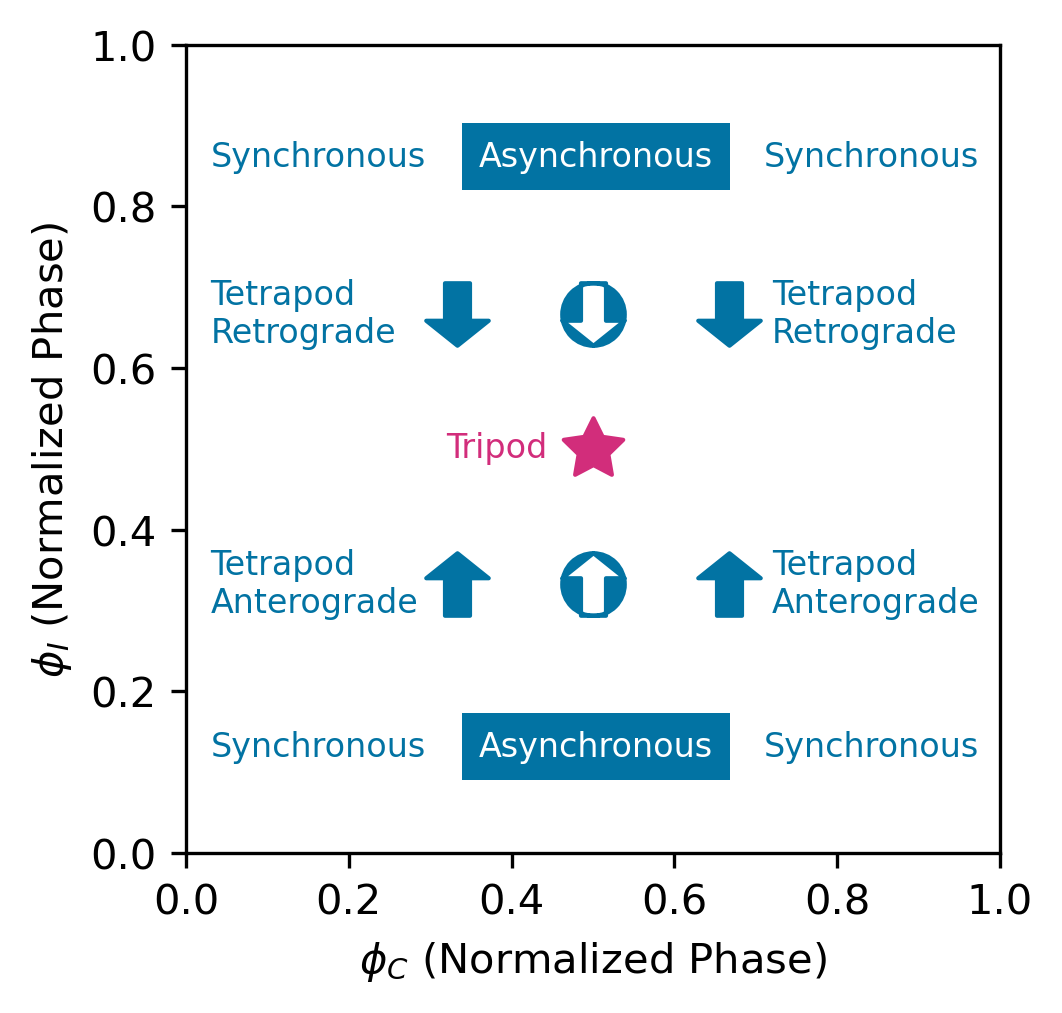

In [2]:
f,ax = plt.subplots(1,1,figsize=(3.5,3.5), dpi=300)
ax=offsetGaitstyleLabels(ax, True, 8)
plt.show()

In [3]:
# plot colors and parameters
axis_fontsize=11
tick_fontsize=9

# colors for step kinematics
stance_color = '#5656ff'
swing_color = '#e1e813'
duty_color = '#4d4d4d'
ipsi_color = 'tab:red'
contra_color = 'tab:green'
mcl_color = 'tab:orange'

# colors for legs
first_pair_color = '#bc272d' # red
first_pair_color_alt = '#f77276' # salmon
second_pair_color = '#50a9d4' # teal
second_pair_color_alt = '#95dafc' # sky blue
third_pair_color = '#fa9805' # orange
third_pair_color_alt = '#e9c716' # gold
rear_leg_color = '#a665c9'# violet
rear_leg_color_alt = '#0000a2' # indigo

# scatter marker size and alpha
marker_size = 10
marker_alpha = 0.4
marker_color = 'k'

In [4]:
# leg relationships and colors
first_pair = ['L1','R1']
second_pair = ['L2','R2']
third_pair = ['L3','R3']
fourth_pair = ['L4','R4']
rear_legs = fourth_pair
lateral_legs = third_pair + second_pair + first_pair
ipsi_offset_legs = third_pair + second_pair
left_laterals = [x[0] for x in [third_pair, second_pair, first_pair]]
right_laterals = [x[1] for x in [third_pair, second_pair, first_pair]]
all_legs = rear_legs + lateral_legs
left_legs = [x[0] for x in [fourth_pair, third_pair, second_pair, first_pair]]
right_legs = [x[1] for x in [fourth_pair, third_pair, second_pair, first_pair]]
single_leg = ['R4']

# dictionaries of inter-leg relationships
ipsi_legs = {'L4':'L3','R4':'R3','L3':'L2','L2':'L1','R3':'R2','R2':'R1'}
contra_legs = {'L4':'R4','R4':'L4','L3':'R3','L2':'R2','R3':'L3','R2':'L2','L1':'R1','R1':'L1'}

# colors
all_leg_color = 'dimgrey'
L2_L1_color =   second_pair_color
L3_L2_color =   third_pair_color
R2_R1_color =   second_pair_color_alt
R3_R2_color =   third_pair_color_alt

In [5]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/2024_tardiGait_paper/analyses_summaries')
xl_files = sorted(glob.glob('*.xlsx'))
# excel_file = gaitFunctions.selectOneFromList(xl_files)
excel_file = 'all_exemplaris_2024-04-03.xlsx'

# load the step_timing data into a dataframe
step_df = pd.read_excel(excel_file, sheet_name='step_timing', index_col=None)
step_df.head(3)

legID  DownTime  UpTime  stance  swing   gait    duty  midSwingTime  \
0    L1     0.272   1.151   0.879  0.242  1.121  0.7841        1.2720   
1    L1     1.393   2.606   1.213  0.303  1.516  0.8001        2.7575   
2    L1     2.909   4.090   1.181  0.334  1.515  0.7795        4.2570   

  L1_mid_swings R1_mid_swings  ... anterior_offsets contralateral_offsets  \
0     L1:0.8921           R1:  ...              NaN                 0.667   
1     L1:0.9001     R1:0.3701  ...              NaN                 1.030   
2     L1:0.8898     R1:0.5597  ...              NaN                 0.879   

  metachronal_lag mcl_LR_ratio L3_bearing_change  \
0             NaN          NaN               NaN   
1             NaN          NaN               NaN   
2             NaN          NaN               NaN   

                                       clip   treatment individual   date  \
0  iw_11Dec_exemplaris_tardigrade01_000-010  exemplaris          1  11dec   
1  iw_11Dec_exemplaris_tardigrade01_000-010  exemplaris          1  11dec   
2  iw_11Dec_exemplaris_tardigrade01_000-010  exemplaris          1  11dec   

                            uniq_id  
0  iw_11dec_tardigrade01_exemplaris  
1  iw_11dec_tardigrade01_exemplaris  
2  iw_11dec_tardigrade01_exemplaris  

[3 rows x 35 columns]

# offset curves

5175 steps for ipsilateral offsets
3809 steps for contralateral offsets
1530 steps for rear offsets


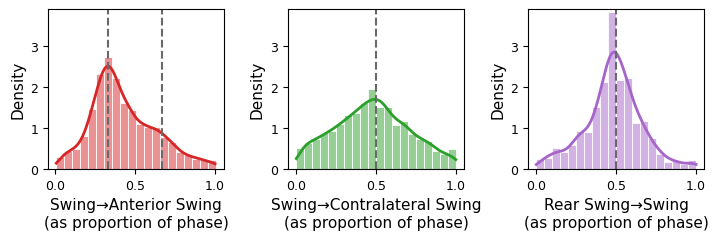

In [6]:
def offsetCurve(ax,leglist,compdict,xlab): # or 'contra' 
    # leglist = ipsi_offset_legs, left_laterals, ['L4']
    # compdict = ipsi_legs, contra_legs, contra_legs

    proportions = []
    speeds = []
    offsets = []
    for leg in leglist:
        offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                              step_df, leg, compdict[leg])
    
    if 'anterior' in xlab.lower():
        offset_color = ipsi_color
        desc = 'ipsilateral'
    elif 'rear' in xlab.lower():
        offset_color = rear_leg_color
        desc = 'rear'
    else:
        offset_color = contra_color
        desc = 'contralateral'
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                      color=offset_color, edgecolor='w', visible=True) # can set to False to hide bars
    print(len(proportions), 'steps for ' + desc + ' offsets')
    ax.set_xlabel(xlab)
    
    if 'anterior' in xlab.lower():
        ax.plot([1/3,1/3],[0,4],'--',color='dimgrey')
        ax.plot([2/3,2/3],[0,4],'--',color='dimgrey')
    else:
        ax.plot([1/2,1/2],[0,4],'--',color='dimgrey')
        
    return ax

f = plt.figure(figsize=(8,2))
ax1=f.add_axes([0.1,0.1,0.22,0.8])
ax2=f.add_axes([0.4,0.1,0.22,0.8])
ax3=f.add_axes([0.7,0.1,0.22,0.8])

ax1=offsetCurve(ax1,ipsi_offset_legs,ipsi_legs,'Swing→Anterior Swing\n(as proportion of phase)')
ax2=offsetCurve(ax2,left_laterals,contra_legs,'Swing→Contralateral Swing\n(as proportion of phase)')
ax3=offsetCurve(ax3,['L4'],contra_legs,'Rear Swing→Swing\n(as proportion of phase)')

# adjust parameters and plot
for ax in [ax1,ax2,ax3]:
    ax.yaxis.label.set_size(axis_fontsize)
    ax.xaxis.label.set_size(axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize) 
    ax.set_ylim([0,3.9])

plt.show()

### ipsilateral offsets for individual legs

L2 : 1301 steps
L3 : 1279 steps
R2 : 1317 steps
R3 : 1278 steps


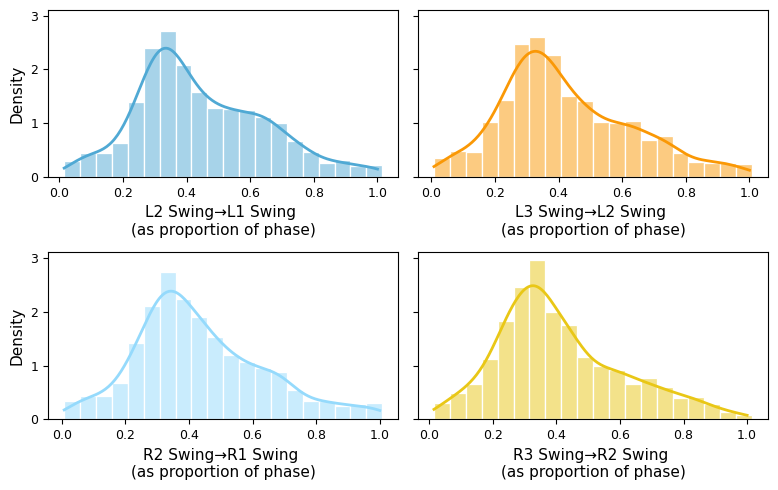

In [7]:
def plotLegOffsets(ax, df, ref_leg, test_leg, barcolor):

    proportions = []
    speeds = []
    offsets = []
    offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, 
                                                          step_df, ref_leg, test_leg)
    
    ax = sns.histplot(proportions, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                  color=barcolor, edgecolor='w', visible=True) # can set to false to hide bars
    
#     ax.set_xlabel(' --> '.join(leg_comps[i]) + ' Ipsilateral Offsets', fontsize=axis_fontsize)
    ax.set_xlabel(leg_comps[i][0] + ' Swing→' + leg_comps[i][1] + ' Swing \n(as proportion of phase)')
    
    print(leg_comps[i][0], ':', len(proportions), 'steps')
    
    return ax

f,axes = plt.subplots(2,2,figsize=(8,5), sharey=True)

leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]

for i, ax in enumerate(axes.flat):
    
    ax = plotLegOffsets(ax, step_df, leg_comps[i][0], leg_comps[i][1], plot_cols[i])

    # adjust parameters
    ax.xaxis.label.set_size(axis_fontsize)
    ax.yaxis.label.set_size(axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize) 


plt.tight_layout()
plt.show()

### Contralateral offsets for individual legs (Nirody S6B inset)

L1 : 1305 steps
L2 : 1251 steps
L3 : 1253 steps


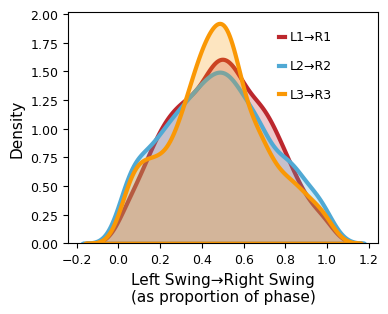

In [8]:
# S6 B inset

def contralateralOffsetIndividualLegs(ax, df, leg_comps, plot_cols, legend_fontsize, ypos=1.8, yinc = 0.3):

    for i, comp in enumerate(leg_comps):
        proportions = []
        speeds = []
        offsets = []
        offsets, proportions, speeds = swingTimingProportions(offsets, proportions, speeds, df, comp[0], comp[1])
    #     H,X1 = np.histogram(proportions, bins = 200, density = True )
    #     dx = X1[1] - X1[0]
    #     F1 = np.cumsum(H)*dx
    #     ax.plot(X1[1:], F1, linewidth=3, color = plot_cols[i], label=' --> '.join(comp))

#         ax = sns.histplot(proportions, ax=ax, binwidth=0.05,
#                           stat='density',line_kws={'linewidth':3}, kde=True, fill=True,
#                           color=plot_cols[i], edgecolor='w', visible=False) # can set to false to hide bars
        ax = sns.kdeplot(proportions, ax=ax, color=plot_cols[i], linewidth=3, fill=True)

        # klugey legend
        ax.plot([0.77,0.8],[ypos,ypos],color=plot_cols[i],linewidth=3)
        ax.text(0.82,ypos-0.03, '→'.join(comp),fontsize=tick_fontsize)
        ypos -= yinc

        print(comp[0], ':', len(proportions), 'steps')

    ax.set_xlabel('Left Swing→Right Swing\n(as proportion of phase)')
    return ax

    
f,ax = plt.subplots(1,1,figsize=(4,3))
leg_comps = [['L1','R1'], ['L2','R2'], ['L3','R3']]
plot_cols = [first_pair_color,second_pair_color,third_pair_color]

ax = contralateralOffsetIndividualLegs(ax, step_df, leg_comps, plot_cols, tick_fontsize, 1.8, 0.25)

ax.xaxis.label.set_size(axis_fontsize)
ax.yaxis.label.set_size(axis_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize) 
plt.show()

# sustained 2/3 offset vs. reset from gallop
Nirody observes increase of φI=2/3 on softer substrate. Here is their explanation: 
First, simultaneous swing of 3rd leg pair. 
<br>Then either
<br>(1) keep galloping in 2nd pair (not preferred), or 
<br>(2) have one 2nd pair ‘wait’ until contralateral leg swings (so that some one of 2nd pair is  φI=1/3, and other is φI=2/3 .

<br>Thus they suggest the 2/3 value is a transitory thing, not a __sustained__ phenomenon


In [9]:
# add normalized ipsilateral offset (offset/gait cycle) to step_df
norm_ipsi_offset = step_df['anterior_offsets'].values / step_df['gait'].values
step_df['norm_ipsi_offset'] = norm_ipsi_offset

# get 3rd leg steps where norm_ipsi_offset is close (within a buffer) to 2/3
buffer = 0.1
third_leg = step_df[step_df.legID.isin(['L3','R3'])] # third leg steps
above_buffer = third_leg[third_leg['norm_ipsi_offset'] >= 0.667 - buffer]
within_range = above_buffer[above_buffer['norm_ipsi_offset'] <= 0.667 + buffer]
print(len(within_range)) # number of third leg steps with offsets of 2/3 +/- buffer

323


num steps in "next step offset" plot: 277
num steps in "next step offset" plot: 277


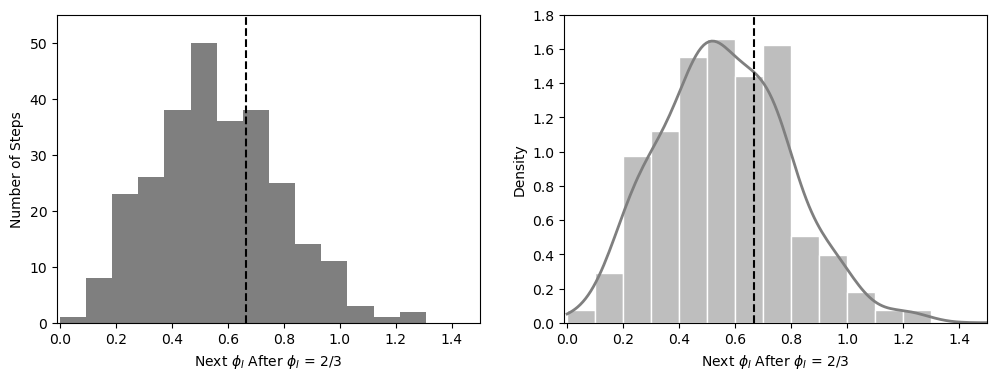

In [62]:
# for these 3rd pair leg steps with offset near 2/3, collect offsets of *next* step of same leg

steps = within_range['legID'].values
swing_starts = within_range['UpTime'].values
clips = within_range['clip'].values
norm_ipsi_offsets = within_range['norm_ipsi_offset'].values

next_step_offsets = []
no_swings = []

# each step
for i, step in enumerate(steps):
    # find next step of this leg for this clip
    clip = clips[i]
    # get swing start for this leg for this clip
    this_swing = swing_starts[i]
    # get steps for this clip
    clip_steps = step_df[step_df['clip']==clip]
    # get steps for this leg within this clip
    leg_steps = clip_steps[clip_steps['legID']==step]
    cleg_steps = leg_steps.copy()
    # sort leg_steps by UpTime
    cleg_steps.sort_values(by='UpTime',inplace=True)
    # get swing start times and normalized offsets
    uptimes = cleg_steps['UpTime'].values
    ipsi_offsets = cleg_steps['norm_ipsi_offset'].values
    # find next swing, and normalized offset for next swing
    try:
        next_up_idx = np.where(uptimes > this_swing)[0][0]
        #print(cleg_steps) # testing
        #print(uptimes) # testing
        #print(this_swing) # testing
        #print(uptimes[next_up_idx]) # testing
        #print(ipsi_offsets[next_up_idx]) # testing
        #print() # testing
        next_step_offsets.append(ipsi_offsets[next_up_idx])
    except:
        no_swings.append('No later swing for ' + clip + ' at ' + str(this_swing))

next_step_offsets = gaitFunctions.omitNan(np.array(next_step_offsets))

def nextStepOffsetPlot(ax, next_step_offsets, plottype='sns'):

    print('num steps in "next step offset" plot:',len(next_step_offsets))
    
    if plottype == 'hist':

        ymax = 55
        ax.hist(next_step_offsets,20,color='tab:gray')
        ax.plot([2/3, 2/3],[0,ymax],'--k')
        ax.set_ylim([0,ymax])
        ax.set_ylabel('Number of Steps')
    
    else:

        ymax = 1.8
        sns.histplot(next_step_offsets, ax=ax, binwidth=0.1, kde=True, stat='density',line_kws={'linewidth':2},
                          color='tab:gray', edgecolor='w', visible=True) # can set to false to hide bars
        ax.plot([2/3, 2/3],[0,ymax],'--k')
        ax.set_ylim([0,ymax])
        ax.set_ylabel('Density')
        
    ax.set_xlabel('Next $ϕ_I$ After $ϕ_I$ = 2/3')
    ax.set_xlim([-0.01,1.5])
    
    return ax

f,[ax1,ax2] = plt.subplots(1,2,figsize=(12,4))
ax1 = nextStepOffsetPlot(ax1, next_step_offsets, plottype='hist')
ax2 = nextStepOffsetPlot(ax2, next_step_offsets, plottype='sns')
        
plt.show()

# steps with ML 2793
# steps with ML 2793


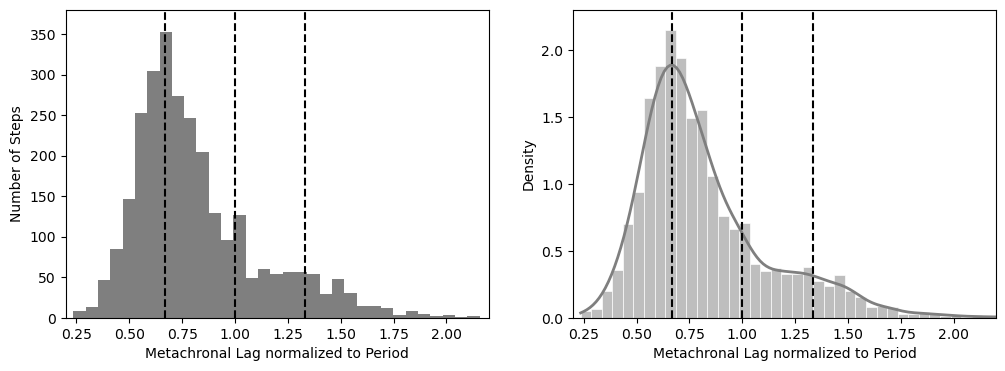

In [11]:
# add normalized ipsilateral offset (offset/gait cycle) to step_df
# print(step_df.columns)
norm_ML = step_df['metachronal_lag'].values / step_df['gait'].values
step_df['norm_metachronal_lag'] = norm_ML
norm_ML = gaitFunctions.omitNan(np.array(norm_ML))

def mlPlot(ax,norm_ML,plottype='sns'):
    
    print('# steps with ML', len(norm_ML))
    
    if plottype == 'hist':
        ymax = 380
        ax.hist(norm_ML,50,color='tab:gray')
        ax.plot([4/3, 4/3],[0,ymax],'--k')
        ax.plot([2/3, 2/3],[0,ymax],'--k')
        ax.plot([1, 1],[0,ymax],'--k')
        ax.set_ylim([0,ymax])
        ax.set_ylabel('Number of Steps')
    else:
        pmax = 2.3
        sns.histplot(norm_ML, ax=ax, binwidth=0.05, kde=True, stat='density',line_kws={'linewidth':2},
                          color='tab:gray', edgecolor='w', visible=True) # can set to false to hide bars
        ax.plot([2/3, 2/3],[0,pmax],'--k')
        ax.plot([1, 1],[0,pmax],'--k')
        ax.plot([4/3, 4/3],[0,pmax],'--k')
        ax.set_ylim([0,pmax])
        ax.set_ylabel('Density')
        
    ax.set_xlabel('Metachronal Lag normalized to Period')
    ax.set_xlim([0.2,2.2])
    return ax
        
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1 = mlPlot(ax1,norm_ML,plottype='hist')
ax2 = mlPlot(ax2,norm_ML,plottype='sns')
plt.show()

Num L3 steps with MCL and bearing:  1299 1299
Spearman ρ = -0.13  p =  1.24e-06


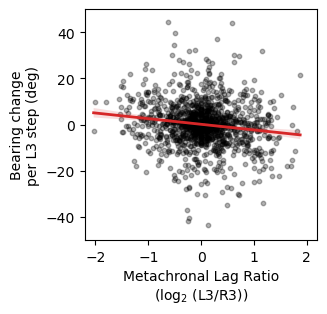

In [12]:
# Metachronal Lag vs. Bearing change
l3_bearing_changes = step_df['L3_bearing_change'].values
mcl_LR_ratio = step_df['mcl_LR_ratio'].values
l3_bearing_changes = gaitFunctions.omitNan(l3_bearing_changes)
mcl_LR_ratio = gaitFunctions.omitNan(mcl_LR_ratio)


def MLRatioBearingPlot(ax,mcl_LR_ratio,l3_bearing_changes):

    print('Num L3 steps with MCL and bearing: ', len(l3_bearing_changes),len(mcl_LR_ratio))

    sns.regplot(ax=ax, x=mcl_LR_ratio, y=l3_bearing_changes, 
                scatter_kws={'s':marker_size,'color':marker_color,'alpha':0.3}, 
                        line_kws={'color':'tab:red','linewidth':2})
    ax.set_xlabel('Metachronal Lag Ratio\n(log$_{2}$ (L3/R3))')
    ax.set_ylabel('Bearing change\nper L3 step (deg)')
    ax.set_ylim([-50,50])
    ax.set_xlim([-2.2,2.2])
    r,p = stats.spearmanr(mcl_LR_ratio,l3_bearing_changes)
    print("Spearman ρ =", np.round(r,2), " p = ", np.round(p,8))
    
    return ax

f,a = plt.subplots(1,figsize=(3,3))
a=MLRatioBearingPlot(a,mcl_LR_ratio,l3_bearing_changes)
plt.show()

# Combined Figure for individual leg offsets and Metachronal Lag

L2 : 1301 steps
L3 : 1279 steps
R2 : 1317 steps
R3 : 1278 steps
L1 : 1305 steps
L2 : 1251 steps
L3 : 1253 steps
num steps in "next step offset" plot: 277
# steps with ML 2793
Num L3 steps with MCL and bearing:  1299 1299
Spearman ρ = -0.13  p =  1.24e-06


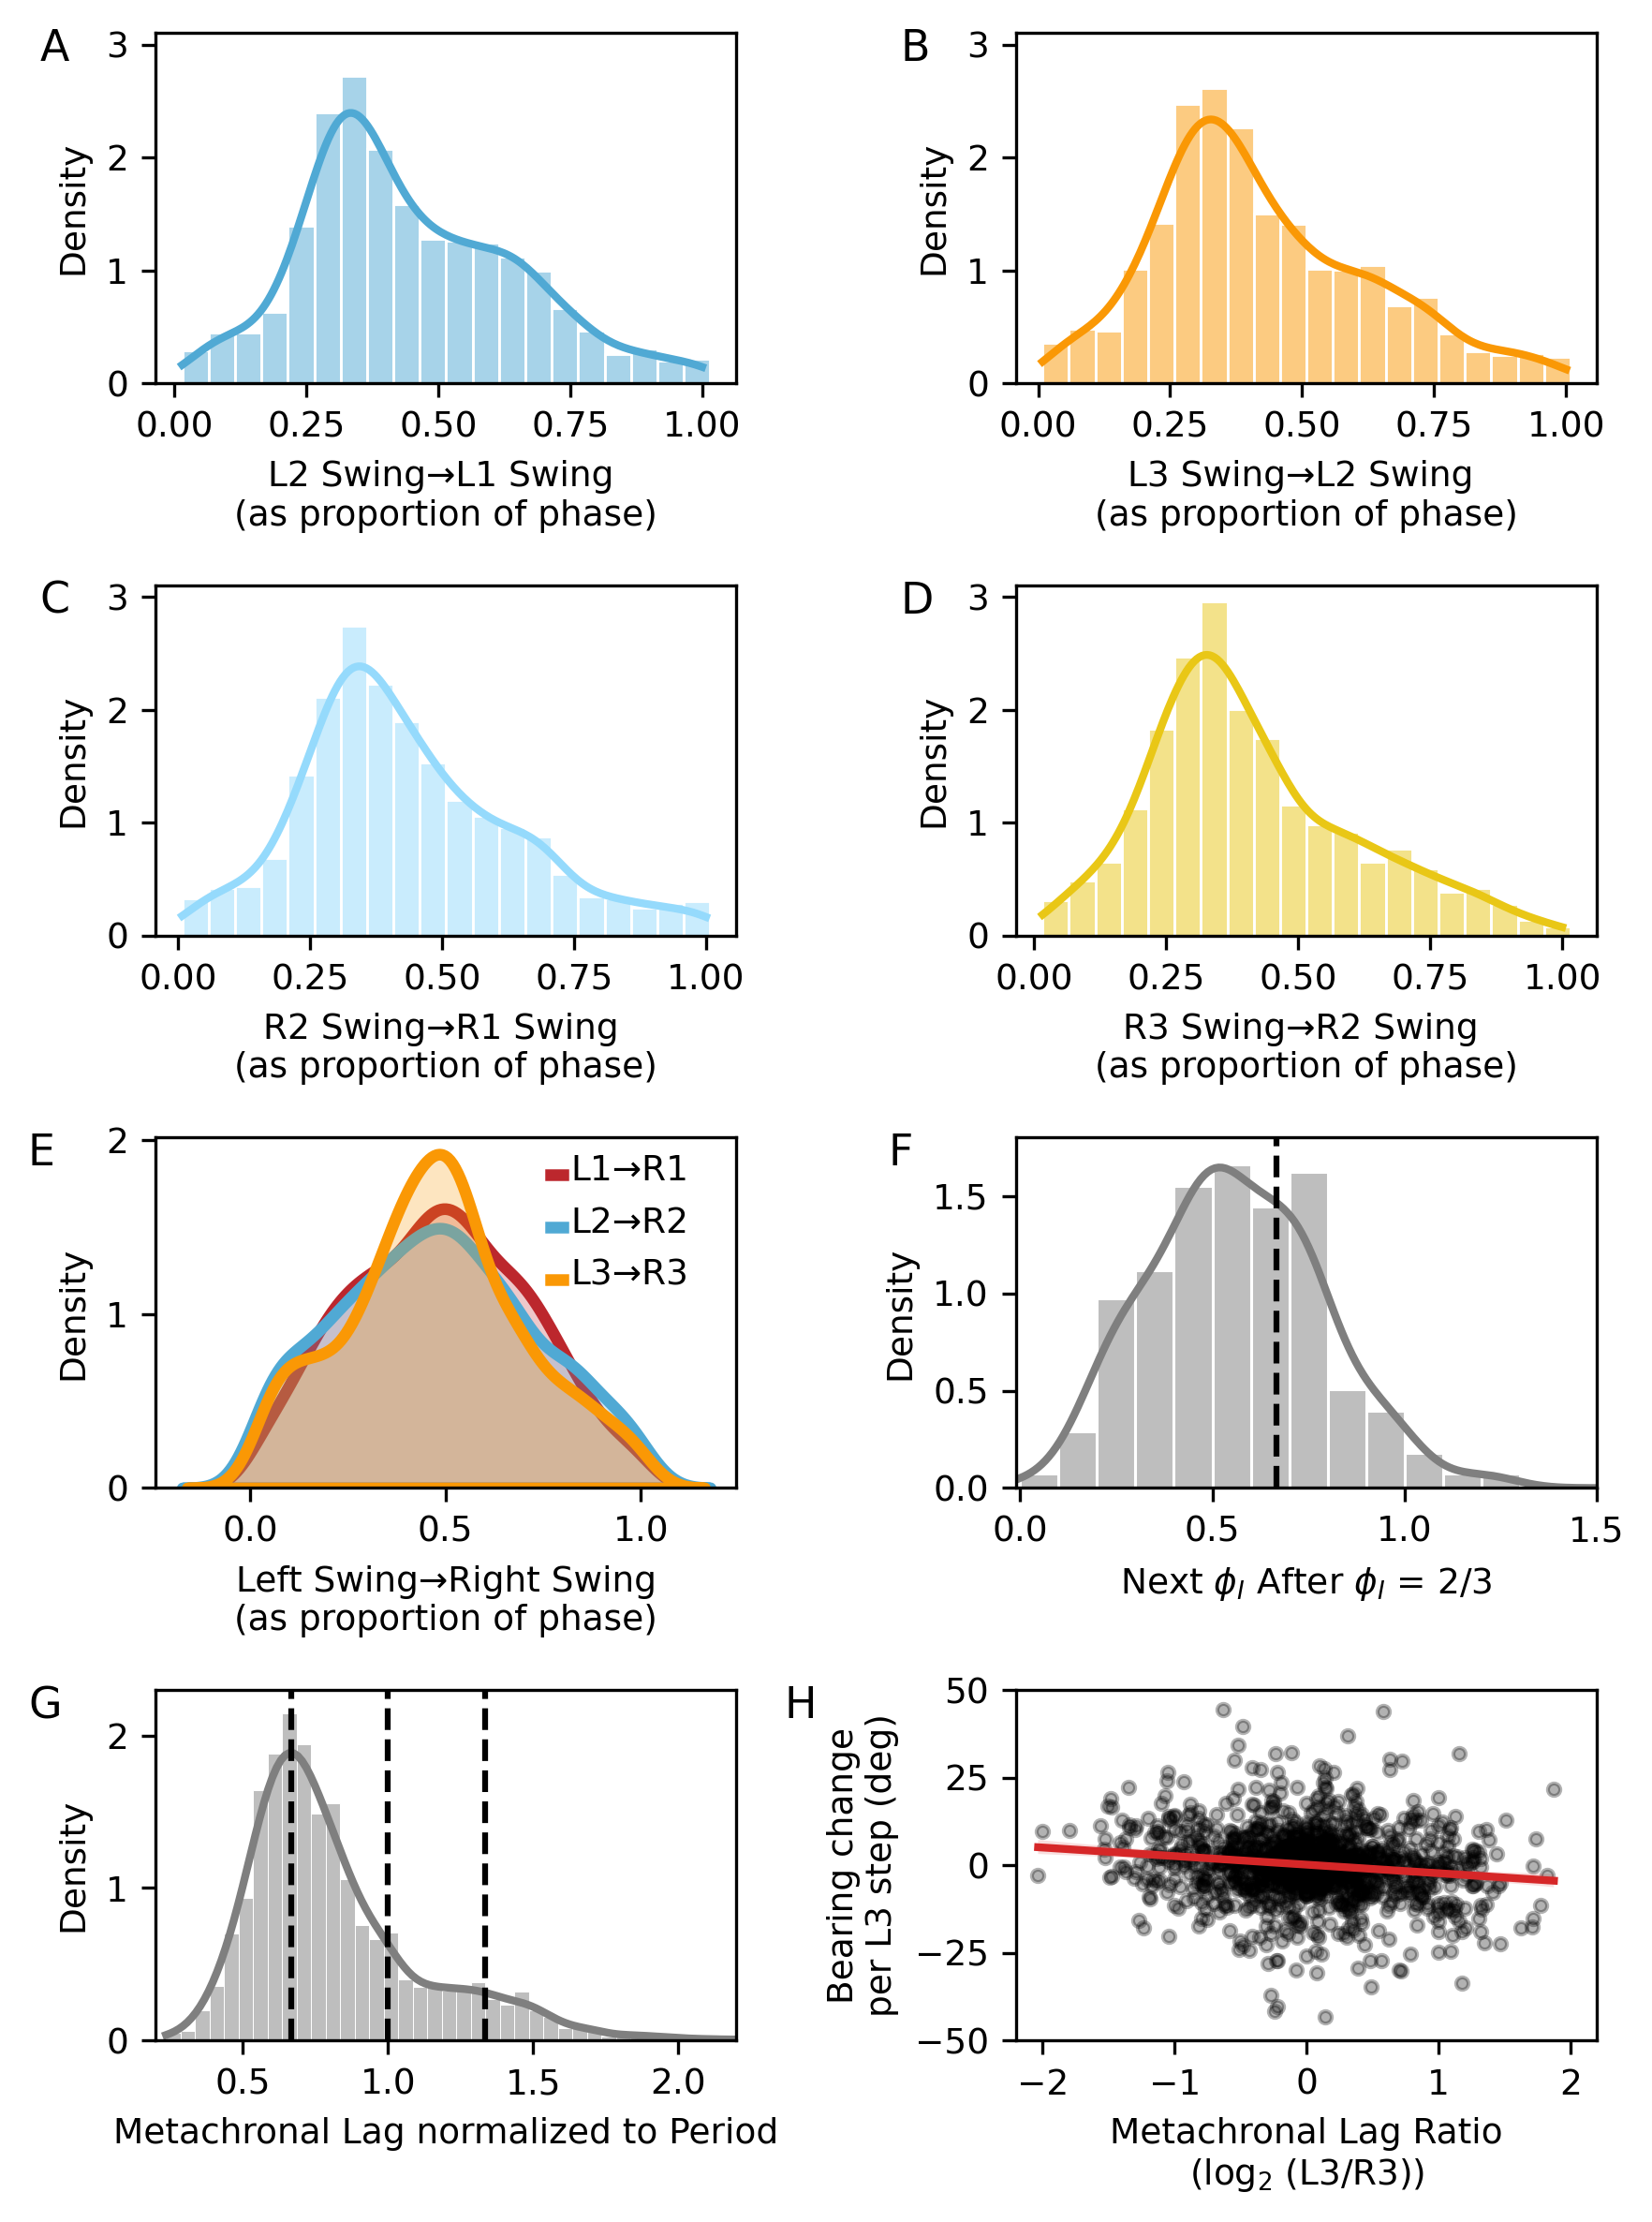

In [63]:
f = plt.figure(figsize=(6,8), dpi=300)
ax1 = plt.subplot(421)
ax2 = plt.subplot(422,sharey=ax1)
ax3 = plt.subplot(423,sharey=ax1)
ax4 = plt.subplot(424,sharey=ax1)

# anterior ipsilateral offsets for each lateral leg
leg_comps = [['L2','L1'],['L3','L2'],['R2','R1'],['R3','R2']]
plot_cols = [L2_L1_color,L3_L2_color,R2_R1_color,R3_R2_color]
letters = ['A','B','C','D']
for i, ax in enumerate([ax1,ax2,ax3,ax4]):
    comp = leg_comps[i]
    ax = plotLegOffsets(ax, step_df, comp[0], comp[1], plot_cols[i])
    ax.annotate(letters[i], xy=(-0.2, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

# contralateral offsets for each lateral leg
leg_comps = [['L1','R1'], ['L2','R2'], ['L3','R3']]
plot_cols = [first_pair_color,second_pair_color,third_pair_color]
ax5 = plt.subplot(425)
ax5 = contralateralOffsetIndividualLegs(ax5, step_df, leg_comps, plot_cols, tick_fontsize, 1.8, 0.3)
ax5.annotate('E', xy=(-0.22, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

# for 3rd pair leg steps with offset near 2/3, plot offsets of *next* step of same leg
ax6 = plt.subplot(426)
ax6 = nextStepOffsetPlot(ax6, next_step_offsets, plottype='sns')
ax6.annotate('F', xy=(-0.22, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

# metachronal lag ... sustained 2/3 offsets = ML of 4/3. 
ax7 = plt.subplot(427)
ax7 = mlPlot(ax7,norm_ML,plottype='sns')
ax7.annotate('G', xy=(-0.22, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

# metachronal lag vs bearing change
ax8 = plt.subplot(428)
ax8 = MLRatioBearingPlot(ax8,mcl_LR_ratio,l3_bearing_changes)
ax8.annotate('H', xy=(-0.4, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    ax.yaxis.label.set_size(tick_fontsize)
    ax.xaxis.label.set_size(tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.tight_layout()
plt.show()

# Gait styles boxplots

In [14]:
gait_summaries_df = pd.read_excel(excel_file, sheet_name='gait_summaries', index_col=None)
gait_summaries_df.head(3)

Identifier   treatment    individual   date  \
0  iw_11dec_tardigrade01_exemplaris  exemplaris  tardigrade01  11dec   
1  iw_11dec_tardigrade02_exemplaris  exemplaris  tardigrade02  11dec   
2  iw_11dec_tardigrade03_exemplaris  exemplaris  tardigrade03  11dec   

   Number of frames  % stand (lateral legs)  % pentapod (lateral legs)  \
0               538               11.152416                  50.371747   
1               564                3.014184                  31.737589   
2               506               16.600791                  44.466403   

   % tetrapod canonical (lateral legs)  % tetrapod gallop (lateral legs)  \
0                            24.721190                          7.992565   
1                            31.737589                         14.716312   
2                            27.667984                          4.743083   

   % tetrapod other (lateral legs)  ...  CLR pentapod (lateral legs)  \
0                         5.390335  ...                     0.521226   
1                         5.319149  ...                     0.059297   
2                         4.545455  ...                     0.396530   

   CLR tetrapod canonical (lateral legs)  CLR tetrapod gallop (lateral legs)  \
0                              -0.278867                           -0.017608   
1                              -0.029026                            0.592837   
2                              -0.166252                           -0.539433   

   CLR tetrapod other (lateral legs)  CLR tripod canonical (lateral legs)  \
0                           0.184165                            -1.607393   
1                           0.170871                            -0.401826   
2                           0.013686                            -1.546071   

   CLR tripod other (lateral legs)  CLR other (lateral legs)  \
0                        -5.378522                 -1.490361   
1                         1.268835                 -1.490361   
2                        -0.777312                 -1.490361   

   CLR stand (rear legs)  CLR step (rear legs)  CLR hop (rear legs)  
0              -0.118556              0.114893            -0.897491  
1               0.267112             -0.014541             0.249235  
2               0.728694             -0.108547            -1.529317  

[3 rows x 33 columns]

In [15]:
# print(gait_summaries_df.columns)
columns_to_analyze = [
    '% stand (lateral legs)', 
    '% pentapod (lateral legs)',
    '% tetrapod canonical (lateral legs)',
    '% tetrapod gallop (lateral legs)', 
    '% tetrapod other (lateral legs)',
    '% tetrapod total (lateral legs)', 
    '% tripod canonical (lateral legs)',
    '% tripod other (lateral legs)', 
    '% tripod total (lateral legs',
#     '% other (lateral legs)', 
    '% stand (rear legs)', 
    '% hop (rear legs)',
    '% step (rear legs)', 
    'Tetrapod Coordination Strength',
    'Tripod Coordination Strength',
    'Tetrapod Bout Speed (bodylength / s)',
    'Tripod Bout Speed (bodylength / s)'
]
print(len(columns_to_analyze))

16


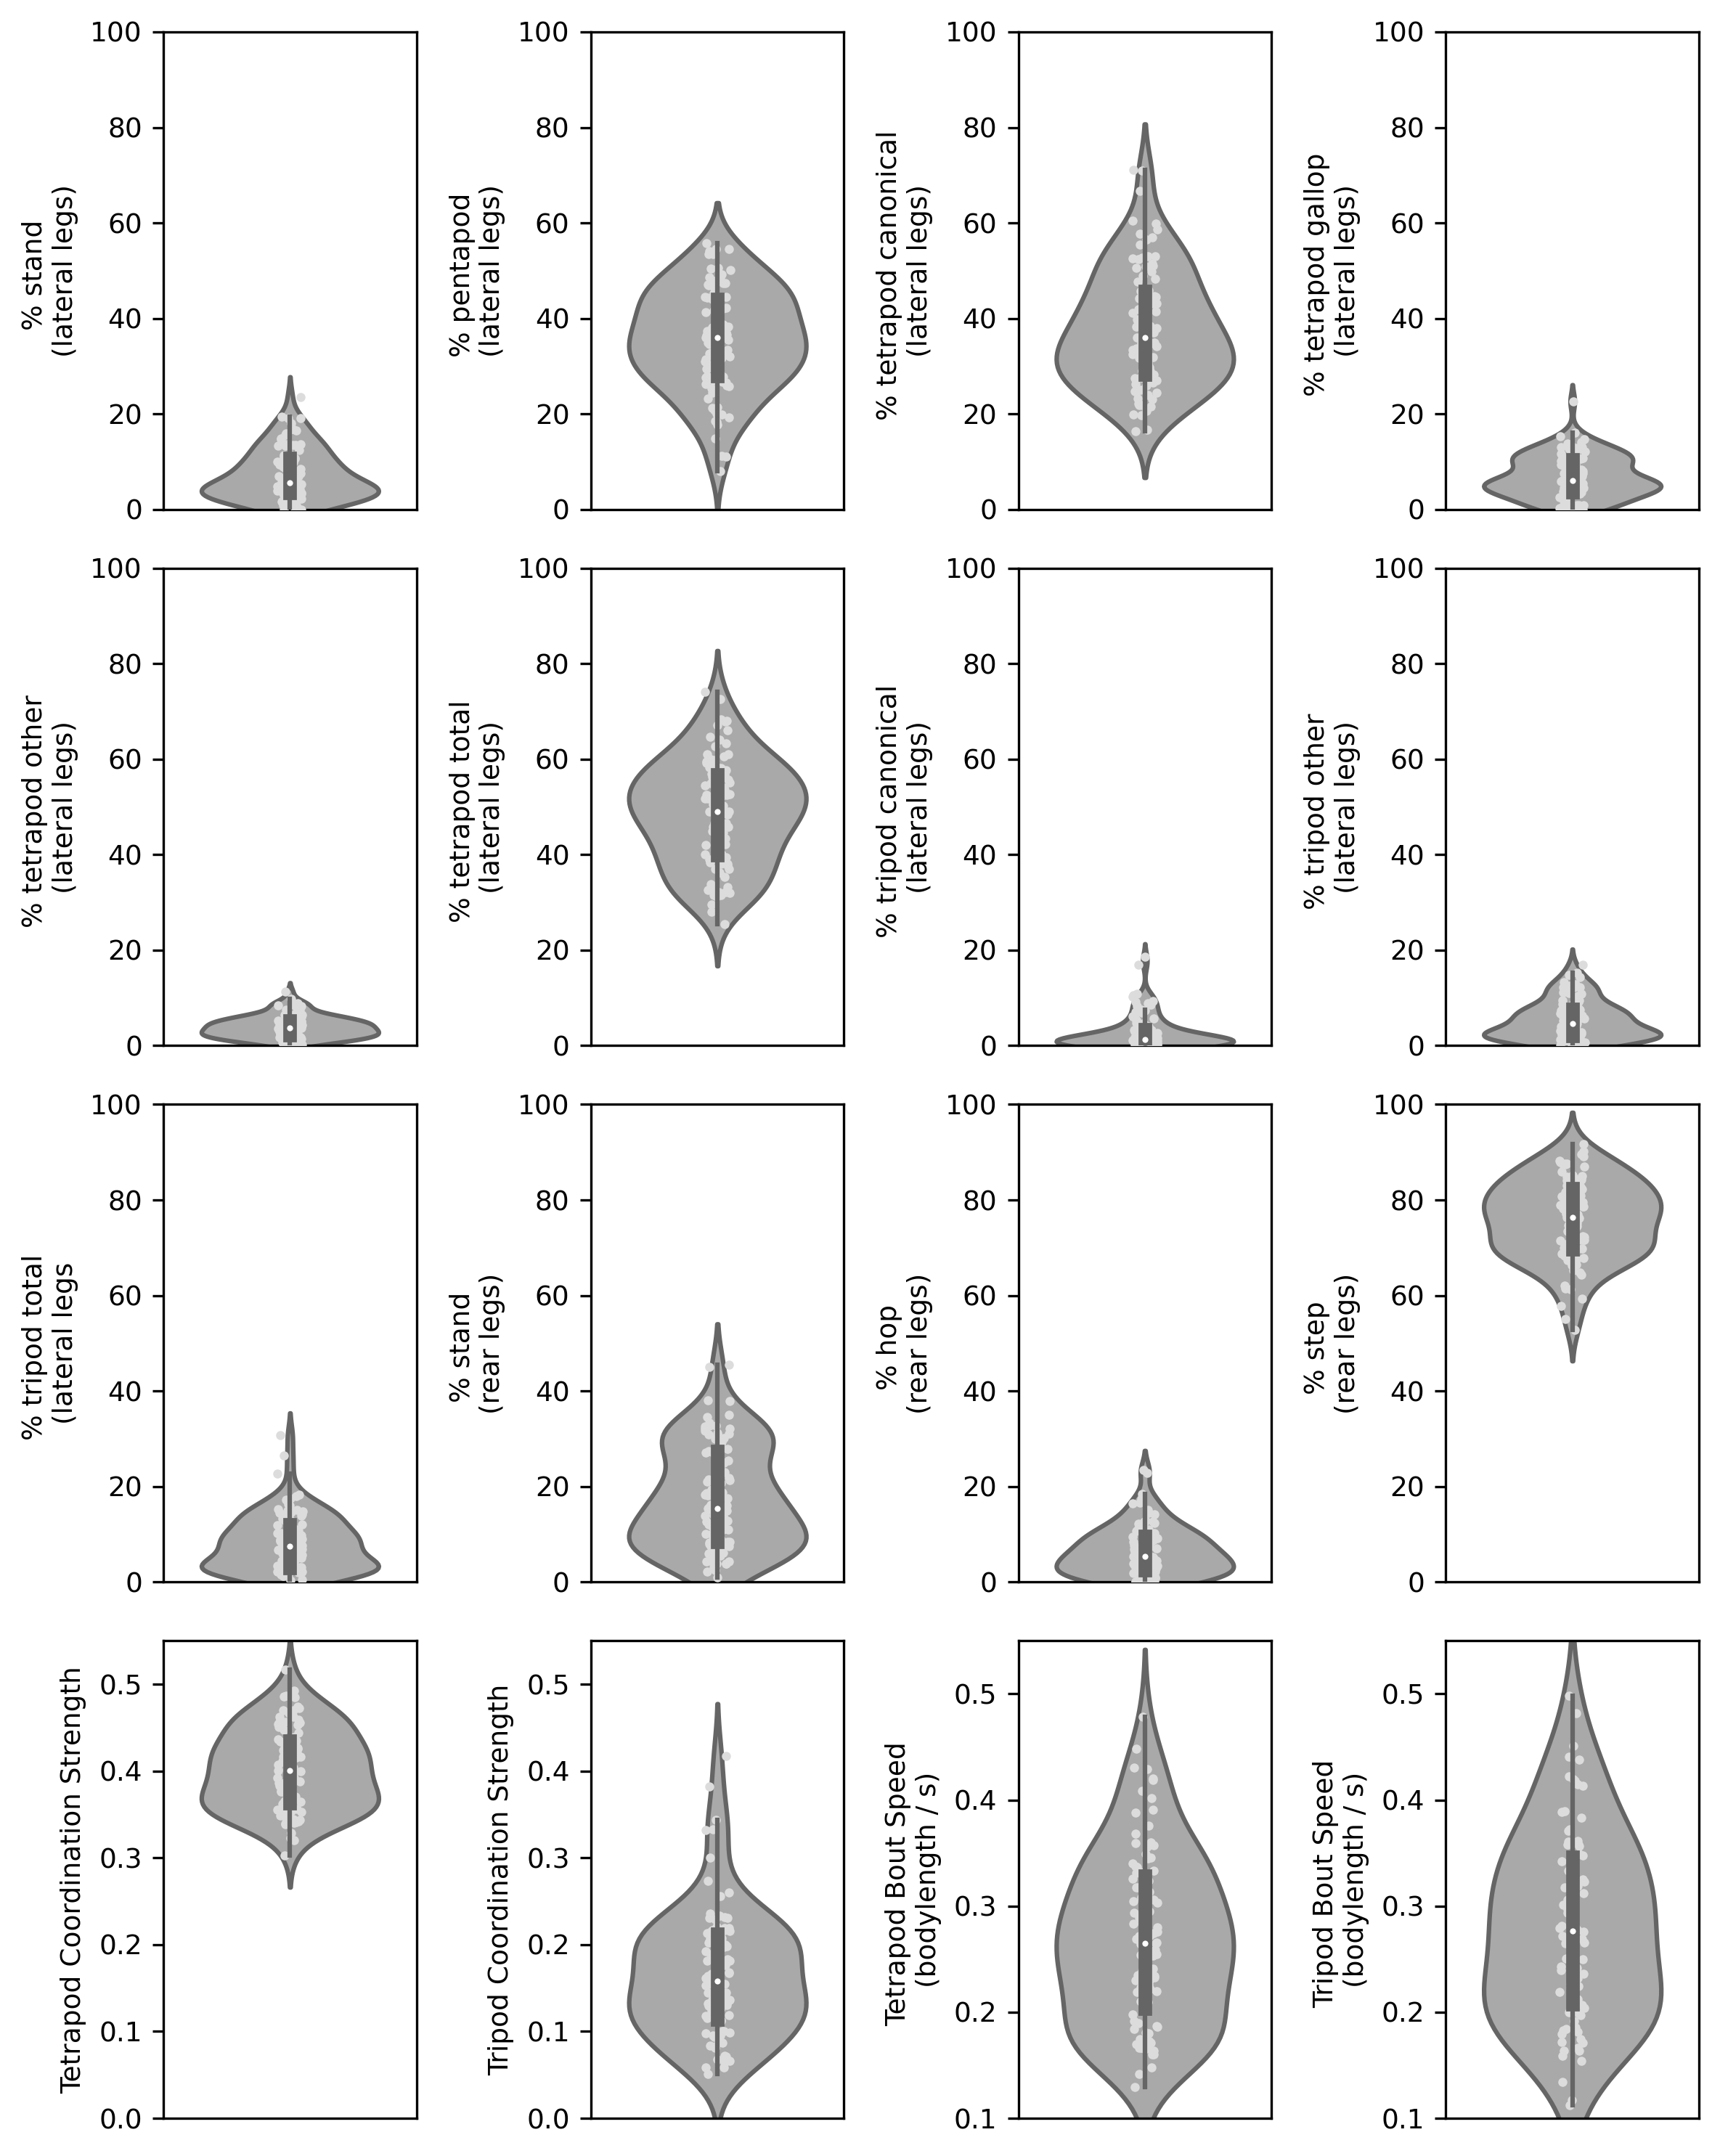

In [16]:
rows,cols = [4,4]
f,axes = plt.subplots(rows,cols,figsize = (8,10), dpi=300)
axes_list = axes.reshape(1,len(columns_to_analyze))[0]
for i, col in enumerate(columns_to_analyze):
    axes_list[i] = gaitFunctions.singleViolinPoints(axes_list[i], gait_summaries_df, col, box=True, vwidth=0.7,
                                                   vcolor='darkgray',pointcolor='gainsboro')
    axes_list[i].yaxis.label.set_size(tick_fontsize)
    axes_list[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    lab = col
    lab = lab.replace('(','\n(')
    axes_list[i].yaxis.label.set_text(lab)
    if lab[0] == '%':
        axes_list[i].set_ylim([0,100])
    elif 'Coordination Strength' in lab:
        axes_list[i].set_ylim([0,0.55])
    elif 'Bout Speed' in lab:
        axes_list[i].set_ylim([0.1, 0.55])
plt.tight_layout()
plt.show()

# summary table = table 3

In [17]:
# make a table of the data ... can screenshot this?
means = np.array([np.round(np.nanmean(gait_summaries_df[col].values),2) for col in columns_to_analyze])
sds = np.array([np.round(np.nanstd(gait_summaries_df[col].values),2) for col in columns_to_analyze])
meanstd = np.array([str(m) + ' ± ' + str(sds[i]) for i,m in enumerate(means)])
summary_df = pd.DataFrame({'Measurement':columns_to_analyze,
                          'Mean':means,
                          'SD':sds,
                          'Mean ± Std':meanstd})
blankIndex=[''] * len(summary_df)
summary_df.index=blankIndex
display(summary_df[['Measurement','Mean ± Std']])

Measurement     Mean ± Std
                % stand (lateral legs)    7.35 ± 5.25
             % pentapod (lateral legs)  35.55 ± 10.66
   % tetrapod canonical (lateral legs)  37.84 ± 12.13
      % tetrapod gallop (lateral legs)    6.92 ± 4.39
       % tetrapod other (lateral legs)    3.98 ± 2.32
       % tetrapod total (lateral legs)  48.74 ± 10.91
     % tripod canonical (lateral legs)    2.71 ± 3.47
         % tripod other (lateral legs)    5.38 ± 4.04
          % tripod total (lateral legs     8.1 ± 5.83
                   % stand (rear legs)   17.7 ± 10.73
                     % hop (rear legs)     6.55 ± 5.1
                    % step (rear legs)   75.75 ± 8.24
        Tetrapod Coordination Strength     0.4 ± 0.05
          Tripod Coordination Strength    0.17 ± 0.07
  Tetrapod Bout Speed (bodylength / s)    0.27 ± 0.08
    Tripod Bout Speed (bodylength / s)    0.28 ± 0.09

In [18]:
# Table as a plotly figure
# can change colors, sizes, etc, see https://plotly.com/python/figure-factory-table/
# looks pretty good
import plotly.figure_factory as ff
fig = ff.create_table(summary_df[['Measurement','Mean ± Std']])
fig.update_layout(
    autosize=True,
    width=430,
    height=400,
)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 11
fig.write_image("gaits_summary_table_plotly.png", scale=2)

In [19]:
# Table as an excel file ... 
out_file = 'Table_3.xlsx'
with pd.ExcelWriter(out_file, engine='openpyxl') as writer: 
    summary_df[['Measurement','Mean ± Std']].to_excel(writer, index=False, sheet_name='Table S3')

# Idealized coordination patterns with arrows & stars plots

In [20]:
'''
Two functions for plots of contralateral vs. ipsilateral offsets:

    1. Add hazy circles at specified coordinates of ϕc and ϕi
    2. Determine if offsets make a 'canonical' tetrapod or tripod gait
    
'''

def hazyCircle(ax, x, y, rmax, num_radii, linewidth, color_map):
    cmap = cm.get_cmap(color_map)
    crange = np.linspace(0,1,num_radii)
    for i,r in enumerate(np.linspace(0,rmax,num_radii)):
        ec = cmap(1-crange[i])
        circ = patches.Circle((x,y), radius=r, fill=False, 
                      edgecolor=ec, linewidth=linewidth)
        ax.add_patch(circ)
    return ax

def canonicalGait(anterior_offset, opposite_offset):
    
    # do these offsets make a 'canonical' tetrapod or tripod gait?
    anterior_ok = False
    opposite_ok = False
    is_canonical = False
    
    if anterior_offset * 3 == 1 or anterior_offset * 3 == 2 or anterior_offset * 2 == 1:
        anterior_ok = True
    if opposite_offset * 3 == 1 or opposite_offset * 3 == 2 or opposite_offset * 2 == 1:
        opposite_ok = True
        
    if anterior_ok and opposite_ok:
        is_canonical = True
        
    return is_canonical

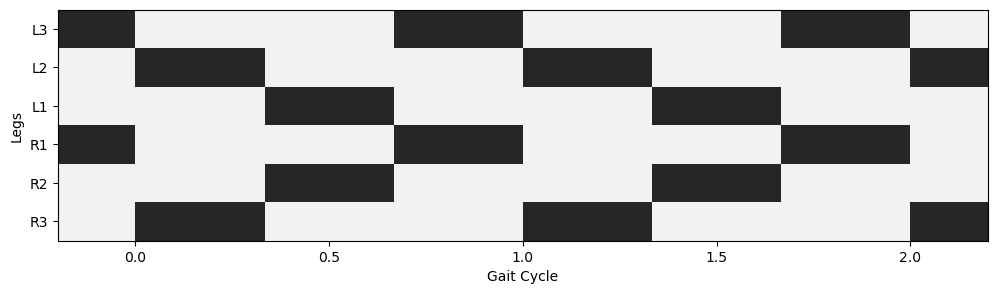

In [21]:
# In GaitFunctions we have a function (plotSimulatedSteps) 
# to plot simulated steps given inputs of duty factor and offsets
num_cycles = 4
num_legs = 6
duty_factor =     2/3 # in fraction of gait cycle
anterior_offset = 1/3 # in fraction of gait cycle
opposite_offset = 1/3 # in fraction of gait cycle

f,ax = plt.subplots(1,1, figsize = (12,3))      
ax, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax, num_legs, num_cycles, 
                                                               duty_factor, anterior_offset, 
                                                               opposite_offset)
ax.set_xlim([-.2, 2.2])
plt.show()

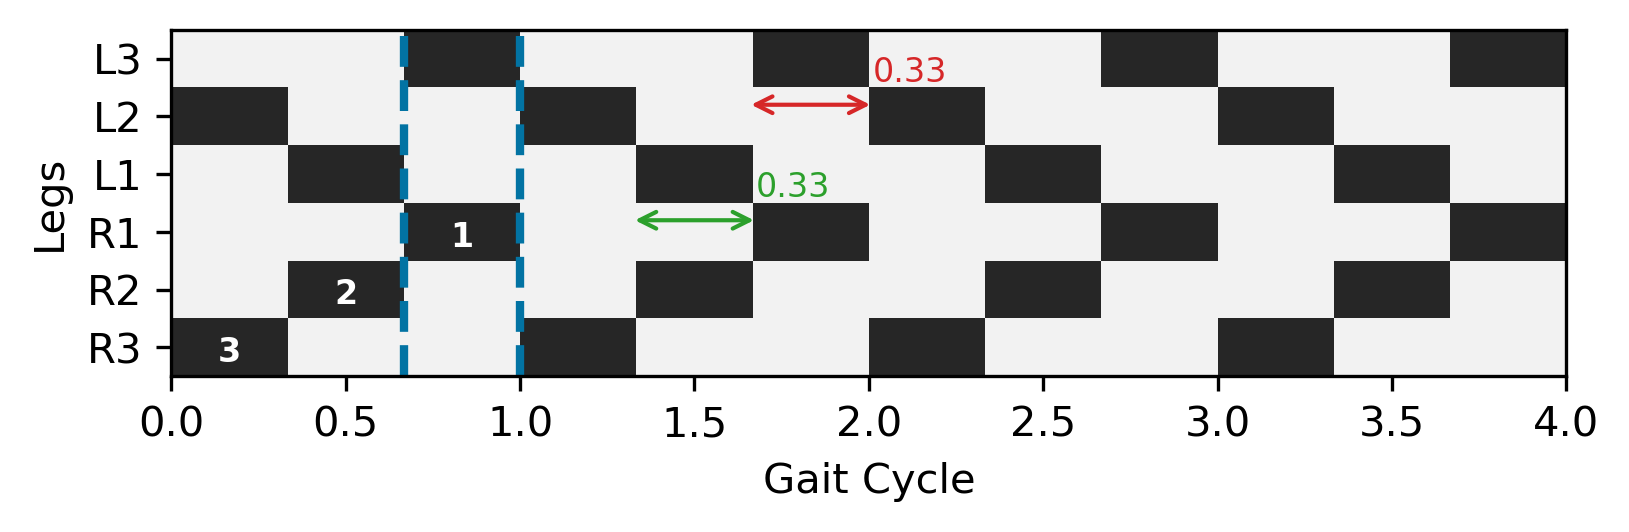

In [22]:
# Function to add annotations about offsets and swing order to a plot of simulated steps

# change arrows from annotations to lines
# change offset text to upper right of arrow

def annotateSimulatedSteps(ax, plot_legs, duty_factor, anterior_offset, opposite_offset, stance_start):

    leg_y = dict(zip(plot_legs,np.arange(1,len(plot_legs) + 1)))
    
    # draw vertical lines surrounding first L3 swing in tripod color or tetrapod color
    vertical_linewidth = 2
    combos, combo_colors = gaitFunctions.get_gait_combo_colors('lateral')
    if 0.4 < anterior_offset < 0.6 and 0.4 < opposite_offset < 0.6:
        gait_color = combo_colors['tripod_canonical']
        gait_style = 'Tripod'
    elif 0.2 < anterior_offset <= 0.4 or 0.6 < anterior_offset <= 0.8:
        gait_color = combo_colors['tetrapod_canonical']
        gait_style = 'Tetrapod'
    else:
        gait_style = 'unknown'
    ax.plot([duty_factor,duty_factor],[1,len(plot_legs)+1],'--', color = gait_color, linewidth = vertical_linewidth)
    ax.plot([1,1],[1,len(plot_legs)+1],'--', color = gait_color, linewidth = vertical_linewidth)

    # draw horizontal lines to measure offsets
    # anterior offset draw from 2nd swing of L3

    offset_fontsize = 8
    offset_ybuff = 0.2
    offsettext_xbuff = 0.01
    offsettext_ybuff = 0.7
    arrow_ybuff = 0.1
    arrow_xbuff = 0.028
    anterior_offset_x = duty_factor + 1
    anterior_offset_y = leg_y['L3'] - offset_ybuff
    
    ax.annotate(text='', xy=(anterior_offset_x+anterior_offset+arrow_xbuff,anterior_offset_y-arrow_ybuff), 
                 xytext=(anterior_offset_x-arrow_xbuff,anterior_offset_y-arrow_ybuff), 
                 arrowprops={'arrowstyle':'<->', 'lw':1, 'edgecolor':'tab:red'})
    ax.text(anterior_offset + anterior_offset_x + offsettext_xbuff, anterior_offset_y-offsettext_ybuff + 1, 
            str(np.round(anterior_offset,2)), color='tab:red', fontsize=offset_fontsize)

    # opposite offset draw from 2nd swing of L1
    L1_stances = np.array([stance_start['L1']])
    opposite_offset_x = np.min(L1_stances[np.where(L1_stances>0)]) + duty_factor
#         opposite_offset_x = anterior_offset_x - anterior_offset
    opposite_offset_y = leg_y['L1'] - offset_ybuff
      
    ax.annotate(text='', xy=(opposite_offset_x+opposite_offset+arrow_xbuff,opposite_offset_y-arrow_ybuff), 
             xytext=(opposite_offset_x-arrow_xbuff,opposite_offset_y-arrow_ybuff), 
             arrowprops={'arrowstyle':'<->', 'lw':1, 'edgecolor':'tab:green'})
    ax.text(opposite_offset + opposite_offset_x + offsettext_xbuff , opposite_offset_y-offsettext_ybuff + 1, 
            str(np.round(opposite_offset,2)), color='tab:green', fontsize=offset_fontsize)

    # set title of plot to gait style
    if gait_style == 'Tetrapod':
        if opposite_offset == 1/2:
            gait_style += ' Asynchronous'
        else:
            gait_style += ' Synchronous'
        if anterior_offset == 1/3:
            gait_style += ' Rear-to-Front'
        else:
            gait_style += ' Front-to-Rear'

    # label step order starting at R3
    ybuff = 0.25
    xbuff = -0.05 * duty_factor
    text_y = leg_y['R3'] + ybuff
    # R3 swing is L3 swing + opposite_offset
    text_x = duty_factor + (1-duty_factor)/2 + opposite_offset + xbuff
    if 'Rear-to-Front' in gait_style:
        # plot R3, R2, R1 starting with first R3 swing
        text_x = text_x -1
        ax.text(text_x, text_y, '3', fontsize=offset_fontsize, color='w', fontweight='bold' )
        ax.text(text_x+anterior_offset, text_y+1, '2', fontsize=offset_fontsize, color='w', fontweight='bold' )
        ax.text(text_x+2*anterior_offset, text_y+2, '1', fontsize=offset_fontsize, color='w', fontweight='bold' )
    elif 'Front-to-Rear' in gait_style:    
        # plot R1, R2, R3 starting with first R1 swing
        ax.text(text_x, text_y, '3', fontsize=offset_fontsize, color='w', fontweight='bold' )
        ax.text(text_x-(1-anterior_offset), text_y+1, '2', fontsize=offset_fontsize, color='w', fontweight='bold' )
        ax.text(text_x-2*(1-anterior_offset), text_y+2, '1', fontsize=offset_fontsize, color='w', fontweight='bold' )

#     if gait_style != 'unknown':
#         ax.set_title(gait_style, fontsize=14)
    
    return ax

# A sample . . . 
num_cycles = 4
num_legs = 6
duty_factor =     2/3 # in fraction of gait cycle
anterior_offset = 1/3 # in fraction of gait cycle
opposite_offset = 1/3 # in fraction of gait cycle
f,ax = plt.subplots(1,1, figsize = (6,1.5), dpi=300)
ax, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax, num_legs, num_cycles, duty_factor, anterior_offset, opposite_offset)
ax = annotateSimulatedSteps(ax, plot_legs, duty_factor, anterior_offset, opposite_offset, stance_start)
ax.set_xlim([0,num_cycles*duty_factor + num_cycles*(1-duty_factor)])
plt.show()

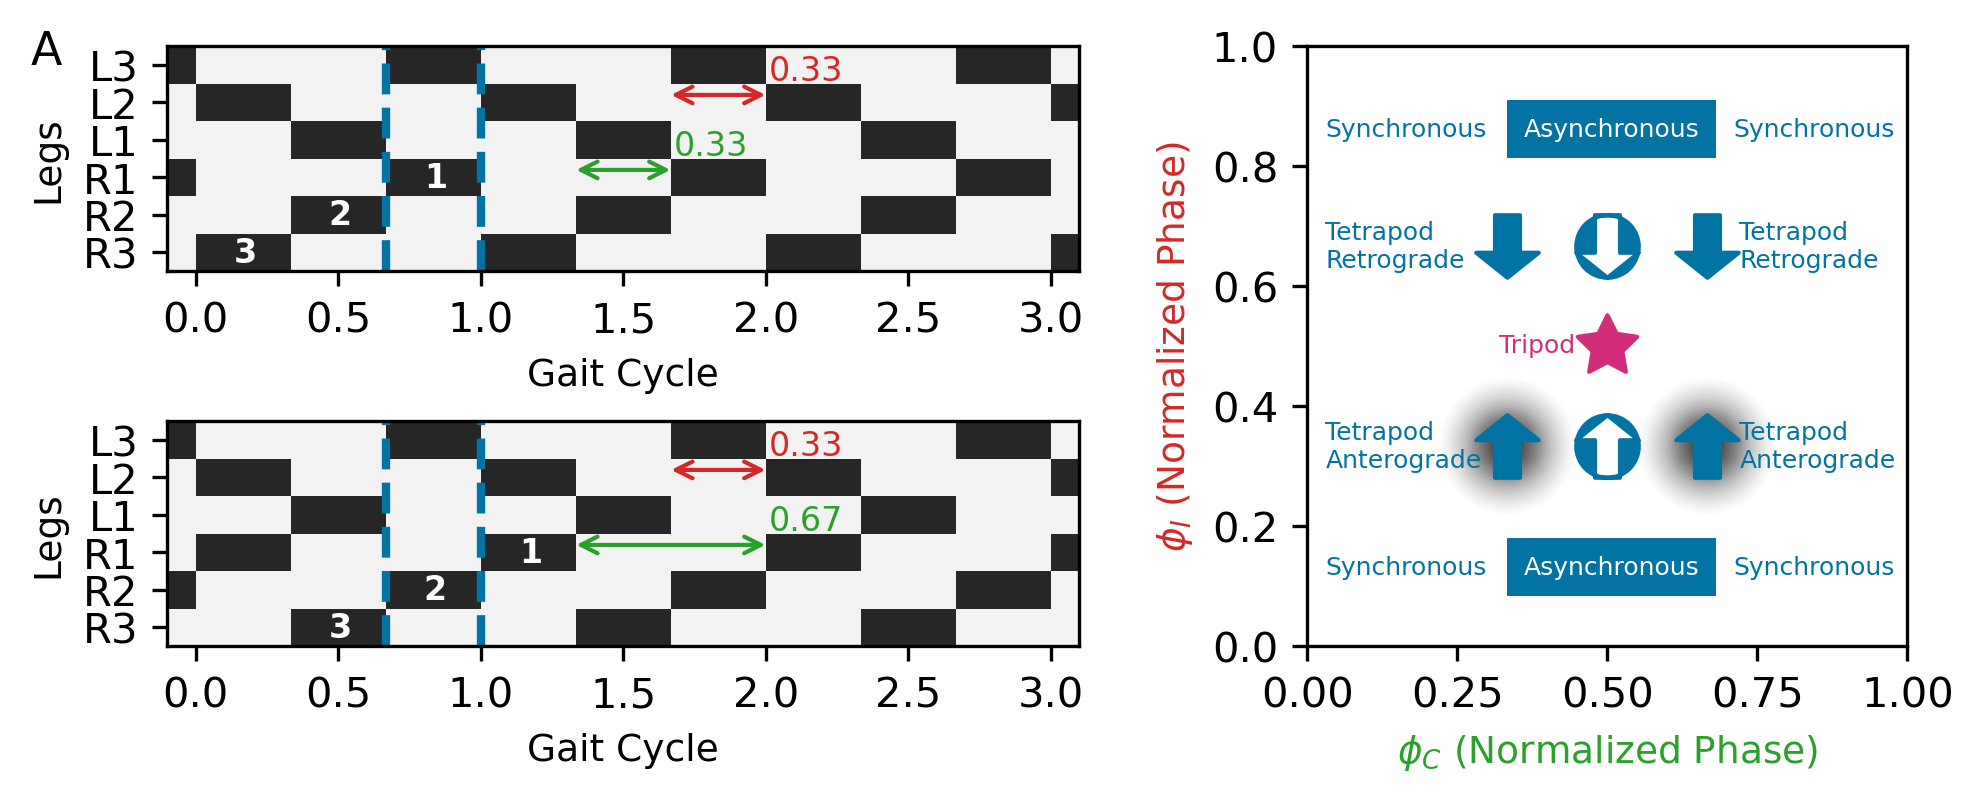

In [23]:
# Exploring specific combinations:
# here = Tetrapod anterograde
# anterior offset is 1/3, opposite offset is 1/3 or 2/3

num_cycles = 4
duty_factor =     2/3 # in fraction of gait cycle
anterior_offset = 1/3 # in fraction of gait cycle
opposite_offset = 1/3 # in fraction of gait cycle

f = plt.figure(figsize = (8,2.5), dpi=300)
ax1 = f.add_axes([0.1,0.6,0.38,0.30])
ax1, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax1, num_legs, num_cycles, 
                                                                duty_factor, anterior_offset, opposite_offset)
ax1 = annotateSimulatedSteps(ax1, plot_legs, duty_factor, anterior_offset, opposite_offset, stance_start)
ax1.set_xlim([-0.1,3.1])
ax1.yaxis.label.set_size(tick_fontsize)
ax1.xaxis.label.set_size(tick_fontsize)
ax1.annotate('A', xy=(-0.15, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

ax2 = f.add_axes([0.1,0.1,0.38,0.30])
ax2, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax2, num_legs, num_cycles, 
                                                                duty_factor, anterior_offset, opposite_offset+1/3)
ax2 = annotateSimulatedSteps(ax2, plot_legs, duty_factor, anterior_offset, opposite_offset+1/3, stance_start)
ax2.set_xlim([-0.1,3.1])
ax2.set_xlabel('Gait Cycle')
ax2.xaxis.label.set_size(tick_fontsize)
ax2.yaxis.label.set_size(tick_fontsize)

ax3 = f.add_axes([0.55, 0.1, 0.3, 0.8])
ax3 = offsetGaitstyleLabels(ax3, True, 6)
ax3.set_aspect('equal')
ax3.xaxis.label.set_size(tick_fontsize)
ax3.yaxis.label.set_size(tick_fontsize)
ax3.xaxis.label.set_color(contra_color)
ax3.yaxis.label.set_color(ipsi_color)

ax3 = hazyCircle(ax3, opposite_offset, anterior_offset, 0.12, 30, 2, 'Greys')
ax3 = hazyCircle(ax3, opposite_offset+1/3, anterior_offset, 0.12, 30, 2, 'Greys')

plt.show()

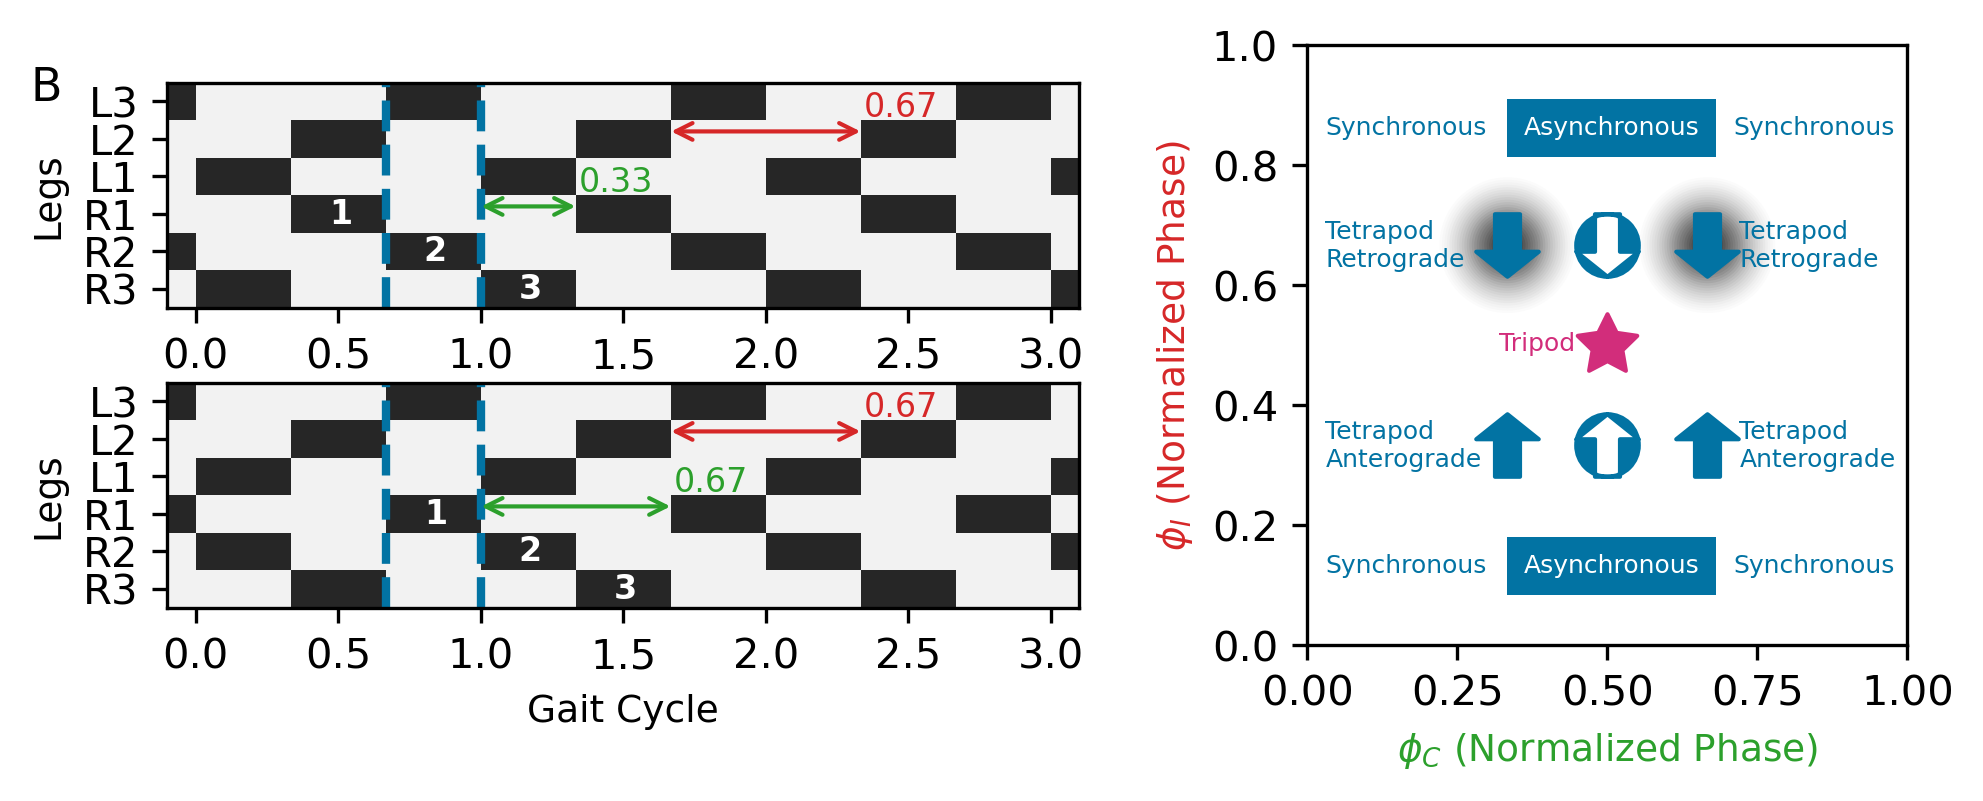

In [24]:
# Exploring specific combinations:
# here = Tetrapod retrograde
# anterior offset is 2/3, opposite offset is 1/3 or 2/3

num_cycles = 4
duty_factor =     2/3 # in fraction of gait cycle
anterior_offset = 2/3 # in fraction of gait cycle
opposite_offset = 1/3 # in fraction of gait cycle

f = plt.figure(figsize = (8,2.5), dpi=300)
ax1 = f.add_axes([0.1,0.55,0.38,0.30])
ax1, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax1, num_legs, num_cycles, 
                                                                duty_factor, anterior_offset, opposite_offset)
ax1 = annotateSimulatedSteps(ax1, plot_legs, duty_factor, anterior_offset, opposite_offset, stance_start)
ax1.set_xlim([-0.1,3.1])
ax1.yaxis.label.set_size(tick_fontsize)
ax1.xaxis.label.set_size(tick_fontsize)
ax1.annotate('B', xy=(-0.15, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

ax2 = f.add_axes([0.1,0.15,0.38,0.30])
ax2, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax2, num_legs, num_cycles, 
                                                                duty_factor, anterior_offset, opposite_offset+1/3)
ax2 = annotateSimulatedSteps(ax2, plot_legs, duty_factor, anterior_offset, opposite_offset+1/3, stance_start)
ax2.set_xlim([-0.1,3.1])
ax2.set_xlabel('Gait Cycle')
ax2.xaxis.label.set_size(tick_fontsize)
ax2.yaxis.label.set_size(tick_fontsize)

ax3 = f.add_axes([0.55, 0.1, 0.3, 0.8])
ax3 = offsetGaitstyleLabels(ax3, True, 6)
ax3.set_aspect('equal')
ax3.xaxis.label.set_size(tick_fontsize)
ax3.yaxis.label.set_size(tick_fontsize)
ax3.xaxis.label.set_color(contra_color)
ax3.yaxis.label.set_color(ipsi_color)

ax3 = hazyCircle(ax3, opposite_offset, anterior_offset, 0.12, 30, 2, 'Greys')
ax3 = hazyCircle(ax3, opposite_offset+1/3, anterior_offset, 0.12, 30, 2, 'Greys')

plt.show()

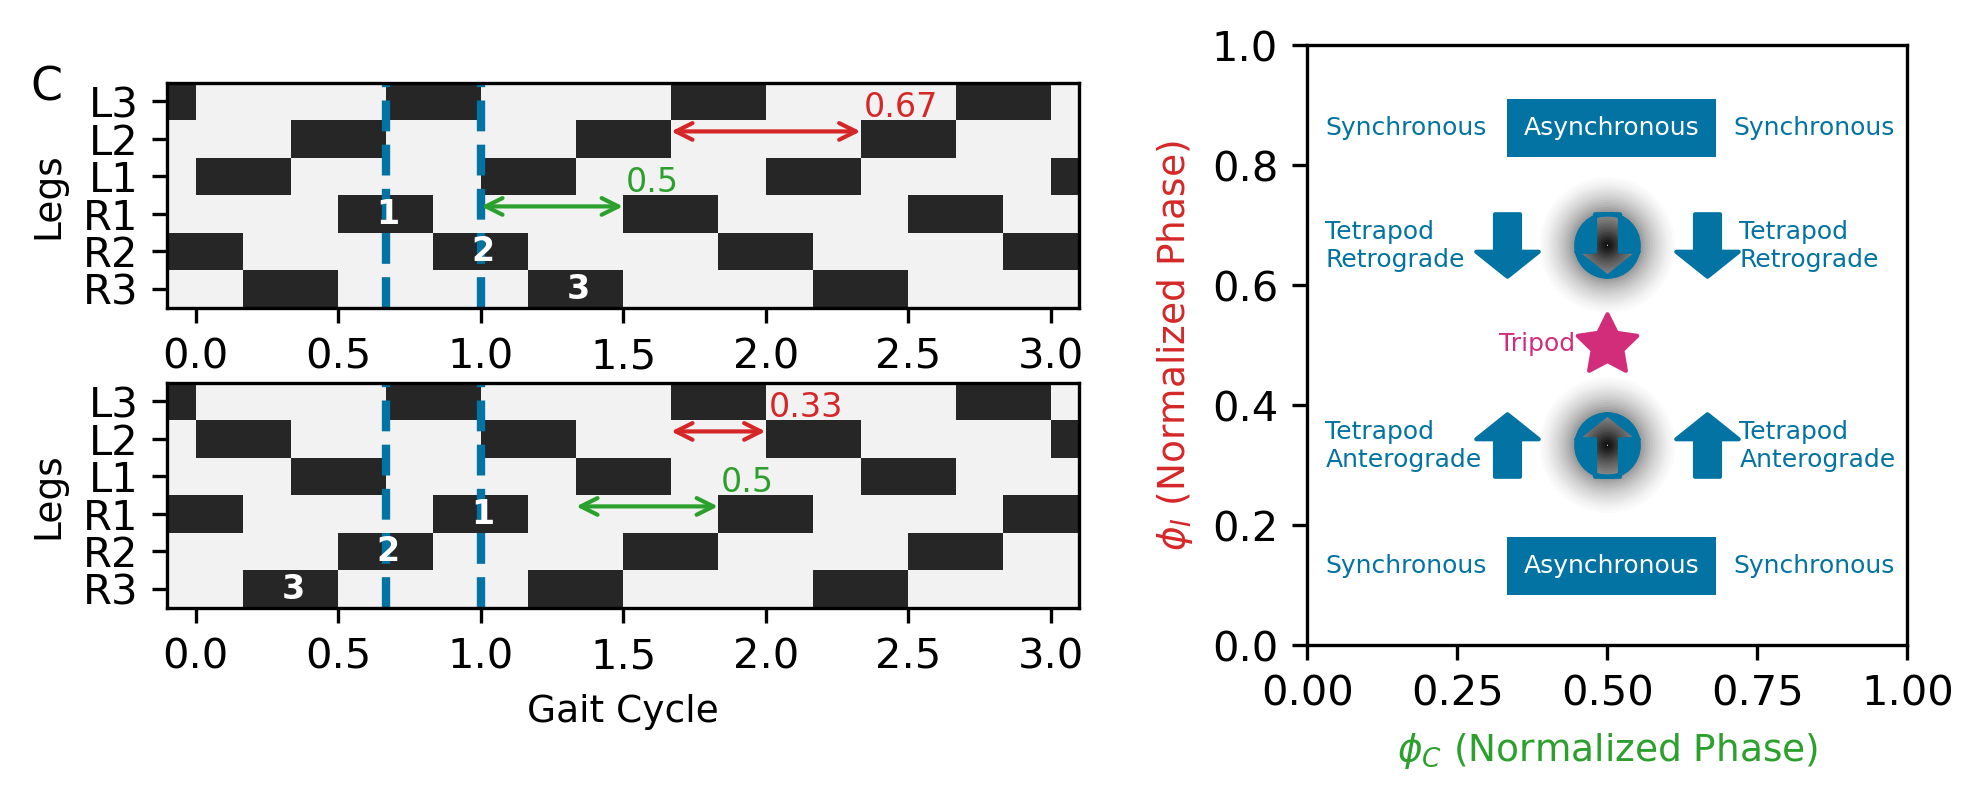

In [25]:
# Exploring specific combinations:
# here = Tetrapod 'asynchronous'
# anterior offset is 1/3 (anterograde), or 2/3 (retrograde)
# opposite offset 1/2 (asynchronous)

num_cycles = 4
duty_factor =     2/3 # in fraction of gait cycle
anterior_offset = 1/3 # in fraction of gait cycle
opposite_offset = 1/2 # in fraction of gait cycle

f = plt.figure(figsize = (8,2.5), dpi=300)
ax1 = f.add_axes([0.1,0.55,0.38,0.30])
ax1, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax1, num_legs, num_cycles, 
                                                                duty_factor, anterior_offset+1/3, opposite_offset)
ax1 = annotateSimulatedSteps(ax1, plot_legs, duty_factor, anterior_offset+1/3, opposite_offset, stance_start)
ax1.set_xlim([-0.1,3.1])
ax1.yaxis.label.set_size(tick_fontsize)
ax1.xaxis.label.set_size(tick_fontsize)
ax1.annotate('C', xy=(-0.15, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

ax2 = f.add_axes([0.1,0.15,0.38,0.30])
ax2, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax2, num_legs, num_cycles, 
                                                                duty_factor, anterior_offset, opposite_offset)
ax2 = annotateSimulatedSteps(ax2, plot_legs, duty_factor, anterior_offset, opposite_offset, stance_start)
ax2.set_xlim([-0.1,3.1])
ax2.set_xlabel('Gait Cycle')
ax2.xaxis.label.set_size(tick_fontsize)
ax2.yaxis.label.set_size(tick_fontsize)

ax3 = f.add_axes([0.55, 0.1, 0.3, 0.8])
ax3 = offsetGaitstyleLabels(ax3, True, 6)
ax3.set_aspect('equal')
ax3.xaxis.label.set_size(tick_fontsize)
ax3.yaxis.label.set_size(tick_fontsize)
ax3.xaxis.label.set_color(contra_color)
ax3.yaxis.label.set_color(ipsi_color)

ax3 = hazyCircle(ax3, opposite_offset, anterior_offset, 0.12, 30, 2, 'Greys')
ax3 = hazyCircle(ax3, opposite_offset, anterior_offset+1/3, 0.12, 30, 2, 'Greys')

plt.show()

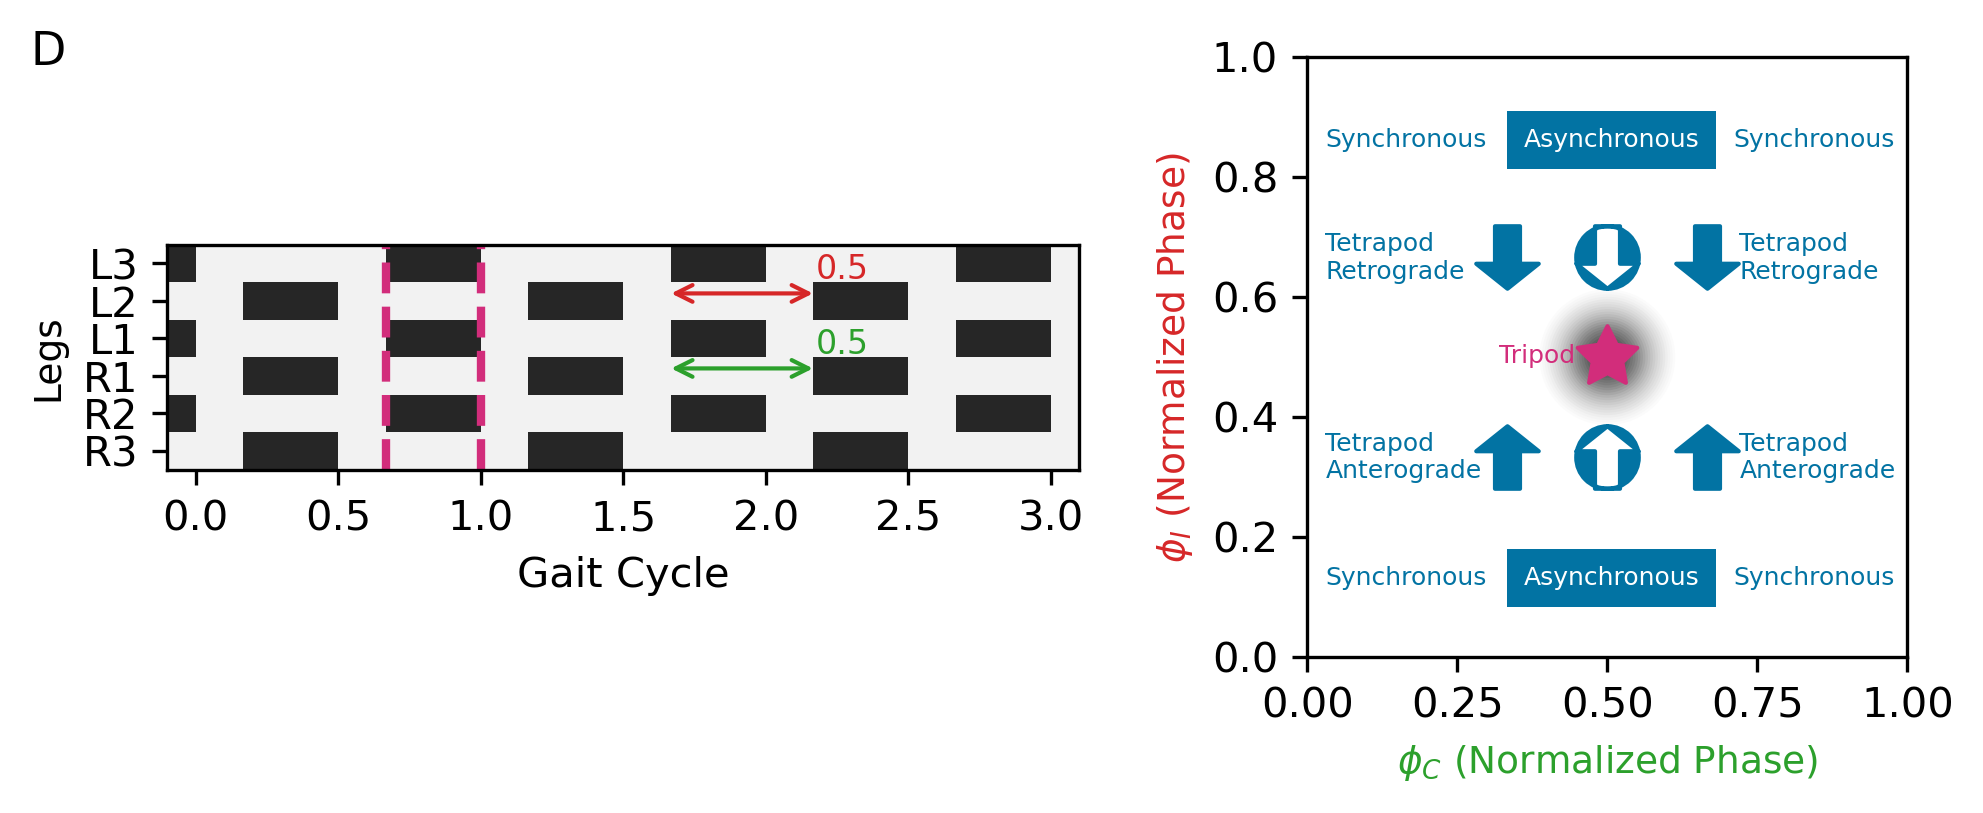

In [26]:
# Exploring specific combinations:
# here = Tripod
# anterior offset is 1/2; opposite offset 1/2

num_cycles = 4
duty_factor =     2/3 # in fraction of gait cycle
anterior_offset = 1/2 # in fraction of gait cycle
opposite_offset = 1/2 # in fraction of gait cycle

f = plt.figure(figsize = (8,2.5), dpi=300)
ax1 = f.add_axes([0.1,0.35,0.38,0.30])
ax1, plot_legs, stance_start = gaitFunctions.plotSimulatedSteps(ax1, num_legs, num_cycles, 
                                                                duty_factor, anterior_offset, opposite_offset)
ax1 = annotateSimulatedSteps(ax1, plot_legs, duty_factor, anterior_offset, opposite_offset, stance_start)
ax1.set_xlim([-0.1,3.1])
ax1.yaxis.label.set_size(tick_fontsize)
ax1.annotate('D', xy=(-0.15, 1.8), xycoords='axes fraction', fontsize=axis_fontsize)


ax3 = f.add_axes([0.55, 0.1, 0.3, 0.8])
ax3 = offsetGaitstyleLabels(ax3, True, 6)
ax3.set_aspect('equal')
ax3.xaxis.label.set_size(tick_fontsize)
ax3.yaxis.label.set_size(tick_fontsize)
ax3.xaxis.label.set_color(contra_color)
ax3.yaxis.label.set_color(ipsi_color)

ax3 = hazyCircle(ax3, opposite_offset, anterior_offset, 0.12, 30, 2, 'Greys')

plt.show()

# Contralateral vs. ipsilateral phases
## ϕc (Normalized Phase) vs. ϕi (Normalized Phase)
### Nirody Figure 4D

Strides:  4414


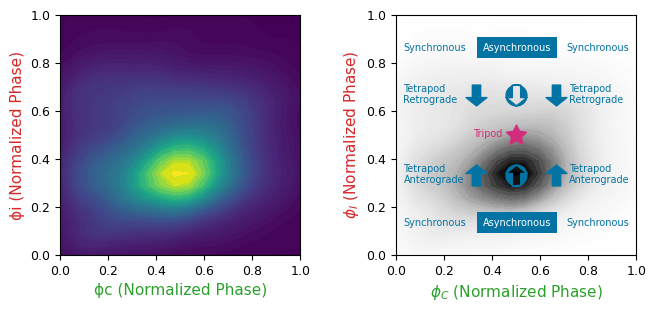

In [27]:
ipsi_swing_offset_proportions = []
contra_swing_offset_proportions = []
speeds=[]

# code modified from swingTimingProportions function above
individuals = np.sort(np.unique(step_df['uniq_id'].values))
for ref_leg in ipsi_offset_legs:
    for individual in individuals:
        individual_data = step_df[step_df['uniq_id']==individual]
        ref_leg_swings = individual_data[individual_data['legID'] == ref_leg]['UpTime'].values
        anterior_leg_swings = individual_data[individual_data['legID'] == ipsi_legs[ref_leg]]['UpTime'].values
        opposite_leg_swings = individual_data[individual_data['legID'] == contra_legs[ref_leg]]['UpTime'].values
        
        ref_leg_speeds = individual_data[individual_data['legID'] == ref_leg]['speed_during_step'].values
        ref_leg_bodylengths = individual_data[individual_data['legID'] == ref_leg]['average_tardigrade_length'].values
        
        for i, ref_swing in enumerate(ref_leg_swings[:-1]):
            next_ref_swing = ref_leg_swings[i+1]
            next_ant_idx = np.where(anterior_leg_swings>ref_swing)[0]
            next_opp_idx = np.where(opposite_leg_swings>ref_swing)[0]
            
            # add speed
            speed_during_step = ref_leg_speeds[i]
            length_during_step = ref_leg_bodylengths[i]
            
            if len(next_ant_idx) > 0 and len(next_opp_idx) > 0:
                next_ant_swing = anterior_leg_swings[next_ant_idx[0]]
                next_opp_swing = opposite_leg_swings[next_opp_idx[0]]
                
                ref_cycle = next_ref_swing-ref_swing
                
                ant_swing_offset = next_ant_swing-ref_swing
                opp_swing_offset = next_opp_swing-ref_swing
                
                ant_swing_phase_proportion = ant_swing_offset / ref_cycle
                opp_swing_phase_proportion = opp_swing_offset / ref_cycle
                
                if ant_swing_phase_proportion <= ref_cycle and opp_swing_phase_proportion < ref_cycle:
                    ipsi_swing_offset_proportions.append(ant_swing_phase_proportion) 
                    contra_swing_offset_proportions.append(opp_swing_phase_proportion)
                    speeds.append(speed_during_step/length_during_step)

ipsi_phase = np.array(ipsi_swing_offset_proportions)
cont_phase = np.array(contra_swing_offset_proportions)
print('Strides: ', len(ipsi_phase))

f = plt.figure(figsize=(8,3))
ax1 = f.add_axes([0.1,0.1,0.38,0.8])
ax2 = f.add_axes([0.52,0.1,0.38,0.8], sharex=ax1, sharey=ax1)

ax1 = sns.kdeplot(ax=ax1, x=cont_phase, y=ipsi_phase, fill=True, cmap='viridis', thresh=0, levels=60)
ax2 = sns.kdeplot(ax=ax2, x=cont_phase, y=ipsi_phase, fill=True, cmap='Greys', thresh=0, levels=60) # Greys or binary

for ax in [ax1,ax2]:
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('ϕc (Normalized Phase)', fontsize=axis_fontsize, color=contra_color)
    ax.set_ylabel('ϕi (Normalized Phase)', fontsize=axis_fontsize, color=ipsi_color)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

ax2=offsetGaitstyleLabels(ax2, True, 7) # False for no text
plt.show()

# Gait Style Proportion Plots

Number of individuals here:  103


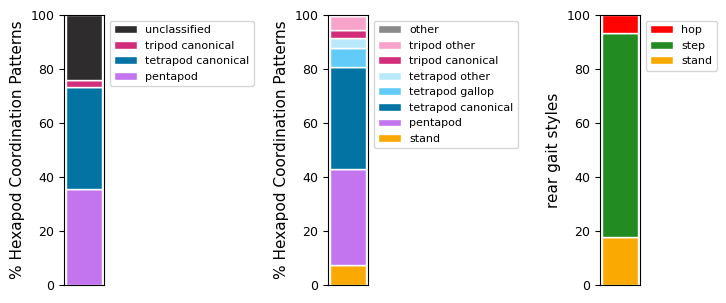

Values to match Nirody paper ... tripod: 2.7%; tetrapod: 37.8%; pentapod: 35.5%; unclassified: 23.9%


Nirody paper vals =               tripod: 3%,  tetrapod: 31%,   pentapod: 10%


In [28]:
''' 
Nirody figure 1D ... 
Percentages in canonical hexapod gait categories
They only report pentapod, canonical tripod, canonical tetrapod, and 'unclassified'

We can reproduce this ...
And we can also get a bit more granular
For example, for tetrapod we can report: tetrapod canonical, tetrapod gallop, tetrapod other
... and for tripod we can report: tripod canonical, tripod other

So, we will report these numbers (Nirody version and our more granular version)
Also, make plots (Nirody plot with their colors, our plot with our colors)

Can also report what the rear legs are doingd

'''
hexapod_combos, hexapod_color_dict = gaitFunctions.get_gait_combo_colors('hexapod')
bipod_combos, bipod_color_dict = gaitFunctions.get_gait_combo_colors('bipod')

# load gait data from gait_styles sheet
gait_df = pd.read_excel(excel_file, sheet_name='gait_summaries', index_col=None)
num_individuals = len(gait_df['% pentapod (lateral legs)'].values)
print('Number of individuals here: ', num_individuals)

# Nirody reported values for hexapod gait (and hex colors)
pentapod = np.mean(gait_df['% pentapod (lateral legs)'].values) # color = #d22d7b
tetrapod_canonical = np.mean(gait_df['% tetrapod canonical (lateral legs)'].values) #009bdd
tripod_canonical = np.mean(gait_df['% tripod canonical (lateral legs)'].values) #5d257e
unclassified = 100 - (pentapod + tetrapod_canonical + tripod_canonical) #181818

# Rest of the values for hexapod gait (and adjacent colors)
stand = np.mean(gait_df['% stand (lateral legs)'].values) #bf1717
tetrapod_gallop = np.mean(gait_df['% tetrapod gallop (lateral legs)'].values) #a4ddf5
tetrapod_other = np.mean(gait_df['% tetrapod other (lateral legs)'].values) #caecfa
tripod_other = np.mean(gait_df['% tripod other (lateral legs)'].values) #c292de
other = np.mean(gait_df['% other (lateral legs)'].values) #8a8a8a

# Values for rear legs
rear_stand = np.mean(gait_df['% stand (rear legs)'].values)
rear_step = np.mean(gait_df['% step (rear legs)'].values)
rear_hop = np.mean(gait_df['% hop (rear legs)'].values)

# set up figure
f = plt.figure(figsize=(8,3))
hexapod_ylab = '% Hexapod Coordination Patterns'

# Nirody hexapod categories
ax1 = f.add_axes([0.05,0.05,0.05,0.9])
groups = [['exemplaris']]
n_categories = ['pentapod','tetrapod canonical','tripod canonical','unclassified']
n_proportions = [[pentapod, tetrapod_canonical, tripod_canonical, unclassified]]
n_plot_colors = [hexapod_color_dict[x.replace(' ','_')] for x in n_categories]
ax1 = gaitFunctions.percentagesPlotWithLegend(ax1, groups, n_categories, n_proportions, 
                                              n_plot_colors, hexapod_ylab)

# All hexapod categories
ax2 = f.add_axes([0.38,0.05,0.05,0.9])
a_categories = ['stand','pentapod','tetrapod canonical','tetrapod gallop','tetrapod other',
              'tripod canonical','tripod other','other']
a_proportions = [[stand, pentapod, tetrapod_canonical, tetrapod_gallop, tetrapod_other,
                tripod_canonical, tripod_other, other]]
a_plot_colors = [hexapod_color_dict[x.replace(' ','_')] for x in a_categories]
ax2 = gaitFunctions.percentagesPlotWithLegend(ax2, groups, a_categories, a_proportions, 
                                              a_plot_colors, hexapod_ylab)

# Rear categories
ax3 = f.add_axes([0.72,0.05,0.05,0.9]) 
r_categories = ['stand','step','hop']
r_proportions = [[rear_stand, rear_step, rear_hop]]
r_plot_colors = [bipod_color_dict[x] for x in r_categories]
ax3 = gaitFunctions.percentagesPlotWithLegend(ax3, groups, r_categories, r_proportions, 
                                              r_plot_colors, 'rear gait styles')

summary = 'Values to match Nirody paper ... '
summary += ('tripod: ' + str(np.round(tripod_canonical,1)) + '%; ')
summary += ('tetrapod: ' + str(np.round(tetrapod_canonical,1)) + '%; ')
summary += ('pentapod: ' + str(np.round(pentapod,1)) + '%; ')
summary += ('unclassified: ' + str(np.round(unclassified,1)) + '%')

for ax in [ax1,ax2,ax3]:
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_size(axis_fontsize)

plt.show()
print(summary)
print('\n')
print('Nirody paper vals =               tripod: 3%,  tetrapod: 31%,   pentapod: 10%')

# coordination strength vs. speed or % tetrapod or tripod

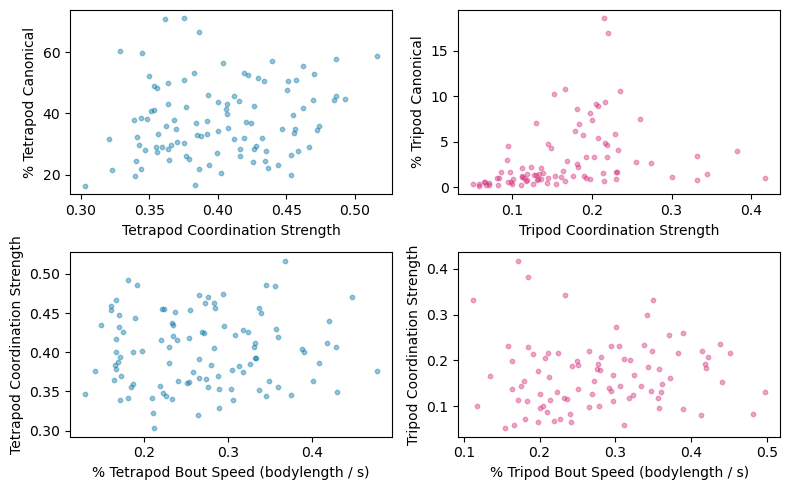

In [29]:
# ... coordination strength vs. speed? but want to save speed for next figure?
id_tetrapod = dict(zip(gait_df['Identifier'].values, 
                       gait_df['% tetrapod canonical (lateral legs)'].values))
id_tripod = dict(zip(gait_df['Identifier'].values, 
                       gait_df['% tripod canonical (lateral legs)'].values))
# ... coordination strength vs. % tetrapod or tripod ... let's see how those look
combos, combo_colors = gaitFunctions.get_gait_combo_colors('lateral')
tetra_color = combo_colors['tetrapod_canonical']
tripod_color = combo_colors['tripod_canonical']
f,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(8,5))
ax1.scatter(gait_df['Tetrapod Coordination Strength'].values,
           gait_df['% tetrapod canonical (lateral legs)'].values,s=marker_size,
            alpha=marker_alpha,c=tetra_color)
ax1.set_ylabel('% Tetrapod Canonical')
ax1.set_xlabel('Tetrapod Coordination Strength')
ax2.scatter(gait_df['Tripod Coordination Strength'].values,
           gait_df['% tripod canonical (lateral legs)'].values,s=marker_size,
            alpha=marker_alpha,c=tripod_color)
ax2.set_ylabel('% Tripod Canonical')
ax2.set_xlabel('Tripod Coordination Strength')

ax3.scatter(gait_df['Tetrapod Bout Speed (bodylength / s)'].values,
           gait_df['Tetrapod Coordination Strength'].values,s=marker_size,
            alpha=marker_alpha,c=tetra_color)
ax3.set_xlabel('% Tetrapod Bout Speed (bodylength / s)')
ax3.set_ylabel('Tetrapod Coordination Strength')
ax4.scatter(gait_df['Tripod Bout Speed (bodylength / s)'].values,
           gait_df['Tripod Coordination Strength'].values,s=marker_size,
            alpha=marker_alpha,c=tripod_color)
ax4.set_xlabel('% Tripod Bout Speed (bodylength / s)')
ax4.set_ylabel('Tripod Coordination Strength')

plt.tight_layout()
plt.show()

Tetrapod ρ = 0.04 p = 0.71
Tripod   ρ = 0.16 p = 0.13


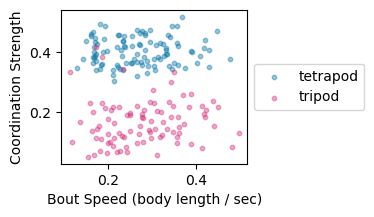

In [30]:
# Bout Speed vs. Coordination Strength on same axis
f,a = plt.subplots(1,1,figsize=(3,2))

tet_x = gait_df['Tetrapod Bout Speed (bodylength / s)'].values
tet_y = gait_df['Tetrapod Coordination Strength'].values
tri_x = gait_df['Tripod Bout Speed (bodylength / s)'].values
tri_y = gait_df['Tripod Coordination Strength'].values
tri_x = tri_x[~np.isnan(tri_x)]
tri_y = tri_y[~np.isnan(tri_y)]

a.scatter(tet_x,tet_y,s=marker_size,alpha=marker_alpha,c=tetra_color,label='tetrapod')
a.scatter(tri_x,tri_y,s=marker_size,alpha=marker_alpha,c=tripod_color,label='tripod')
a.set_xlabel('Bout Speed (body length / sec)')
a.set_ylabel('Coordination Strength')

# Shrink current axis by 20%
box = a.get_position()
a.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
a.legend(loc='center left', bbox_to_anchor=(1, 0.5))

tet_r,tet_p = stats.spearmanr(tet_x,tet_y)
tri_r,tri_p = stats.spearmanr(tri_x,tri_y)
print('Tetrapod ρ =', np.round(tet_r,2), 'p =', np.round(tet_p,2))
print('Tripod   ρ =', np.round(tri_r,2), 'p =', np.round(tri_p,2))

plt.show()

# Combined figure 
## with offset curves, ϕc x ϕi, and gait proportions

5175 steps for ipsilateral offsets
3809 steps for contralateral offsets
1530 steps for rear offsets
Tetrapod ρ = 0.04 p = 0.71
Tripod   ρ = 0.16 p = 0.13


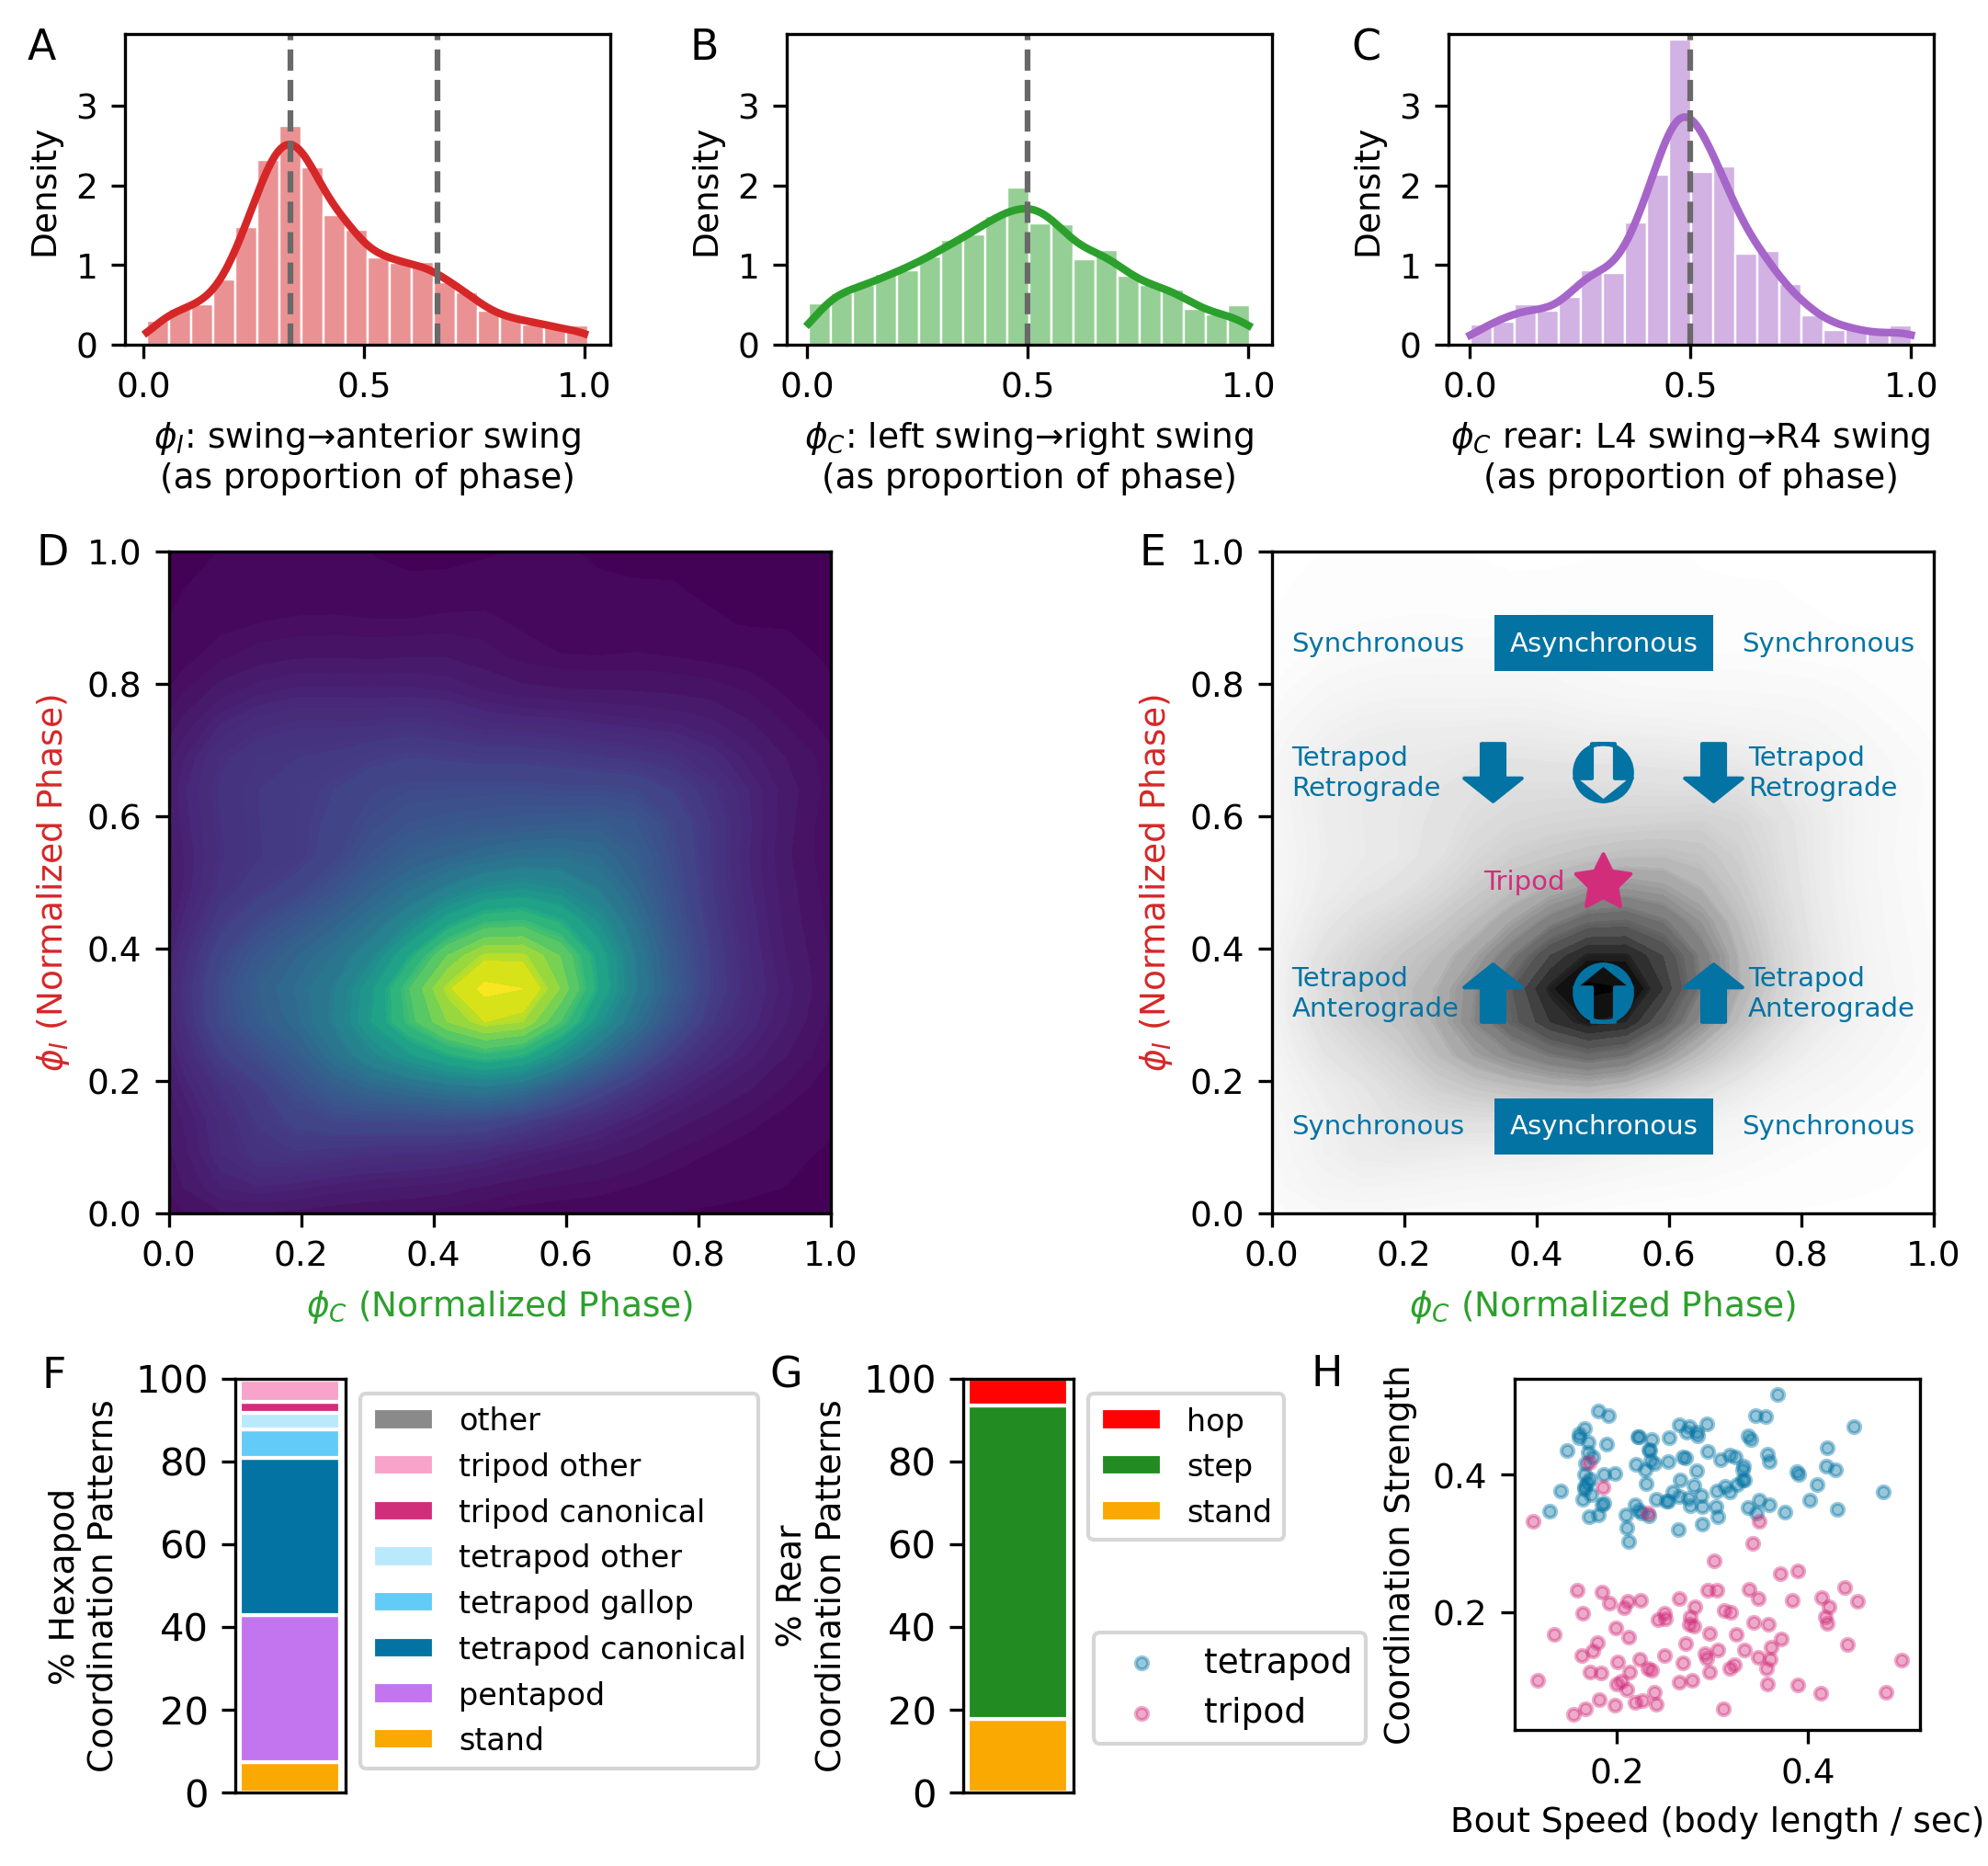

In [31]:
f = plt.figure(figsize = (8,7.5),dpi=300)

# offsets
ipsi_ax = f.add_axes(  [0.1, 0.75,0.22,0.15])
contra_ax = f.add_axes([0.4, 0.75,0.22,0.15])
rear_ax = f.add_axes(  [0.7, 0.75,0.22,0.15])
ipsi_ax=offsetCurve(ipsi_ax,ipsi_offset_legs,ipsi_legs,'$ϕ_I$: swing→anterior swing\n(as proportion of phase)')
contra_ax=offsetCurve(contra_ax,left_laterals,contra_legs,'$ϕ_C$: left swing→right swing\n(as proportion of phase)')
rear_ax=offsetCurve(rear_ax,['L4'],contra_legs,'$ϕ_C$ rear: L4 swing→R4 swing\n(as proportion of phase)')

# ϕc x ϕi heatmaps
heatmap_ax = f.add_axes ([0.11,  0.33,0.32,0.32])
arrowmap_ax = f.add_axes([0.61 , 0.33,0.32,0.32], sharex=heatmap_ax, sharey=heatmap_ax)
heatmap_ax = sns.kdeplot(ax=heatmap_ax, x=cont_phase, y=ipsi_phase, fill=True, cmap='viridis', thresh=0, levels=50)
arrowmap_ax = sns.kdeplot(ax=arrowmap_ax, x=cont_phase, y=ipsi_phase, fill=True, cmap='Greys', thresh=0, levels=50) # Greys or binary
arrowmap_ax=offsetGaitstyleLabels(arrowmap_ax, True, 7) # False for no text

# gait style proportions
hexgait_ax = f.add_axes( [0.15, 0.05, 0.05,  0.2])
reargait_ax = f.add_axes([0.48, 0.05, 0.05, 0.2])
hexgait_ax = gaitFunctions.percentagesPlotWithLegend(hexgait_ax, groups, a_categories, 
                                                 a_proportions, a_plot_colors, 
                                                 '% Hexapod\nCoordination Patterns')
reargait_ax = gaitFunctions.percentagesPlotWithLegend(reargait_ax, groups, r_categories, 
                                                      r_proportions, r_plot_colors,
                                                      '% Rear\nCoordination Patterns')

cs_ax = f.add_axes([0.73, 0.08, 0.23, 0.17])
cs_ax.scatter(tet_x,tet_y,s=marker_size,alpha=marker_alpha,c=tetra_color,label='tetrapod')
cs_ax.scatter(tri_x,tri_y,s=marker_size,alpha=marker_alpha,c=tripod_color,label='tripod')
cs_ax.set_xlabel('Bout Speed (body length / sec)', fontsize=tick_fontsize)
cs_ax.set_ylabel('Coordination Strength', fontsize=tick_fontsize)
cs_ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
# Shrink current axis by 20%
box = cs_ax.get_position()
cs_ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the left of the axis
cs_ax.legend(loc='center left', bbox_to_anchor=(-1.08, 0.12), fontsize=tick_fontsize)

tet_r,tet_p = stats.spearmanr(tet_x,tet_y)
tri_r,tri_p = stats.spearmanr(tri_x,tri_y)
print('Tetrapod ρ =', np.round(tet_r,2), 'p =', np.round(tet_p,2))
print('Tripod   ρ =', np.round(tri_r,2), 'p =', np.round(tri_p,2))

# adjust parameters and plot
letters = ['A','B','C']
for i,ax in enumerate([ipsi_ax,contra_ax,rear_ax]):
    ax.yaxis.label.set_size(tick_fontsize)
    ax.xaxis.label.set_size(tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize) 
    ax.set_ylim([0,3.9])
    ax.annotate(letters[i], xy=(-0.2, 0.92), xycoords='axes fraction', fontsize=axis_fontsize)

letters = ['D','E']
for i, ax in enumerate([heatmap_ax,arrowmap_ax]):
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('$ϕ_C$ (Normalized Phase)', fontsize=tick_fontsize, color=contra_color)
    ax.set_ylabel('$ϕ_I$ (Normalized Phase)', fontsize=tick_fontsize, color=ipsi_color)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.annotate(letters[i], xy=(-0.2, 0.98), xycoords='axes fraction', fontsize=axis_fontsize)

letters = ['F','G']
for i, ax in enumerate([hexgait_ax, reargait_ax]):
    ax.yaxis.label.set_size(tick_fontsize)
    ax.annotate(letters[i], xy=(-1.75, 0.98), xycoords='axes fraction', fontsize=axis_fontsize)

cs_ax.annotate('H', xy=(-0.5, 0.98), xycoords='axes fraction', fontsize=axis_fontsize)

plt.show()
    

# Partitioning Speed

In [32]:
# functions for partitioning speed
def getValuesWithinBoundary(vec,boundary):
    above_min = vec[np.where(vec>=boundary[0])]
    return above_min[np.where(above_min<=boundary[1])]

def getGaitProportionsInSpeedPartition(speed_partition, category_lists):
    
    # get total number of observations in this partition
    all_speeds = []
    for speed_vals in category_lists:
        all_speeds.extend(getValuesWithinBoundary(speed_vals, speed_partition))
    total_observations = len(all_speeds)

    # for each list of speed values, get the percentage of total that are within this partition
    percents_within_partition = []
    for speed_vals in category_lists:
        speed_vals = np.array(speed_vals)
        within_boundary = getValuesWithinBoundary(speed_vals, speed_partition)
        percents_within_partition.append(len(within_boundary) * 100 / total_observations)
        
    return percents_within_partition

def speedPartitionPlot(ax, speed_boundaries, category_lists, category_names, color_dict):
    
    for i in np.arange(len(speed_boundaries)-1):
        this_partition = [speed_boundaries[i],speed_boundaries[i+1]]

        percent_within_partition = getGaitProportionsInSpeedPartition(this_partition, category_lists)

        bottom = 0
        for j,catname in enumerate(category_names):
            ax.bar(i,percent_within_partition[j],color=color_dict[catname.replace(' ','_')],bottom=bottom)
            bottom += percent_within_partition[j]

    ax.set_ylabel('Percent')
    ax.set_xticks([0,1,2],['Low','Medium','High'])
    ax.set_xlabel(speed_col)
    
    return ax

def gaitDensityPlot(ax, categories, gaitspeed_df, speed_col, include_unclassified):
    # which leg sets to look at?
    if 'pentapod' in categories:
        gait_col = 'gaits_lateral'
        legset = 'hexapod'
    else:
        gait_col = 'gaits_rear'
        legset = 'bipod'

    # set up plot colors
    combos, color_dict = gaitFunctions.get_gait_combo_colors(legset)
    
    category_names = [x.replace('_',' ') for x in categories]
    category_lists = []

    # get speed data for each category
    for i, category in enumerate(categories):
        category_lists.append(gaitspeed_df[gaitspeed_df[gait_col]==category][speed_col].values)
    if include_unclassified:
        category_lists.append(gaitspeed_df[~gaitspeed_df[gait_col].isin(categories)][speed_col].values)
        category_names.append('unclassified')
    # print(category_names)

    for i, catname in enumerate(category_names):
        ax = sns.histplot(category_lists[i], stat='probability', binwidth=0.005, ax=ax, kde=True,
                          element='step', fill=False, visible=False, color=color_dict[catname.replace(' ','_')],
                         legend=True, label=catname)
        
    return ax, category_lists, category_names, color_dict

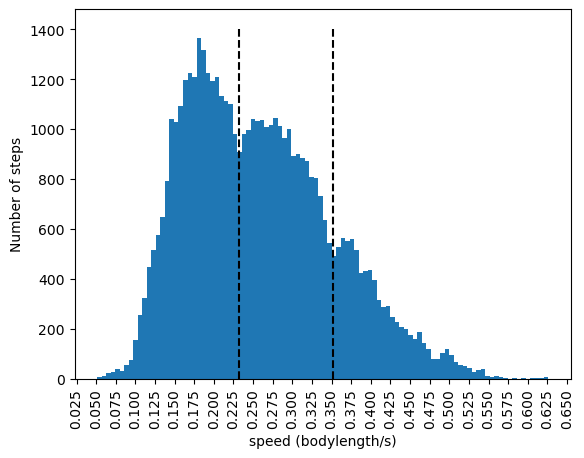

In [33]:
'''
How to partition the speed categories into slow, medium, fast?
First, see if there are any boundaries evident in the speed data
'''

# load the gait_speeds data into a dataframe
# 'cruising' does not matter here because we only measure steps during cruising
gaitspeed_df = pd.read_excel(excel_file, sheet_name='gait_speeds', index_col=None)
speed_col = 'speed (bodylength/s)' # 'speed (bodylength/s)' or 'speed (mm/s)' 
# print(np.unique(gaitspeed_df['gaits_lateral'].values)) # just to see what we have
# print(gaitspeed_df.columns) # just to see what is there

# partition speeds into three groups: low, medium, high
speed_boundaries = [0,0.232,0.352,1]

import matplotlib.ticker as ticker
tick_spacing = 0.025
fig, ax = plt.subplots(1,1)
ax.hist(gaitspeed_df[speed_col].values, bins=100)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Number of steps')
ax.set_xlabel(speed_col)
for x in [1,2]:
    ax.plot([speed_boundaries[x],speed_boundaries[x]],[0,1410],'--k')
plt.show()

# Speed vs. Ipsilateral Offsets
Maybe those 'shoulders' of ipsilateral offsets at 0.66 depend on speed?<br>
<br>
Partition speed using boundaries suggested in data
<br> = speed_boundaries = [0,0.232,0.352,1]

5175 5175


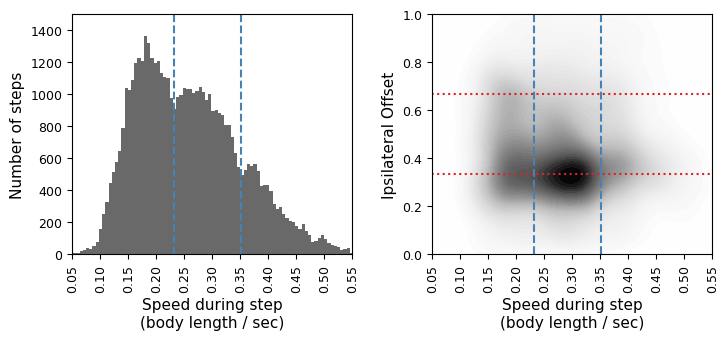

In [34]:
f = plt.figure(figsize=(8,3))
ax1 = f.add_axes([0.1,0.1,0.35,0.8])
ax2 = f.add_axes([0.55,0.1,0.35,0.8], sharex=ax1)

import matplotlib.ticker as ticker
tick_spacing = 0.05

### SPEED HISTOGRAM
# load the gait_speeds data into a dataframe
# 'cruising' does not matter here because we only measure steps during cruising
gaitspeed_df = pd.read_excel(excel_file, sheet_name='gait_speeds', index_col=None)
speed_col = 'speed (bodylength/s)' # 'speed (bodylength/s)' or 'speed (mm/s)' 

ax1.hist(gaitspeed_df[speed_col].values, bins=100, color='dimgrey')
ax1.set_ylabel('Number of steps')

### Speed vs. Ispsilateral offsets
ipsi_proportions = []
ipsi_speeds = []
ipsi_offsets = []

for leg in ipsi_offset_legs:
    ipsi_offsets, ipsi_proportions, ipsi_speeds = swingTimingProportions(ipsi_offsets, ipsi_proportions, 
                                                                         ipsi_speeds, step_df, leg, 
                                                                         ipsi_legs[leg])

print(len(ipsi_proportions), len(ipsi_speeds))

ax2 = sns.kdeplot(ax=ax2, x=ipsi_speeds, y=ipsi_proportions, fill=True, cmap='Greys', thresh=0, levels=50)
ax2.set_ylabel('Ipsilateral Offset', fontsize=14)
ax2.plot([0,1],[1/3,1/3],':',color=ipsi_color)
ax2.plot([0,1],[2/3,2/3],':',color=ipsi_color)
ax2.set_ylim([0,1])

for ax in [ax1,ax2]:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.tick_params(axis='x', rotation=90)
    ax.xaxis.label.set_size(axis_fontsize)
    ax.yaxis.label.set_size(axis_fontsize)
    ax.set_xlabel('Speed during step\n(body length / sec)', fontsize=axis_fontsize)
    # ax.xaxis.label.set_text('hihihihi') # cool

# partition speeds into three groups: low, medium, high
speed_boundaries = [0,0.232,0.352,1]

maxy = 1500

for i in [1,2]:
    ax1.plot([speed_boundaries[i],speed_boundaries[i]],[0,maxy],'--',color='steelblue')
    ax2.plot([speed_boundaries[i],speed_boundaries[i]],[0,1],'--',color='steelblue')

ax1.set_ylim([0,maxy])
ax1.set_xlim([0.05,0.55])
    
plt.show()

4978 4978


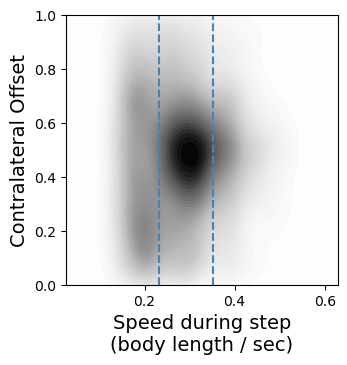

In [35]:
contra_proportions = []
contra_speeds = []
contra_offsets = []

for leg in ipsi_offset_legs:
    contra_offsets, contra_proportions, contra_speeds = swingTimingProportions(contra_offsets, contra_proportions, 
                                                                               contra_speeds, step_df, leg, 
                                                                               contra_legs[leg])

print(len(contra_proportions), len(contra_speeds))

fig,ax2 = plt.subplots(1,1,figsize=(3.5,3.5))
ax2 = sns.kdeplot(ax=ax2, x=contra_speeds, y=contra_proportions, fill=True, cmap='Greys', thresh=0, levels=50)

ax2.set_xlabel('Speed during step\n(body length / sec)', fontsize=14)
ax2.set_ylabel('Contralateral Offset', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_ylim([0,1])

for i in [1,2]:
    ax2.plot([speed_boundaries[i],speed_boundaries[i]],[0,1],'--',color='steelblue')

# ax2.set_aspect('equal')
plt.show()

# Partitioned speeds: arrows and stars and gaits

In [36]:
# speed_boundaries = [0,0.225,0.35,1] # before last dataset
speed_boundaries = [0,0.232,0.352,1]

fast_contra = []
fast_ipsi = []
medium_contra = []
medium_ipsi = []
slow_contra = []
slow_ipsi = []

for i, speed in enumerate(speeds):
    if speed_boundaries[0] < speed <= speed_boundaries[1]:
        slow_contra.append(contra_swing_offset_proportions[i])
        slow_ipsi.append(ipsi_swing_offset_proportions[i])
    elif speed_boundaries[1] < speed <= speed_boundaries[2]:
        medium_contra.append(contra_swing_offset_proportions[i])
        medium_ipsi.append(ipsi_swing_offset_proportions[i])
    else:
        fast_contra.append(contra_swing_offset_proportions[i])
        fast_ipsi.append(ipsi_swing_offset_proportions[i])

[1550, 1992, 839, 1518, 1995, 839]


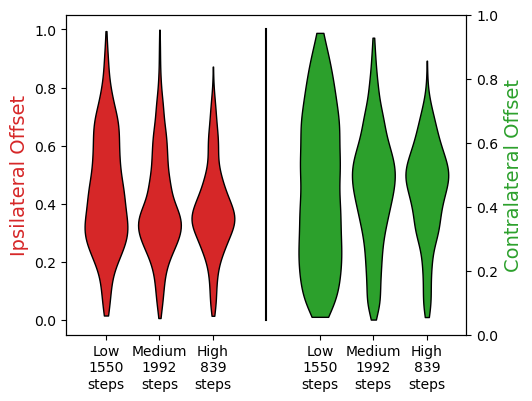

In [37]:
# Partitioned speed and ipsi and contra offsets
f = plt.figure(figsize=(5,4))
ax = f.add_axes([0.1,0.1,0.8,0.8])
ax2 = ax.twinx()

violin_positions = np.array([1,2,3,5,6,7])
violin_data = [slow_ipsi, medium_ipsi, fast_ipsi, slow_contra, medium_contra, fast_contra]
violin_data = [np.array(x) for x in violin_data]
violin_data = [x[np.where(x>0)] for x in violin_data]
violin_data = [x[np.where(x<1)] for x in violin_data]

violin_nums = [len(x) for x in violin_data]
print(violin_nums)

violin_xlabs = np.array(['Low\n'+str(violin_nums[0])+'\nsteps',
                  'Medium\n'+str(violin_nums[1])+'\nsteps',
                  'High\n'+str(violin_nums[2])+'\nsteps'] * 2)

violin_colors = [ipsi_color] * 3 + [contra_color] * 3
violins = ax.violinplot(violin_data, positions=violin_positions, widths=0.8, 
                         showmeans=False, showextrema=False, showmedians=False)

for i, pc in enumerate(violins['bodies']):
    pc.set_facecolor(violin_colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    
# ax.plot([0,4],[1/3,1/3],':',c=tetra_color)
# ax.plot([0,4],[1/2,1/2],':',c=tripod_color)
# ax.plot([0,4],[2/3,2/3],':',c=tetra_color)
ax.plot([4,4],[0,1],'-k')

ax.set_ylabel('Ipsilateral Offset',color=ipsi_color,fontsize=14)
ax2.set_ylabel('Contralateral Offset',color=contra_color,fontsize=14)
ax.set_xticks(violin_positions,violin_xlabs)
ax.tick_params(axis='both', which='major', labelsize=10)

# ax.set_ylim([0,1])
plt.show()

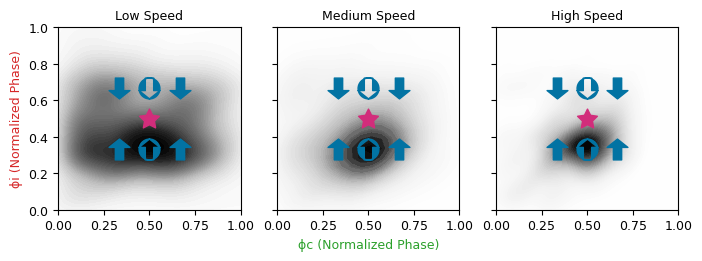

In [38]:
# Partitioned speed and star/arrow plots
f,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(8,3),sharey=True)

cmap = 'Greys' # Greys or binary

ax1 = sns.kdeplot(ax=ax1, x=slow_contra, y=slow_ipsi, fill=True, cmap=cmap, thresh=0, levels=50) 
ax1.set_title('Low Speed', fontsize=tick_fontsize)

ax2 = sns.kdeplot(ax=ax2, x=medium_contra, y=medium_ipsi, fill=True, cmap=cmap, thresh=0, levels=50) 
ax2.set_title('Medium Speed', fontsize=tick_fontsize)

ax3 = sns.kdeplot(ax=ax3, x=fast_contra, y=fast_ipsi, fill=True, cmap=cmap, thresh=0, levels=50) 
ax3.set_title('High Speed', fontsize=tick_fontsize)

for ax in [ax1,ax2,ax3]:
    ax=offsetGaitstyleLabels(ax, False)
#     ax.set_xlim([0.05,0.95])
#     ax.set_ylim([0.05,0.95]) 
#     ax.set_xlabel('ϕc (Normalized Phase)', fontsize=tick_fontsize, color=contra_color)
    ax.xaxis.label.set_text('') # cool
    ax.set_ylabel('ϕi (Normalized Phase)', fontsize=tick_fontsize, color=ipsi_color)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

ax2.set_xlabel('ϕc (Normalized Phase)', fontsize=tick_fontsize, color=contra_color)
plt.show()

# Speed and Gait Style Proportions

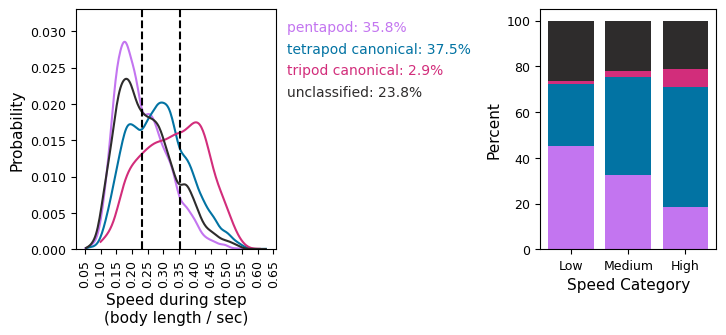

In [39]:
'''
VERSION = 4 gait categories: unclassified, pentapod, tetrapod, tripod

% in each gait are slightly different here compared to kinematics overview notebook
In kinematics overview, I report average value across all individuals
In this analysis, I report average value across all video frames 
    (some individuals have more frames than others)
'''
# partition speeds into three groups: low, medium, high
speed_boundaries = [0,0.232,0.352,1]

# set up categories and values to plot
categories = ['pentapod','tetrapod_canonical','tripod_canonical']
# include unclassified?
include_unclassified = True

# set up figure
f = plt.figure(figsize=(8,3))
ax1 = f.add_axes([0.1,0.1,0.25,0.8])
axLeg = f.add_axes([0.33,0.1,0.2,0.8])
ax2 = f.add_axes([0.68,0.1,0.22,0.8])

# get LEFT axis
ax1, category_lists, category_names, color_dict = gaitDensityPlot(ax1, categories, gaitspeed_df, speed_col, include_unclassified)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax1.tick_params(axis='x', rotation=90)
ax1.yaxis.label.set_size(axis_fontsize)
ax1.set_xlabel('Speed during step\n(body length / sec)', fontsize=axis_fontsize)

'''
RIGHT = % in each gait in speed categories low, medium, high
'''
# all_speeds = []
# for speed_vals in category_lists:
#     all_speeds.extend(speed_vals)
# plot distribution of different speeds?
# ax2 = sns.histplot(all_speeds, binwidth = 0.01, ax=ax2)

ax2 = speedPartitionPlot(ax2, speed_boundaries, category_lists, category_names, color_dict)
ax2.xaxis.label.set_text('Speed Category')
ax2.yaxis.label.set_size(axis_fontsize)
ax2.xaxis.label.set_size(axis_fontsize)

# fake legend
legend_maxy = 5
legend_yincrement = 0.5
legend_x = 2
# how many are in each gait category
percents_in_category = [np.round(len(x) * 100 / np.sum([len(x) for x in category_lists]),1) for x in category_lists]
for i, catname in enumerate(category_names):
    axLeg.text(legend_x, legend_maxy-(i*legend_yincrement), 
            catname + ': ' + str(percents_in_category[i]) + '%', 
            color=color_dict[catname.replace(' ','_')])
axLeg.set_axis_off()
axLeg.set_xlim([1.5,4.5])
axLeg.set_ylim([0,5.5])

max_line = 0.033
for i in [1,2]:
    ax1.plot([speed_boundaries[i],speed_boundaries[i]],[0,max_line],'--k')

ax2.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
ax1.set_ylim([0,max_line])
plt.show()

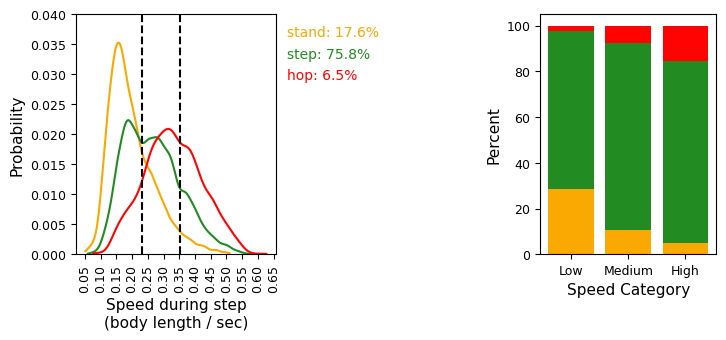

In [40]:
'''
rear legs
'''
# partition speeds into three groups: low, medium, high
speed_boundaries = [0,0.232,0.352,1]

# set up categories and values to plot
rear_categories = ['stand','step','hop']
# include unclassified?
rear_include_unclassified = False

# set up figure
f = plt.figure(figsize=(8,3))
ax1 = f.add_axes([0.1,0.1,0.25,0.8])
axLeg = f.add_axes([0.33,0.1,0.2,0.8])
ax2 = f.add_axes([0.68,0.1,0.22,0.8])

# get LEFT axis
ax1, rear_category_lists, rear_category_names, rear_color_dict = gaitDensityPlot(ax1, 
                                                                  rear_categories, 
                                                                  gaitspeed_df, 
                                                                  speed_col, 
                                                                  rear_include_unclassified)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax1.tick_params(axis='x', rotation=90)
ax1.yaxis.label.set_size(axis_fontsize)
ax1.set_xlabel('Speed during step\n(body length / sec)', fontsize=axis_fontsize)

'''
RIGHT = % in each gait in speed categories low, medium, high
'''
# all_speeds = []
# for speed_vals in category_lists:
#     all_speeds.extend(speed_vals)
# plot distribution of different speeds?
# ax2 = sns.histplot(all_speeds, binwidth = 0.01, ax=ax2)

# partition speeds into three groups: low, medium, high
ax2 = speedPartitionPlot(ax2, speed_boundaries, rear_category_lists, 
                         rear_category_names, rear_color_dict)
ax2.xaxis.label.set_text('Speed Category')
ax2.yaxis.label.set_size(axis_fontsize)
ax2.xaxis.label.set_size(axis_fontsize)

# fake legend
legend_maxy = 5
legend_yincrement = 0.5
legend_x = 2
# how many are in each gait category
rear_percents_in_category = [np.round(len(x) * 100 / np.sum([len(x) for x in rear_category_lists]),1) for x in rear_category_lists]
for i, catname in enumerate(rear_category_names):
    axLeg.text(legend_x, legend_maxy-(i*legend_yincrement), 
            catname + ': ' + str(rear_percents_in_category[i]) + '%', 
            color=rear_color_dict[catname.replace(' ','_')])
axLeg.set_axis_off()
axLeg.set_xlim([1.5,4.5])
axLeg.set_ylim([0,5.5])

max_line = 0.04
for i in [1,2]:
    ax1.plot([speed_boundaries[i],speed_boundaries[i]],[0,max_line],'--k')

for ax in [ax1,ax2]:
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_size(axis_fontsize)
    ax.xaxis.label.set_size(axis_fontsize)
ax1.set_ylim([0,max_line])

plt.show()

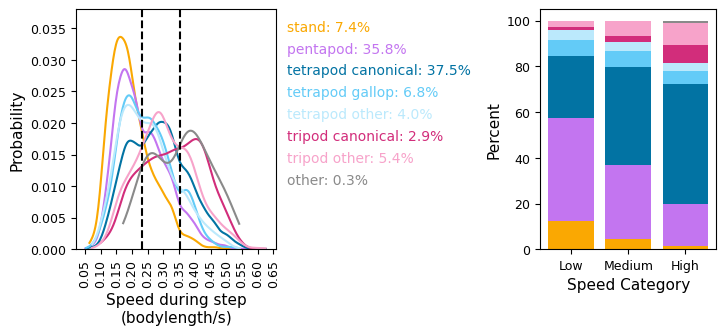

In [41]:
'''
All hexapod gait categories
'''

# partition speeds into three groups: low, medium, high
speed_boundaries = [0,0.232,0.352,1]

# set up categories and values to plot
hex_categories = ['stand','pentapod','tetrapod_canonical','tetrapod_gallop','tetrapod_other',
              'tripod_canonical','tripod_other','other']
# include unclassified?
hex_include_unclassified = False

# set up figure
f = plt.figure(figsize=(8,3))
ax1 = f.add_axes([0.1,0.1,0.25,0.8])
axLeg = f.add_axes([0.33,0.1,0.2,0.8])
ax2 = f.add_axes([0.68,0.1,0.22,0.8])

# get LEFT axis
ax1, hex_category_lists, hex_category_names, hex_color_dict = gaitDensityPlot(ax1, 
                        hex_categories, gaitspeed_df, speed_col, hex_include_unclassified)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax1.tick_params(axis='x', rotation=90)
ax1.yaxis.label.set_size(axis_fontsize)
ax1.set_xlabel('Speed during step\n(bodylength/s)', fontsize=axis_fontsize)
ax1.set_ylim([0,0.03])

'''
RIGHT = % in each gait in speed categories low, medium, high
'''
# all_speeds = []
# for speed_vals in category_lists:
#     all_speeds.extend(speed_vals)
# plot distribution of different speeds?
# ax2 = sns.histplot(all_speeds, binwidth = 0.01, ax=ax2)

# partition speeds into three groups: low, medium, high
ax2 = speedPartitionPlot(ax2, speed_boundaries, hex_category_lists, 
                         hex_category_names, hex_color_dict)
ax2.xaxis.label.set_text('Speed Category')
ax2.yaxis.label.set_size(axis_fontsize)
ax2.xaxis.label.set_size(axis_fontsize)

# fake legend
legend_maxy = 5
legend_yincrement = 0.5
legend_x = 2
# how many are in each gait category
hex_percents_in_category = [np.round(len(x) * 100 / np.sum([len(x) for x in hex_category_lists]),1) for x in hex_category_lists]
for i, catname in enumerate(hex_category_names):
    axLeg.text(legend_x, legend_maxy-(i*legend_yincrement), 
            catname + ': ' + str(hex_percents_in_category[i]) + '%', 
            color=hex_color_dict[catname.replace(' ','_')])
axLeg.set_axis_off()
axLeg.set_xlim([1.5,4.5])
axLeg.set_ylim([0,5.5])

max_line = 0.038
for i in [1,2]:
    ax1.plot([speed_boundaries[i],speed_boundaries[i]],[0,max_line],'--k')

for ax in [ax1,ax2]:
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_size(axis_fontsize)
    ax.xaxis.label.set_size(axis_fontsize)
ax1.set_ylim([0,max_line])

plt.show()

# Combined figure: speed partitioning

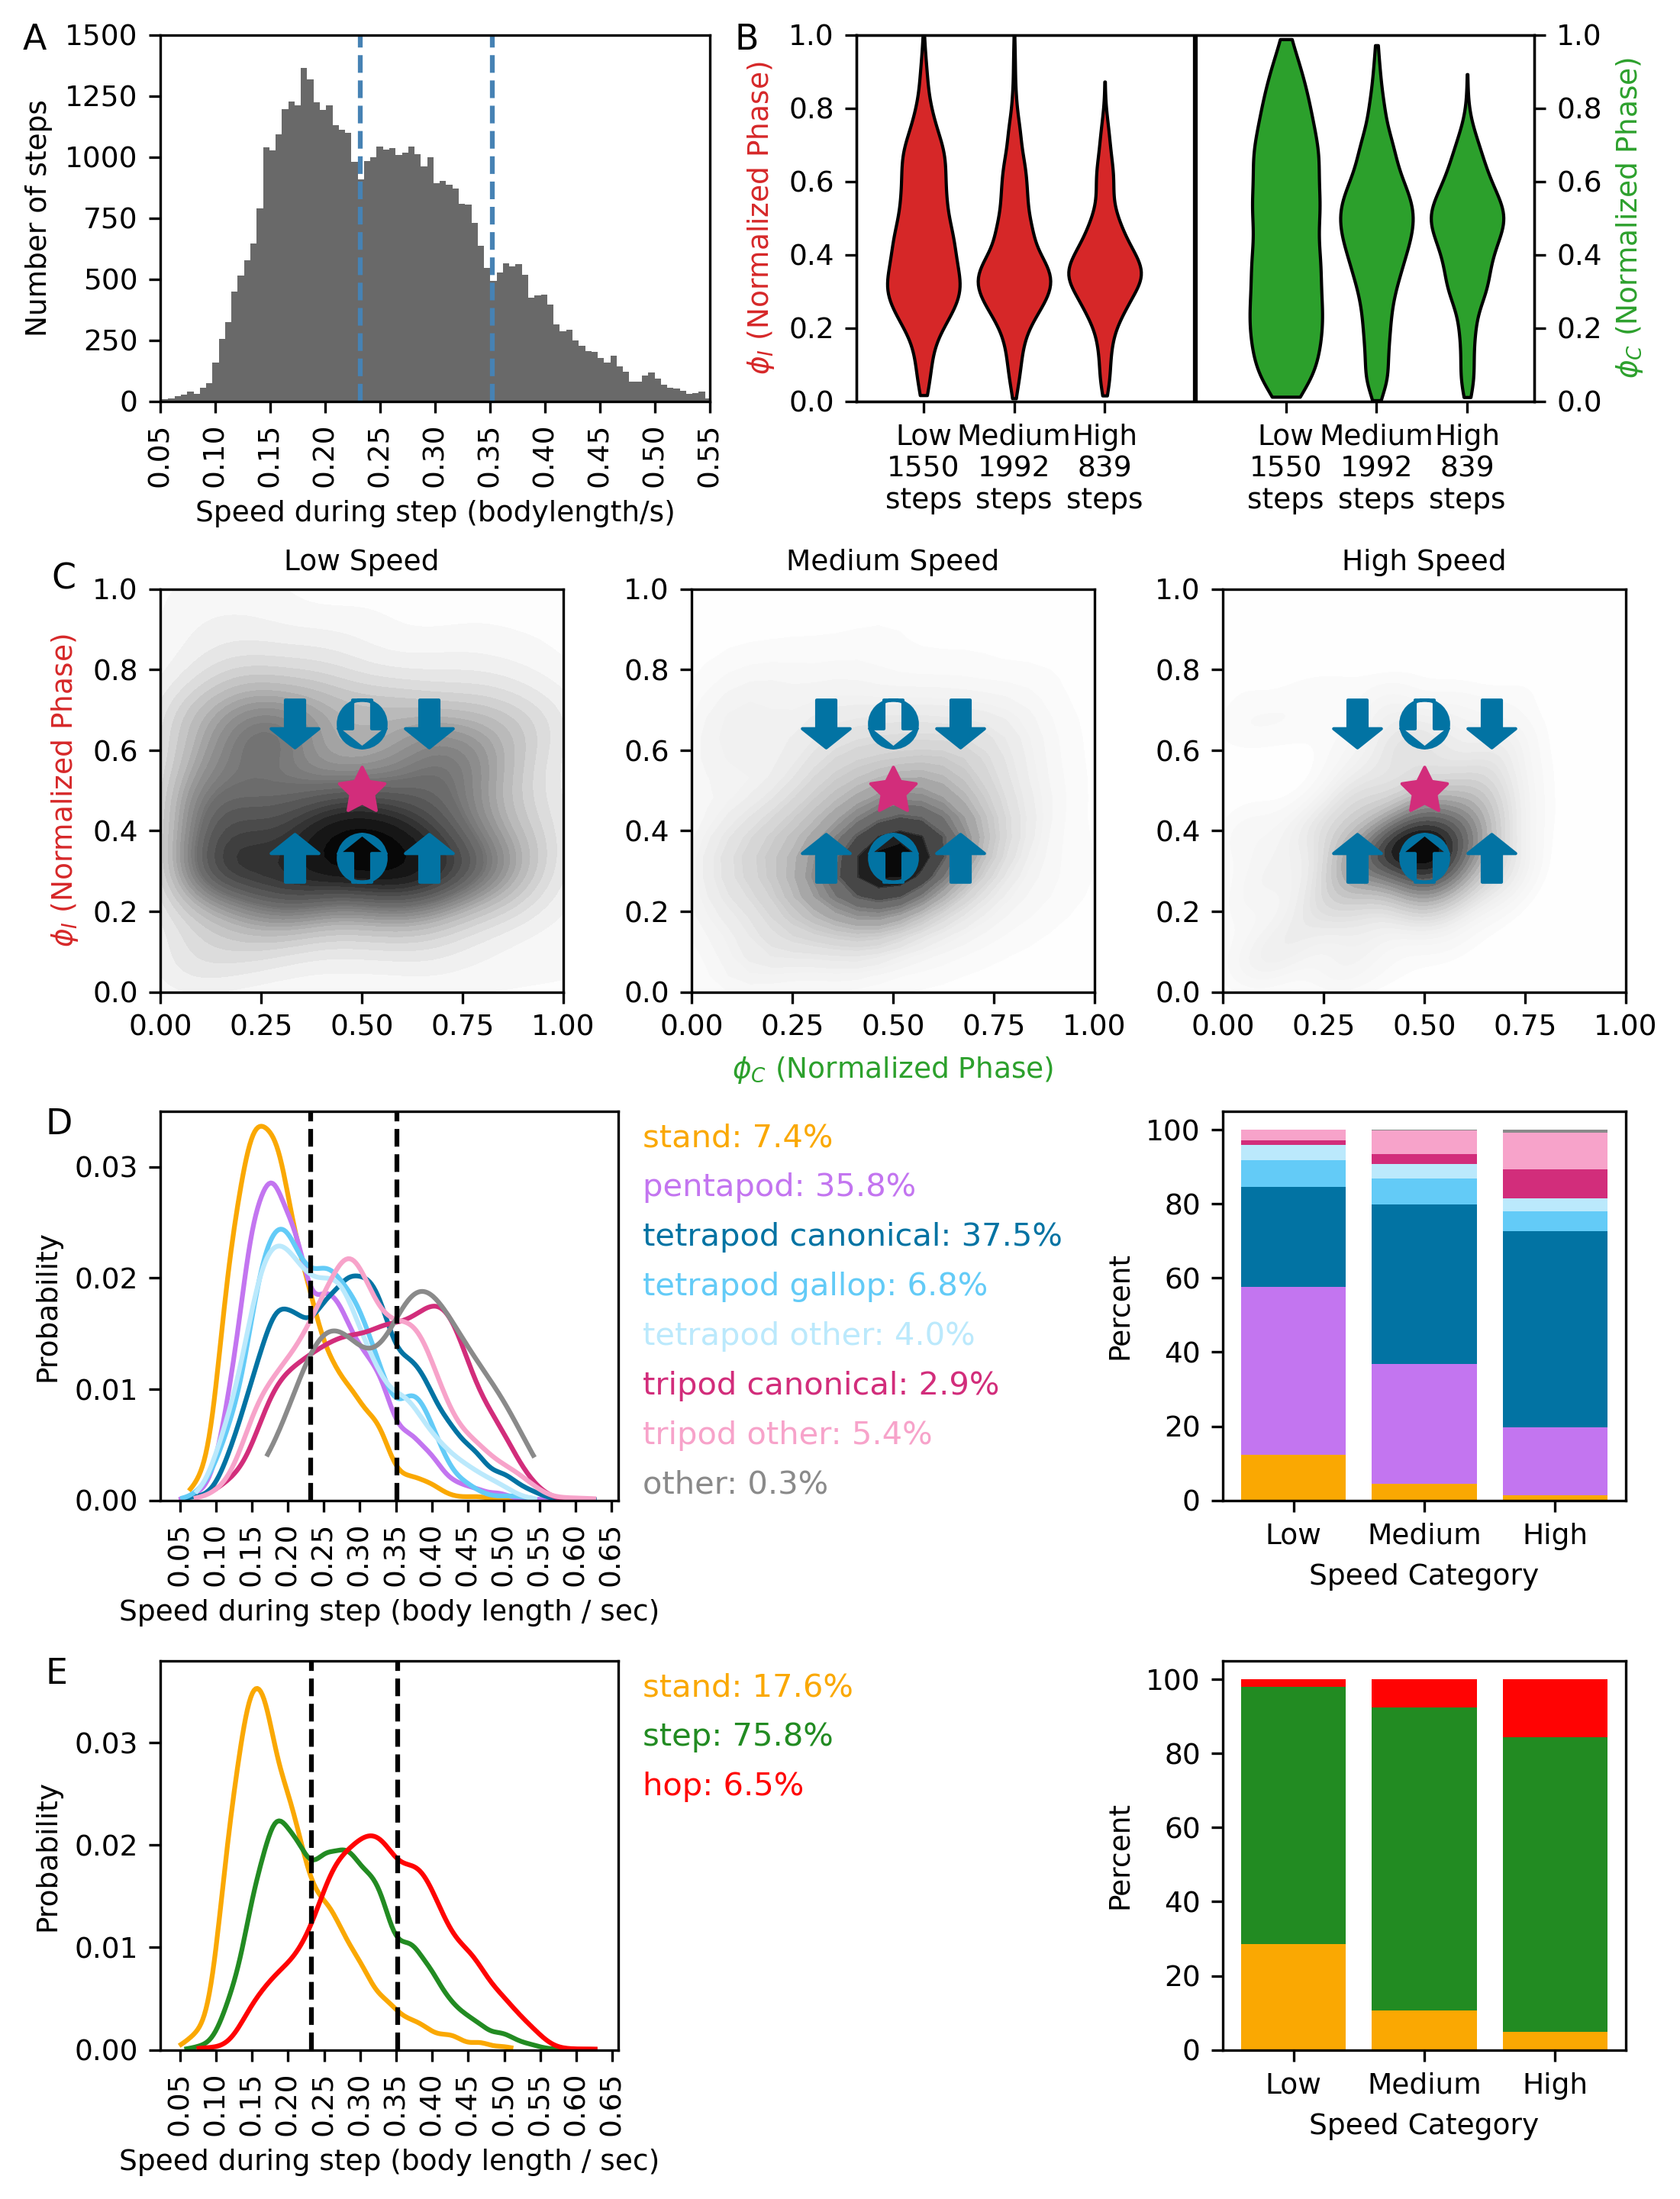

In [42]:
# partition speeds into three groups: low, medium, high
speed_boundaries = [0,0.232,0.352,1]

f = plt.figure(figsize=(8,10),dpi=300)
speed_ax = f.add_axes(  [0.1, 0.77, 0.3, 0.16]) # speed histogram
# sp_ipsi_ax = f.add_axes([0.6,0.78,0.3,0.17], sharex=speed_ax) # speed vs. ipsilateral offset greyscale heatmap
violin_ax = f.add_axes([0.48, 0.77, 0.37,0.16])
violin_ax2 = violin_ax.twinx()

low_ax = f.add_axes( [0.1, 0.5,0.22,0.2]) # low speed grayscale heat map
med_ax = f.add_axes( [0.39,0.5,0.22,0.2],sharex=low_ax, sharey=low_ax) # medium speed greyscale heat map
high_ax = f.add_axes([0.68,0.5,0.22,0.2],sharex=low_ax, sharey=low_ax) # high speed greyscale heat map

hex_part_ax = f.add_axes( [0.1, 0.29,0.25,0.17])
hex_leg_ax = f.add_axes(  [0.33,0.29,0.2,0.17])
hex_bar_ax = f.add_axes(  [0.68,0.29,0.22,0.17])

rear_part_ax = f.add_axes( [0.1, 0.05,0.25,0.17])
rear_leg_ax = f.add_axes(  [0.33,0.05,0.2,0.17])
rear_bar_ax = f.add_axes(  [0.68,0.05,0.22,0.17])

### speed histogram
import matplotlib.ticker as ticker
tick_spacing = 0.05

### SPEED HISTOGRAM
# load the gait_speeds data into a dataframe
# 'cruising' does not matter here because we only measure steps during cruising
gaitspeed_df = pd.read_excel(excel_file, sheet_name='gait_speeds', index_col=None)
speed_col = 'speed (bodylength/s)' # 'speed (bodylength/s)' or 'speed (mm/s)' 

speed_ax.hist(gaitspeed_df[speed_col].values, bins=100, color='dimgrey')
speed_ax.set_ylabel('Number of steps')

### Partitioned speed violins for ipsilateral and contralateral offsets


### speed vs. ipsilateral offset greyscale heatmaps
# ipsi_proportions = []
# ipsi_speeds = []
# ipsi_offsets = []

# for leg in ipsi_offset_legs:
#     ipsi_offsets, ipsi_proportions, ipsi_speeds = swingTimingProportions(ipsi_offsets, ipsi_proportions, 
#                                                                          ipsi_speeds, step_df, leg, 
#                                                                          ipsi_legs[leg])

# print(len(ipsi_proportions), len(ipsi_speeds))

# sp_ipsi_ax = sns.kdeplot(ax=sp_ipsi_ax, x=ipsi_speeds, y=ipsi_proportions, fill=True, cmap='Greys', thresh=0, levels=50)
# sp_ipsi_ax.set_ylabel('Ipsilateral Offset', fontsize=axis_fontsize)
# sp_ipsi_ax.plot([0,1],[1/3,1/3],':',color=ipsi_color)
# sp_ipsi_ax.plot([0,1],[2/3,2/3],':',color=ipsi_color)
# sp_ipsi_ax.set_ylim([0,1])

for ax in [speed_ax]:#,sp_ipsi_ax]:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.tick_params(axis='x', rotation=90)
    ax.xaxis.label.set_size(axis_fontsize)
    ax.yaxis.label.set_size(axis_fontsize)
    ax.set_xlabel('Speed during step (bodylength/s)', fontsize=axis_fontsize)
    # ax.xaxis.label.set_text('hihihihi') # cool

for i in [1,2]:
    speed_ax.plot([speed_boundaries[i],speed_boundaries[i]],[0,maxy],'--',color='steelblue')
#     sp_ipsi_ax.plot([speed_boundaries[i],speed_boundaries[i]],[0,1],'--',color='steelblue')

speed_ax.set_ylim([0,maxy])
speed_ax.set_xlim([0.05,0.55])

### violins
violins = violin_ax.violinplot(violin_data, positions=violin_positions, widths=0.8, 
                         showmeans=False, showextrema=False, showmedians=False)

for i, pc in enumerate(violins['bodies']):
    pc.set_facecolor(violin_colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

# violin_ax.plot([0,4],[1/3,1/3],':',c=tetra_color)
# violin_ax.plot([0,4],[1/2,1/2],':',c=tripod_color)
# violin_ax.plot([0,4],[2/3,2/3],':',c=tetra_color)
violin_ax.plot([4,4],[0,1],'-k')

violin_ax.set_ylabel('$ϕ_I$ (Normalized Phase)',color=ipsi_color,fontsize=axis_fontsize)
violin_ax2.set_ylabel('$ϕ_C$ (Normalized Phase)',color=contra_color,fontsize=axis_fontsize)
violin_ax.set_ylim([0,1])
violin_ax2.set_ylim([0,1])
violin_ax.set_xticks(violin_positions,violin_xlabs)
violin_ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

### three speeds in the middle   
cmap = 'Greys' # Greys or binary

low_ax = sns.kdeplot(ax=low_ax, x=slow_contra, y=slow_ipsi, fill=True, cmap=cmap, thresh=0, levels=25) 
low_ax.set_title('Low Speed', fontsize=tick_fontsize)

med_ax = sns.kdeplot(ax=med_ax, x=medium_contra, y=medium_ipsi, fill=True, cmap=cmap, thresh=0, levels=25) 
med_ax.set_title('Medium Speed', fontsize=tick_fontsize)

high_ax = sns.kdeplot(ax=high_ax, x=fast_contra, y=fast_ipsi, fill=True, cmap=cmap, thresh=0, levels=25) 
high_ax.set_title('High Speed', fontsize=tick_fontsize)

for ax in [low_ax,med_ax,high_ax]:
    ax=offsetGaitstyleLabels(ax, False)
#     ax.set_xlim([0.05,0.95])
#     ax.set_ylim([0.05,0.95]) 
#     ax.set_xlabel('ϕc (Normalized Phase)', fontsize=tick_fontsize, color=contra_color)
    ax.xaxis.label.set_text('') # cool 
    ax.yaxis.label.set_text('') # cool 
    ax.set_aspect('equal')

low_ax.set_ylabel('$ϕ_I$ (Normalized Phase)', fontsize=tick_fontsize, color=ipsi_color)
med_ax.set_xlabel('$ϕ_C$ (Normalized Phase)', fontsize=tick_fontsize, color=contra_color)

### hexapod gait styles in speed partitions
hex_part_ax, hex_category_lists, hex_category_names, hex_color_dict = gaitDensityPlot(hex_part_ax, 
                                                                  hex_categories, 
                                                                  gaitspeed_df, 
                                                                  speed_col, 
                                                                  hex_include_unclassified)

# hex legend
legend_maxy = 5
legend_yincrement = 0.7
legend_x = 2
# how many are in each gait category
hex_percents_in_category = [np.round(len(x) * 100 / np.sum([len(x) for x in hex_category_lists]),1) for x in hex_category_lists]
for i, catname in enumerate(hex_category_names):
    hex_leg_ax.text(legend_x, legend_maxy-(i*legend_yincrement), 
            catname + ': ' + str(hex_percents_in_category[i]) + '%', 
            color=hex_color_dict[catname.replace(' ','_')])
hex_leg_ax.set_axis_off()
hex_leg_ax.set_xlim([1.5,4.5])
hex_leg_ax.set_ylim([0,5.5])

# hex proportions
hex_bar_ax = speedPartitionPlot(hex_bar_ax, speed_boundaries, hex_category_lists, 
                         hex_category_names, hex_color_dict)


### rear gait styles in speed partitions
rear_part_ax, rear_category_lists, rear_category_names, rear_color_dict = gaitDensityPlot(rear_part_ax, 
                                                                  rear_categories, 
                                                                  gaitspeed_df, 
                                                                  speed_col, 
                                                                  rear_include_unclassified)

# rear legend
legend_maxy = 5
legend_yincrement = 0.7
legend_x = 2
# how many are in each gait category
rear_percents_in_category = [np.round(len(x) * 100 / np.sum([len(x) for x in rear_category_lists]),1) for x in rear_category_lists]
for i, catname in enumerate(rear_category_names):
    rear_leg_ax.text(legend_x, legend_maxy-(i*legend_yincrement), 
            catname + ': ' + str(rear_percents_in_category[i]) + '%', 
            color=rear_color_dict[catname.replace(' ','_')])
rear_leg_ax.set_axis_off()
rear_leg_ax.set_xlim([1.5,4.5])
rear_leg_ax.set_ylim([0,5.5])

# rear proportions
rear_bar_ax = speedPartitionPlot(rear_bar_ax, speed_boundaries, rear_category_lists, 
                         rear_category_names, rear_color_dict)

max_lines = [0.035, 0.038]
for i, ax in enumerate([hex_part_ax, rear_part_ax]):
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.tick_params(axis='x', rotation=90)
    ax.yaxis.label.set_size(axis_fontsize)
    ax.set_xlabel('Speed during step (body length / sec)', fontsize=axis_fontsize)
    max_line = max_lines[i]
    ax.plot([speed_boundaries[1],speed_boundaries[1]],[0,max_line],'--k')
    ax.plot([speed_boundaries[2],speed_boundaries[2]],[0,max_line],'--k')
    ax.set_ylim([0,max_line]) 

for ax in [hex_bar_ax, rear_bar_ax]:
    ax.xaxis.label.set_text('Speed Category')
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.yaxis.label.set_size(tick_fontsize)
    ax.xaxis.label.set_size(tick_fontsize)
    
###
for ax in [speed_ax, low_ax, med_ax, high_ax, hex_part_ax, rear_part_ax, violin_ax, violin_ax2]:
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.xaxis.label.set_size(tick_fontsize)
    ax.yaxis.label.set_size(tick_fontsize)
    
# add figure letter labels
speed_ax.annotate('A', xy=(-0.25, 0.96), xycoords='axes fraction', fontsize=axis_fontsize)
violin_ax.annotate('B', xy=(-0.18, 0.96), xycoords='axes fraction', fontsize=axis_fontsize)
low_ax.annotate('C', xy=(-0.27, 1), xycoords='axes fraction', fontsize=axis_fontsize)
hex_part_ax.annotate('D', xy=(-0.25, 0.94), xycoords='axes fraction', fontsize=axis_fontsize)
rear_part_ax.annotate('E', xy=(-0.25, 0.94), xycoords='axes fraction', fontsize=axis_fontsize)


plt.show()

5082 5082
470 470
Tetrapod ρ = 0.009 , p =  0.5
Tripod   ρ = 0.036 , p =  0.438


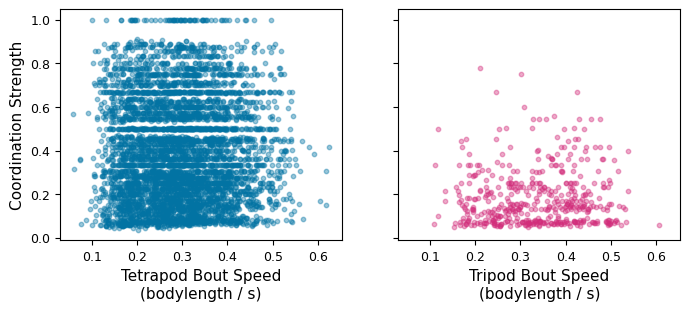

In [43]:
# WORKING
# if more ϕc at 1/3 and 2/3 at higher speeds, expect higher tetrapod coordination scores?
# need to confirm (again) that I am calculating these correctly
#    double check data ... looks good
#    check simulated data ... ok but problems when frame times are not the same as simulated step times

# check T.C.S in low / medium / high speeds ... all same!

# Scatter of ALL bouts
def nonan(x):
    return x[~np.isnan(x)]

gait_speeds_df = pd.read_excel(excel_file, sheet_name='gait_speeds', index_col=None)
gait_speeds_df.head(3)
tetrapod_coordination = gait_speeds_df.tetrapod_coordination.values
tetrapod_speed = gait_speeds_df.tetrapod_speed.values
tripod_coordination = gait_speeds_df.tripod_coordination.values
tripod_speed = gait_speeds_df.tripod_speed.values

tetrapod_coordination = nonan(tetrapod_coordination)
tetrapod_speed = nonan(tetrapod_speed)
tripod_coordination = nonan(tripod_coordination)
tripod_speed = nonan(tripod_speed)

print(len(tetrapod_coordination), len(tetrapod_speed))
print(len(tripod_coordination), len(tripod_speed))

f,(a1,a2) = plt.subplots(1,2,figsize=(8,3), sharey=True, sharex=True)
a1.scatter(tetrapod_speed, tetrapod_coordination, s=marker_size, c=tetra_color, alpha=marker_alpha, label='tetrapod')
a2.scatter(tripod_speed, tripod_coordination, s=marker_size, c=tripod_color, alpha=marker_alpha, label='tripod')
a1.set_ylabel('Coordination Strength', fontsize=axis_fontsize)
a1.set_xlabel('Tetrapod Bout Speed\n(bodylength / s)', fontsize=axis_fontsize)
a2.set_xlabel('Tripod Bout Speed\n(bodylength / s)', fontsize=axis_fontsize)
a1.tick_params(axis='both', which='major', labelsize=tick_fontsize) 
a2.tick_params(axis='both', which='major', labelsize=tick_fontsize) 
spearmanr_tet = stats.spearmanr(tetrapod_speed,tetrapod_coordination)
spearmanr_tri = stats.spearmanr(tripod_speed,tripod_coordination)
print('Tetrapod ρ =', round(spearmanr_tet.statistic,3), ', p = ', round(spearmanr_tet.pvalue,3))
print('Tripod   ρ =', round(spearmanr_tri.statistic,3), ', p = ', round(spearmanr_tri.pvalue,3))
plt.show()

[0, 0.232, 0.352, 1]
low 1387 , medium 2353 , high 1342
5082 5082


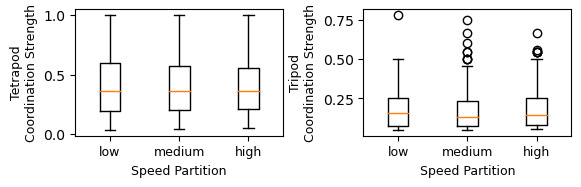

In [44]:
# partition these into low / medium / high speeds . . . 
print(speed_boundaries)
low_speeds_tet = np.where(tetrapod_speed<=speed_boundaries[1])[0]
med_speeds_tet = np.where(np.logical_and(tetrapod_speed>speed_boundaries[1], tetrapod_speed<=speed_boundaries[2]))[0]
high_speeds_tet = np.where(tetrapod_speed>speed_boundaries[2])[0]
print('low', len(low_speeds_tet),', medium', len(med_speeds_tet), ', high', len(high_speeds_tet))
print(len(tetrapod_speed), len(low_speeds_tet) + len(med_speeds_tet) + len(high_speeds_tet))

low_speeds_tri = np.where(tripod_speed<=speed_boundaries[1])[0]
med_speeds_tri = np.where(np.logical_and(tripod_speed>speed_boundaries[1], tripod_speed<=speed_boundaries[2]))[0]
high_speeds_tri = np.where(tripod_speed>speed_boundaries[2])[0]

f,[a1,a2] = plt.subplots(1,2,figsize=(6,2))
a1.boxplot([tetrapod_coordination[low_speeds_tet], 
             tetrapod_coordination[med_speeds_tet],
            tetrapod_coordination[high_speeds_tet]])
a1.set_ylabel('Tetrapod\nCoordination Strength',fontsize=tick_fontsize)

a2.boxplot([tripod_coordination[low_speeds_tri], 
             tripod_coordination[med_speeds_tri],
            tripod_coordination[high_speeds_tri]])
a2.set_ylabel('Tripod\nCoordination Strength',fontsize=tick_fontsize)

for ax in [a1,a2]:
    ax.set_xticks([1,2,3],['low','medium','high'],fontsize=tick_fontsize)
    ax.set_xlabel('Speed Partition',fontsize=tick_fontsize)

plt.tight_layout()
plt.show()

# Metachronal Lag Ratio vs. Turning
Is higher metachronal lag imbalance correlated with more turns? 
<br>Try plot / regression with degrees/sec cruising on X axis, and metachronal lag ratio on Y axis

In [45]:
path_summaries_df = pd.read_excel(excel_file, sheet_name='path_summaries', index_col=None)
step_summaries_df = pd.read_excel(excel_file, sheet_name='step_summaries', index_col=None)
path_summaries_df.head(3)

Identifier   treatment    individual   date  \
0  iw_11dec_tardigrade01_exemplaris  exemplaris  tardigrade01  11dec   
1  iw_11dec_tardigrade02_exemplaris  exemplaris  tardigrade02  11dec   
2  iw_11dec_tardigrade03_exemplaris  exemplaris  tardigrade03  11dec   

   Scale (pixels in 1mm)  Body Size (mm^2)  Body Length (mm)  Body Width (mm)  \
0                 956.03          0.017560          0.265809         0.089788   
1                 956.03          0.013457          0.239711         0.073674   
2                 956.03          0.017790          0.271046         0.089991   

   Body Width/Length Ratio  Duration analyzed (sec)  ...  \
0                 0.337792                 112.6362  ...   
1                 0.307344                 110.1818  ...   
2                 0.332014                 106.0909  ...   

   Speed (body lengths / sec cruising)  Total bearing change (deg)  \
0                             0.179656                 2146.392800   
1                             0.222783                 1648.051800   
2                             0.150015                 2372.522533   

   Bearing change (deg) / sec  Bearing change (deg) / sec cruising  \
0                   19.055977                            16.867627   
1                   14.957568                            16.375356   
2                   22.363111                            22.966600   

   Number of stops  Stops / sec  Number of turns  Turns / sec  \
0               10     0.088781                4     0.035513   
1               11     0.099835                1     0.009076   
2               35     0.329906               15     0.141388   

   Original Video Length (sec)  Body Lengths Traveled  
0                   137.454545              19.343800  
1                   137.545455              21.442264  
2                   127.212121              12.459007  

[3 rows x 25 columns]

In [46]:
print(path_summaries_df.columns)

Index(['Identifier', 'treatment', 'individual', 'date',
       'Scale (pixels in 1mm)', 'Body Size (mm^2)', 'Body Length (mm)',
       'Body Width (mm)', 'Body Width/Length Ratio', 'Duration analyzed (sec)',
       'Distance traveled (mm)', 'Speed (mm/sec)',
       'Speed (body lengths / sec)', 'Percentage of time cruising',
       'Speed (mm/sec cruising)', 'Speed (body lengths / sec cruising)',
       'Total bearing change (deg)', 'Bearing change (deg) / sec',
       'Bearing change (deg) / sec cruising', 'Number of stops', 'Stops / sec',
       'Number of turns', 'Turns / sec', 'Original Video Length (sec)',
       'Body Lengths Traveled'],
      dtype='object')


Spearman ρ = 0.173 , p =  0.081


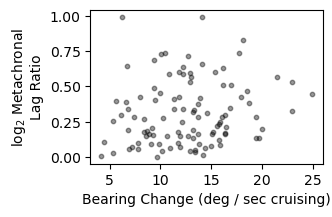

In [47]:
# print(step_summaries_df.columns)
# print(path_summaries_df.columns)
ml_ratio_dict = dict(zip(step_summaries_df.Identifier.values,
                         step_summaries_df['Metachronal lag Abs (Left-Right Ratio)'].values))
bearing_change_dict = dict(zip(path_summaries_df.Identifier.values,
                              path_summaries_df['Bearing change (deg) / sec cruising'].values))
ids = sorted(ml_ratio_dict.keys())
degrees_sec = np.array([bearing_change_dict[x] for x in ids])
ml_ratios = np.array([ml_ratio_dict[x] for x in ids])
f,a = plt.subplots(1,1,figsize=(3,2))
r,p = stats.spearmanr(degrees_sec,ml_ratios)
print('Spearman ρ =', round(r,3), ', p = ', round(p,3))
if p < 0.05:
    sns.regplot(ax=a, x=degrees_sec, y=ml_ratios, scatter_kws={'s':marker_size,'color':marker_color}, 
                    line_kws={'color':marker_color,'linewidth':2})
else:
    a.scatter(degrees_sec,ml_ratios,s=marker_size,alpha=marker_alpha,c=marker_color)
a.set_xlabel('Bearing Change (deg / sec cruising)')
a.set_ylabel('log$_{2}$ Metachronal\nLag Ratio')
plt.show()

In [48]:
# Try a linear regression with X as degrees per second cruising 
# and Y metachronal lag ratio

# not so much!

import statsmodels.api as sm
Y = ml_ratios
X = degrees_sec
X = sm.add_constant(X)
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.338
Date:                Tue, 21 May 2024   Prob (F-statistic):              0.129
Time:                        20:35:20   Log-Likelihood:                 7.8639
No. Observations:                 103   AIC:                            -11.73
Df Residuals:                     101   BIC:                            -6.458
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2153      0.069      3.119      0.002       0.078       0.352
x1             0.0079      0.005      1.529      0.129      -0.002       0.018
==============================================================================
Omnibus:                       12.926   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.090
Skew:                           0.893   Prob(JB):                     0.000872
Kurtosis:                       3.306   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

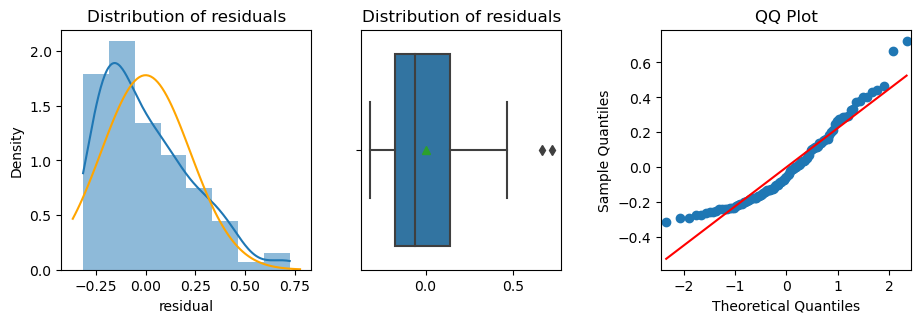

In [49]:
# check residuals from linear regression - are they normally distributed?
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_axes([0.1,0.1,0.25,0.8])
ax2 = fig.add_axes([0.4,0.1,0.2,0.8])
ax3 = fig.add_axes([0.7,0.1,0.25,0.8])

mu, std = stats.norm.fit(model_result.resid)

# plot the residuals
sns.histplot(ax=ax1, x=model_result.resid, stat="density", linewidth=0, kde=True)
ax1.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = ax1.get_xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(ax=ax1, x=x, y=p, color="orange")

sns.boxplot(ax=ax2, x=model_result.resid, showmeans=True)
ax2.set(title="Distribution of residuals")

sm.qqplot(model_result.resid, line='s',ax=ax3)
ax3.set(title="QQ Plot")

plt.show()

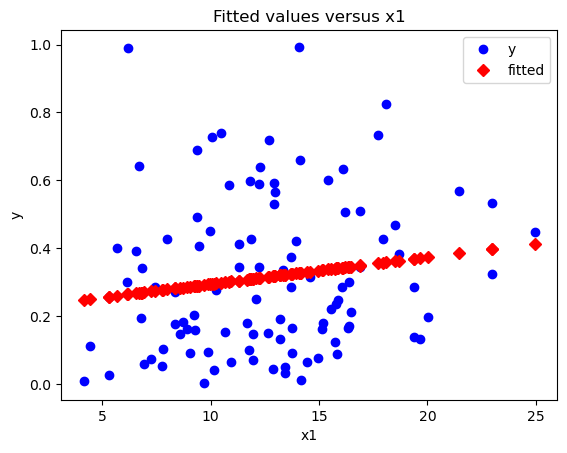

In [50]:
sm.graphics.plot_fit(model_result,1, vlines=False)
plt.show()

# Extras ... not much important below

## Partitioning contralateral offsets into 1/3 and 2/3
### which is not really valid because it depends on L vs. R

563 563
507 507


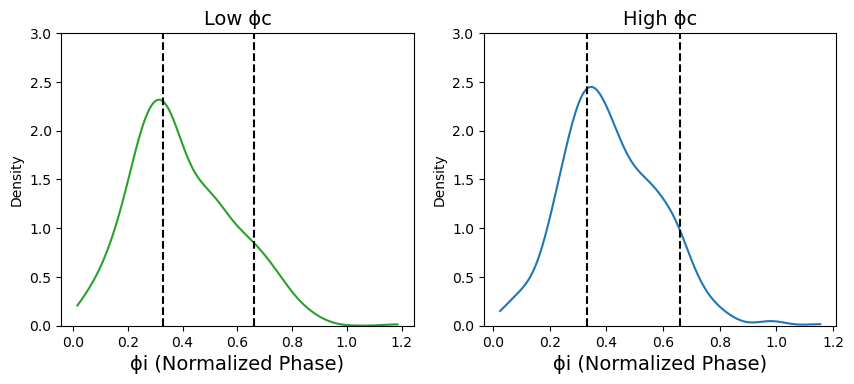

In [51]:
'''
THIS IS NOT SO USEFUL, AS THE CONTRALATERAL OFFSETS DO NOT REALLY HAVE TWO 'MODES'

Separate the contralateral offsets into the two 'modes' (.28-.38; .61-.71) 
and plot (scatter? kde?) vs. opposite offsets for those steps. 
Expect 0.3/0.3 0.6/0.6 maybe? Or four blobs?
    (from above - I will get four blobs, two each)
'''
low_boundaries = [0.28, 0.38]
within_low = np.where((cont_phase>=low_boundaries[0]) & (cont_phase<=low_boundaries[1]))
ipsi_low = ipsi_phase[within_low]
cont_low = cont_phase[within_low]
print(len(ipsi_low),len(cont_low))

high_boundaries = [0.61, 0.71]
within_high = np.where((cont_phase>=high_boundaries[0]) & (cont_phase<=high_boundaries[1]))
ipsi_high = ipsi_phase[within_high]
cont_high = cont_phase[within_high]
print(len(ipsi_high),len(cont_high))

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,3.8))
# ax1 = sns.kdeplot(ax=ax1, x=cont_low, y=ipsi_low, fill=True, cmap='viridis', thresh=0, levels=50)
# ax2 = sns.kdeplot(ax=ax2, x=cont_high, y=ipsi_high, fill=True, cmap='viridis', thresh=0, levels=50)

# ax1.hist(ipsi_low, bins=50)
# ax2.hist(ipsi_high, bins=50)

ax1 = sns.histplot(ipsi_low, stat='density', binwidth=0.005, ax=ax1, kde=True,
                  element='step', fill=False, visible=False, color='tab:green')
ax2 = sns.histplot(ipsi_high, stat='density', binwidth=0.005, ax=ax2, kde=True,
                  element='step', fill=False, visible=False, color='tab:blue')

ax1.set_xlabel('ϕi (Normalized Phase)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_title('Low ϕc',fontsize=14)
ax1.plot([0.33,0.33],[0,3],'--k')
ax1.plot([0.66,0.66],[0,3],'--k')
ax1.set_ylim([0,3])

ax2.set_xlabel('ϕi (Normalized Phase)', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_title('High ϕc',fontsize=14)
ax2.plot([0.33,0.33],[0,3],'--k')
ax2.plot([0.66,0.66],[0,3],'--k')
ax2.set_ylim([0,3])

# ax1.set_aspect('equal')
plt.show()

## Size vs. Speed
* area vs. speed (mm/s and bodylength/s)
* length vs. speed
* width vs. speed
* width/length ('chubbiness') vs. speed

In [52]:
xl = pd.ExcelFile(excel_file)
print(xl.sheet_names)

['path_summaries', 'step_timing', 'step_summaries', 'gait_summaries', 'gait_speeds']


In [53]:
path_summaries_df = xl.parse('path_summaries') # has size and speed info
print(path_summaries_df.columns)
path_summaries_df.head(3)

Index(['Identifier', 'treatment', 'individual', 'date',
       'Scale (pixels in 1mm)', 'Body Size (mm^2)', 'Body Length (mm)',
       'Body Width (mm)', 'Body Width/Length Ratio', 'Duration analyzed (sec)',
       'Distance traveled (mm)', 'Speed (mm/sec)',
       'Speed (body lengths / sec)', 'Percentage of time cruising',
       'Speed (mm/sec cruising)', 'Speed (body lengths / sec cruising)',
       'Total bearing change (deg)', 'Bearing change (deg) / sec',
       'Bearing change (deg) / sec cruising', 'Number of stops', 'Stops / sec',
       'Number of turns', 'Turns / sec', 'Original Video Length (sec)',
       'Body Lengths Traveled'],
      dtype='object')


Identifier   treatment    individual   date  \
0  iw_11dec_tardigrade01_exemplaris  exemplaris  tardigrade01  11dec   
1  iw_11dec_tardigrade02_exemplaris  exemplaris  tardigrade02  11dec   
2  iw_11dec_tardigrade03_exemplaris  exemplaris  tardigrade03  11dec   

   Scale (pixels in 1mm)  Body Size (mm^2)  Body Length (mm)  Body Width (mm)  \
0                 956.03          0.017560          0.265809         0.089788   
1                 956.03          0.013457          0.239711         0.073674   
2                 956.03          0.017790          0.271046         0.089991   

   Body Width/Length Ratio  Duration analyzed (sec)  ...  \
0                 0.337792                 112.6362  ...   
1                 0.307344                 110.1818  ...   
2                 0.332014                 106.0909  ...   

   Speed (body lengths / sec cruising)  Total bearing change (deg)  \
0                             0.179656                 2146.392800   
1                             0.222783                 1648.051800   
2                             0.150015                 2372.522533   

   Bearing change (deg) / sec  Bearing change (deg) / sec cruising  \
0                   19.055977                            16.867627   
1                   14.957568                            16.375356   
2                   22.363111                            22.966600   

   Number of stops  Stops / sec  Number of turns  Turns / sec  \
0               10     0.088781                4     0.035513   
1               11     0.099835                1     0.009076   
2               35     0.329906               15     0.141388   

   Original Video Length (sec)  Body Lengths Traveled  
0                   137.454545              19.343800  
1                   137.545455              21.442264  
2                   127.212121              12.459007  

[3 rows x 25 columns]

Tardigrade Area (mm^2) vs. Speed (mm/sec) ρ = 0.27 p = 0.01
Tardigrade Area (mm^2) vs. Speed (bodylength/sec) ρ = -0.07 p = 0.46
Tardigrade Area (mm^2) vs. Cruising Speed (mm/sec) ρ = 0.34 p = 0.0
Tardigrade Area (mm^2) vs. Cruising Speed (bodylength/sec) ρ = -0.03 p = 0.77


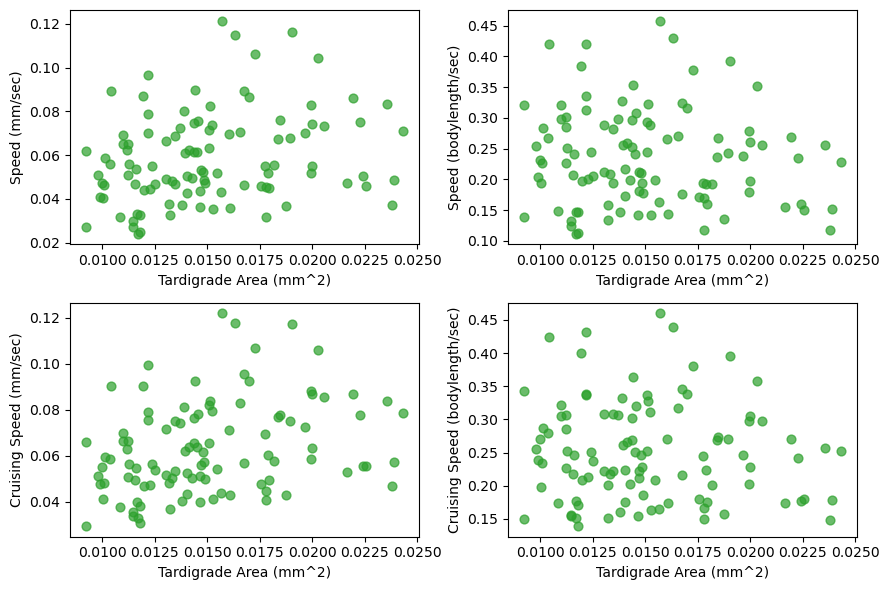

In [54]:
# Area vs. Speed
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

areas = path_summaries_df['Body Size (mm^2)'].values
speed_mm = path_summaries_df['Speed (mm/sec)'].values
speed_bodylength = path_summaries_df['Speed (body lengths / sec)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

def scat(ax, x, y, xlab, ylab, col = 'tab:green'):
    ax.scatter(x,y,s=40,alpha=0.7,color=col)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    r,p = stats.spearmanr(x,y)
    print(xlab + ' vs. ' + ylab + ' ρ =', np.round(r,2), 'p =', np.round(p,2))
    return ax

a1 = scat(a1, areas, speed_mm, 'Tardigrade Area (mm^2)', 'Speed (mm/sec)')
a2 = scat(a2, areas, speed_bodylength, 'Tardigrade Area (mm^2)', 'Speed (bodylength/sec)')
a3 = scat(a3, areas, cruising_speed_mm, 'Tardigrade Area (mm^2)', 'Cruising Speed (mm/sec)')
a4 = scat(a4, areas, cruising_speed_bodylength, 'Tardigrade Area (mm^2)', 'Cruising Speed (bodylength/sec)')

plt.tight_layout()
plt.show()

Body Length (mm) vs. Speed (mm/sec) ρ = 0.31 p = 0.0
Body Length (mm) vs. Speed (bodylength/sec) ρ = -0.04 p = 0.7
Body Length (mm) vs. Cruising Speed (mm/sec) ρ = 0.37 p = 0.0
Body Length (mm) vs. Cruising Speed (bodylength/sec) ρ = -0.0 p = 0.98


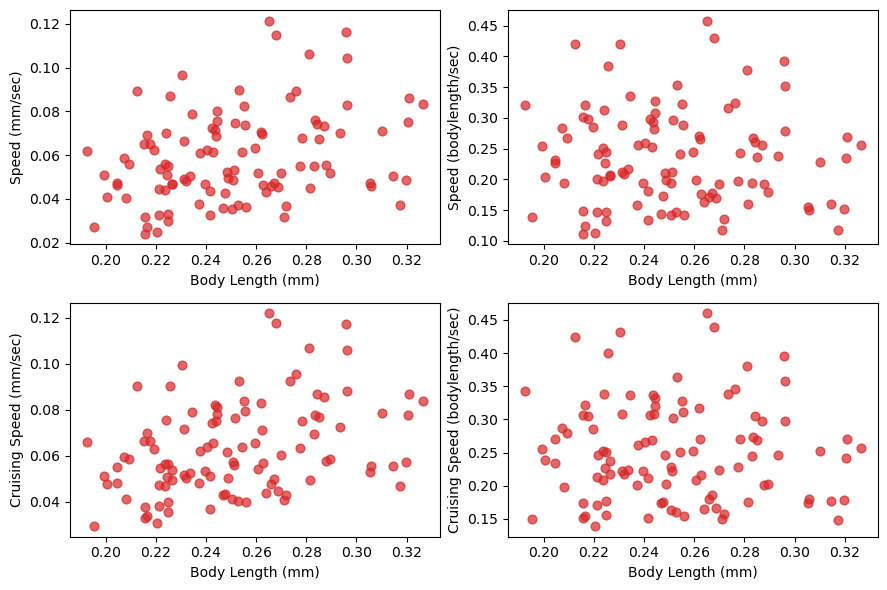

In [55]:
# Length vs. Speed
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

lengths = path_summaries_df['Body Length (mm)'].values
speed_mm = path_summaries_df['Speed (mm/sec)'].values
speed_bodylength = path_summaries_df['Speed (body lengths / sec)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

col = 'tab:red'
a1 = scat(a1, lengths, speed_mm, 'Body Length (mm)', 'Speed (mm/sec)', col)
a2 = scat(a2, lengths, speed_bodylength, 'Body Length (mm)', 'Speed (bodylength/sec)', col)
a3 = scat(a3, lengths, cruising_speed_mm, 'Body Length (mm)', 'Cruising Speed (mm/sec)', col)
a4 = scat(a4, lengths, cruising_speed_bodylength, 'Body Length (mm)', 'Cruising Speed (bodylength/sec)', col)

plt.tight_layout()
plt.show()

Body Width (mm) vs. Speed (mm/sec) ρ = 0.11 p = 0.29
Body Width (mm) vs. Speed (bodylength/sec) ρ = -0.22 p = 0.03
Body Width (mm) vs. Cruising Speed (mm/sec) ρ = 0.2 p = 0.04
Body Width (mm) vs. Cruising Speed (bodylength/sec) ρ = -0.16 p = 0.12


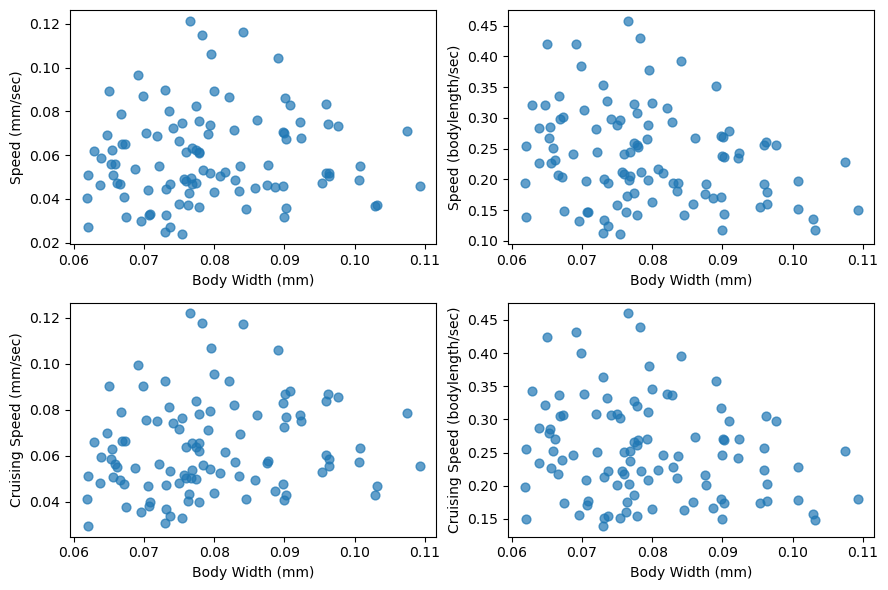

In [56]:
# Width vs. Speed
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

widths = path_summaries_df['Body Width (mm)'].values
speed_mm = path_summaries_df['Speed (mm/sec)'].values
speed_bodylength = path_summaries_df['Speed (body lengths / sec)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

col = 'tab:blue'
a1 = scat(a1, widths, speed_mm, 'Body Width (mm)', 'Speed (mm/sec)', col)
a2 = scat(a2, widths, speed_bodylength, 'Body Width (mm)', 'Speed (bodylength/sec)', col)
a3 = scat(a3, widths, cruising_speed_mm, 'Body Width (mm)', 'Cruising Speed (mm/sec)', col)
a4 = scat(a4, widths, cruising_speed_bodylength, 'Body Width (mm)', 'Cruising Speed (bodylength/sec)', col)

plt.tight_layout()
plt.show()

Width:Length Ratio vs. Speed (mm/sec) ρ = -0.47 p = 0.0
Width:Length Ratio vs. Speed (bodylength/sec) ρ = -0.44 p = 0.0
Width:Length Ratio vs. Cruising Speed (mm/sec) ρ = -0.37 p = 0.0
Width:Length Ratio vs. Cruising Speed (bodylength/sec) ρ = -0.37 p = 0.0


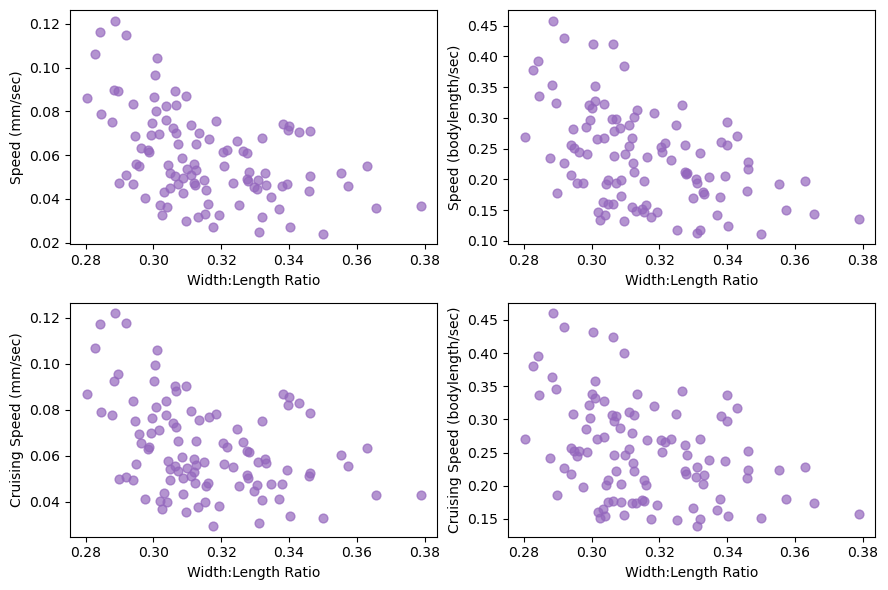

In [57]:
# Width/Length Ratio vs. Speed
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

ratios = path_summaries_df['Body Width/Length Ratio'].values
speed_mm = path_summaries_df['Speed (mm/sec)'].values
speed_bodylength = path_summaries_df['Speed (body lengths / sec)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

col = 'tab:purple'
a1 = scat(a1, ratios, speed_mm, 'Width:Length Ratio', 'Speed (mm/sec)', col)
a2 = scat(a2, ratios, speed_bodylength, 'Width:Length Ratio', 'Speed (bodylength/sec)', col)
a3 = scat(a3, ratios, cruising_speed_mm, 'Width:Length Ratio', 'Cruising Speed (mm/sec)', col)
a4 = scat(a4, ratios, cruising_speed_bodylength, 'Width:Length Ratio', 'Cruising Speed (bodylength/sec)', col)

plt.tight_layout()
plt.show()

# Speed vs. offsets

In [58]:
step_summaries_df = xl.parse('step_summaries') # has size and speed info
print(step_summaries_df.columns)
step_summaries_df.head(3)

Index(['Identifier', 'treatment', 'individual',
       'Stance duration (lateral legs)', 'Swing duration (lateral legs)',
       'Gait cycle (lateral legs)', 'Duty factor (lateral legs)',
       'mm per step (lateral legs)', 'bodylength per step (lateral legs)',
       'Stance duration (rear legs)', 'Swing duration (rear legs)',
       'Gait cycle (rear legs)', 'Duty factor (rear legs)',
       'mm per step (rear legs)', 'bodylength per step (rear legs)',
       'Metachronal lag (lateral legs)',
       'Metachronal lag (normalized, lateral legs)',
       'Metachronal lag Abs (Left-Right Ratio)',
       'Metachronal lag ratios per L3 step', 'Bearing change per L3 step',
       'Anterior swing offsets (lateral legs)',
       'Anterior swing offsets (normalized, lateral legs)',
       'Opposite swing offsets (lateral legs)',
       'Opposite swing offsets (normalized, lateral legs)',
       'Opposite swing offsets (rear legs)',
       'Opposite swing offsets (normalized, rear legs)',
    

Identifier   treatment    individual  \
0  iw_11dec_tardigrade01_exemplaris  exemplaris  tardigrade01   
1  iw_11dec_tardigrade02_exemplaris  exemplaris  tardigrade02   
2  iw_11dec_tardigrade03_exemplaris  exemplaris  tardigrade03   

   Stance duration (lateral legs)  Swing duration (lateral legs)  \
0                        1.038565                       0.291355   
1                        0.630924                       0.259400   
2                        1.185420                       0.313980   

   Gait cycle (lateral legs)  Duty factor (lateral legs)  \
0                   1.329919                    0.775582   
1                   0.890324                    0.702079   
2                   1.499400                    0.784704   

   mm per step (lateral legs)  bodylength per step (lateral legs)  \
0                    0.045352                            0.170799   
1                    0.040009                            0.167006   
2                    0.049132                            0.181463   

   Stance duration (rear legs)  ...  Metachronal lag Abs (Left-Right Ratio)  \
0                     0.531367  ...                                0.345009   
1                     0.445486  ...                                0.301717   
2                     0.717000  ...                                0.323230   

   Metachronal lag ratios per L3 step  Bearing change per L3 step  \
0                           -0.074620                   -3.720292   
1                            0.366354                    2.324556   
2                           -0.422711                    0.496667   

   Anterior swing offsets (lateral legs)  \
0                               0.843844   
1                               0.397933   
2                               0.819346   

   Anterior swing offsets (normalized, lateral legs)  \
0                                           0.620441   
1                                           0.438180   
2                                           0.540057   

   Opposite swing offsets (lateral legs)  \
0                               0.653679   
1                               0.455132   
2                               0.739917   

   Opposite swing offsets (normalized, lateral legs)  \
0                                           0.480877   
1                                           0.512152   
2                                           0.485374   

   Opposite swing offsets (rear legs)  \
0                            0.477846   
1                            0.410062   
2                            0.545450   

   Opposite swing offsets (normalized, rear legs)  Abs MCL Ratio per L3  
0                                        0.495000              0.408127  
1                                        0.519129              0.725934  
2                                        0.504456              0.447127  

[3 rows x 27 columns]

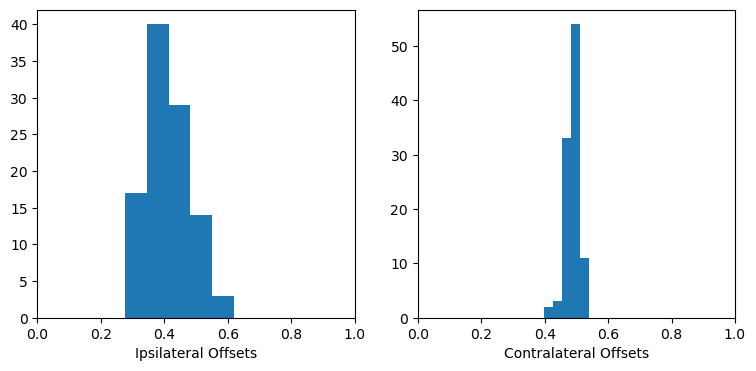

In [59]:
fig, [a1,a2] = plt.subplots(1,2, figsize=(9,4))
contra_offsets = step_summaries_df['Opposite swing offsets (normalized, lateral legs)'].values
ipsi_offsets = step_summaries_df['Anterior swing offsets (normalized, lateral legs)'].values
a1.hist(ipsi_offsets, bins=5)
a1.set_xlabel('Ipsilateral Offsets')
a1.set_xlim([0,1])

a2.hist(contra_offsets, bins=5)
a2.set_xlabel('Contralateral Offsets')
a2.set_xlim([0,1])

plt.show()

Ipsilateral Offset vs. Speed (mm/s cruising) ρ = -0.22 p = 0.03
Contralateral Offset vs. Speed (mm/s cruising) ρ = 0.22 p = 0.02
Ipsilateral Offset vs. Speed (bodylength/s cruising) ρ = -0.29 p = 0.0
Contralateral Offset vs. Speed (bodylength/s cruising) ρ = 0.2 p = 0.05


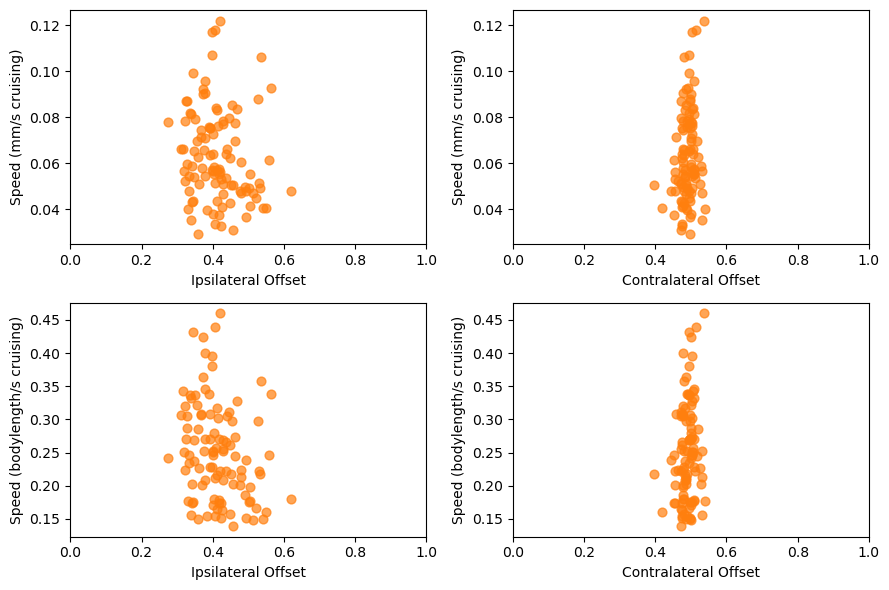

In [60]:
# Cruising Speed vs. Anterior and Opposite Offsets
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

contra_offsets = step_summaries_df['Opposite swing offsets (normalized, lateral legs)'].values
ipsi_offsets = step_summaries_df['Anterior swing offsets (normalized, lateral legs)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values

col = 'tab:orange'
a1 = scat(a1, ipsi_offsets, cruising_speed_mm, 
          'Ipsilateral Offset', 'Speed (mm/s cruising)', col)
a2 = scat(a2, contra_offsets, cruising_speed_mm, 
          'Contralateral Offset', 'Speed (mm/s cruising)', col)
a3 = scat(a3, ipsi_offsets, cruising_speed_bodylength, 
          'Ipsilateral Offset', 'Speed (bodylength/s cruising)', col)
a4 = scat(a4, contra_offsets, cruising_speed_bodylength, 
          'Contralateral Offset', 'Speed (bodylength/s cruising)', col)

a1.set_xlim([0,1])
a2.set_xlim([0,1])
a3.set_xlim([0,1])
a4.set_xlim([0,1])
plt.tight_layout()
plt.show()

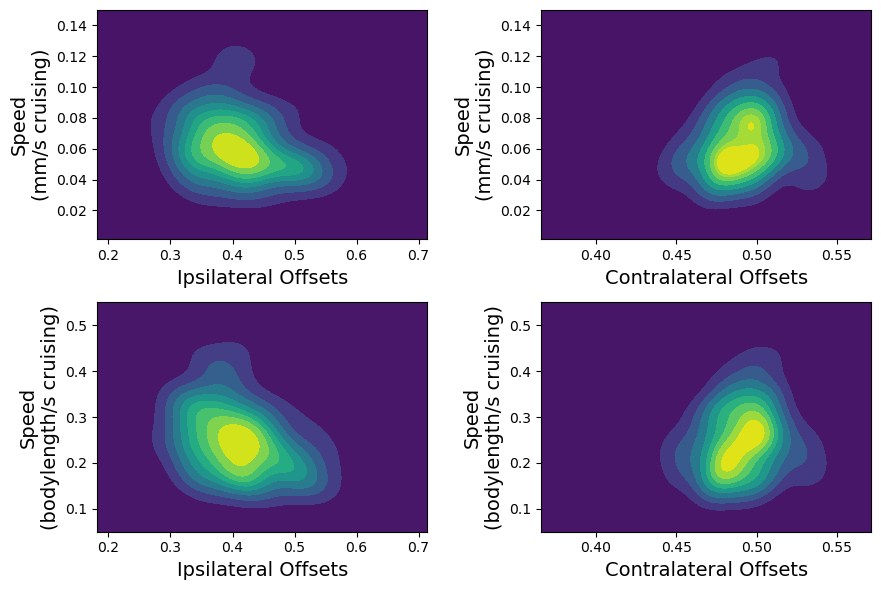

In [61]:
# Cruising Speed vs. Anterior and Opposite Offsets
fig, axes = plt.subplots(2,2, figsize=(9,6))
[[a1,a2],[a3,a4]] = axes

contra_offsets = step_summaries_df['Opposite swing offsets (normalized, lateral legs)'].values
ipsi_offsets = step_summaries_df['Anterior swing offsets (normalized, lateral legs)'].values
cruising_speed_mm = path_summaries_df['Speed (mm/sec cruising)'].values
cruising_speed_bodylength = path_summaries_df['Speed (body lengths / sec cruising)'].values


a1 = sns.kdeplot(ax=a1, x=ipsi_offsets, y=cruising_speed_mm, fill=True, cmap='viridis', thresh=0, levels=10)
a1.set_xlabel('Ipsilateral Offsets', fontsize=14)
a1.set_ylabel('Speed\n(mm/s cruising)', fontsize=14)
a2 = sns.kdeplot(ax=a2, x=contra_offsets, y=cruising_speed_mm, fill=True, cmap='viridis', thresh=0, levels=10)
a2.set_xlabel('Contralateral Offsets', fontsize=14)
a2.set_ylabel('Speed\n(mm/s cruising)', fontsize=14)
a3 = sns.kdeplot(ax=a3, x=ipsi_offsets, y=cruising_speed_bodylength, fill=True, cmap='viridis', thresh=0, levels=10)
a3.set_xlabel('Ipsilateral Offsets', fontsize=14)
a3.set_ylabel('Speed\n(bodylength/s cruising)', fontsize=14)
a4 = sns.kdeplot(ax=a4, x=contra_offsets, y=cruising_speed_bodylength, fill=True, cmap='viridis', thresh=0, levels=10)
a4.set_xlabel('Contralateral Offsets', fontsize=14)
a4.set_ylabel('Speed\n(bodylength/s cruising)', fontsize=14)

a3.set_ylim([0.05,0.55])
a4.set_ylim([0.05,0.55])
plt.tight_layout()
plt.show()